In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.model_selection import train_test_split

In [2]:
# Load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('Training dataset has {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
print('Test dataset has {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

Training dataset has 333 rows and 15 columns.
Test dataset has 173 rows and 14 columns.


In [4]:
train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
test.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [7]:
train.describe(include='all')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [8]:
test.describe(include='all')

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,258.404624,4.100862,12.661850,10.835145,0.086705,0.549981,6.321237,69.245665,3.958865,9.387283,406.231214,18.469942,351.299711,12.917977
std,143.289788,10.607761,24.536277,6.596488,0.282219,0.117826,0.700621,28.248244,2.324131,8.662621,164.480626,2.196196,99.781464,7.293408
min,3.000000,0.013810,0.000000,0.460000,0.000000,0.392000,4.138000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.920000
25%,136.000000,0.082210,0.000000,5.320000,0.000000,0.447000,5.895000,42.800000,2.010700,4.000000,279.000000,17.000000,371.720000,6.870000
50%,268.000000,0.251990,0.000000,8.560000,0.000000,0.538000,6.223000,79.200000,3.421100,5.000000,330.000000,19.100000,390.070000,12.120000
75%,381.000000,3.673670,20.000000,18.100000,0.000000,0.624000,6.674000,94.600000,5.400700,24.000000,666.000000,20.200000,396.060000,17.210000
max,505.000000,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000


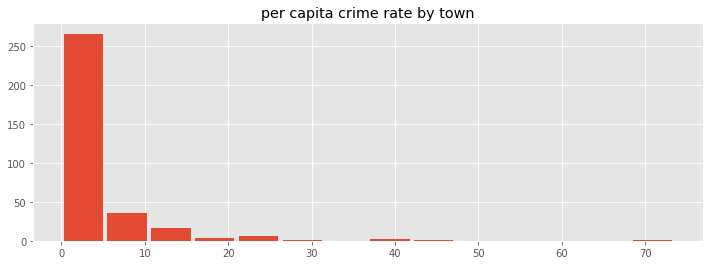

In [9]:
train.crim.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('per capita crime rate by town')
plt.show(block=False)

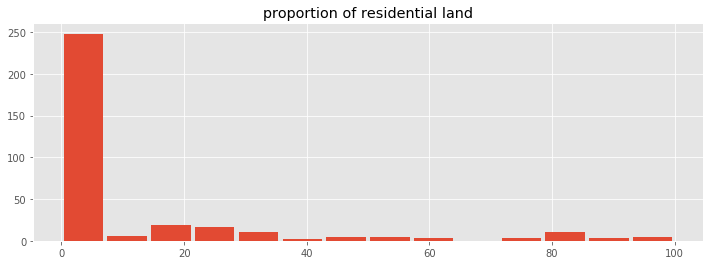

In [10]:
train.zn.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportion of residential land')
plt.show(block=False)

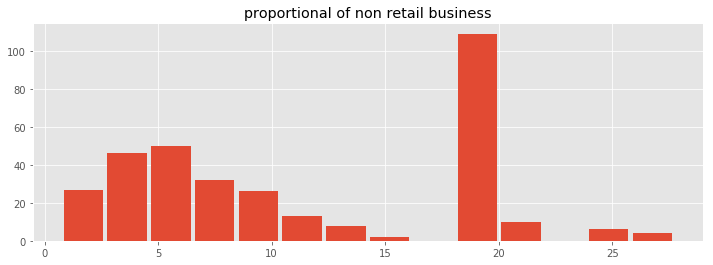

In [11]:
train.indus.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportional of non retail business')
plt.show(block=False)

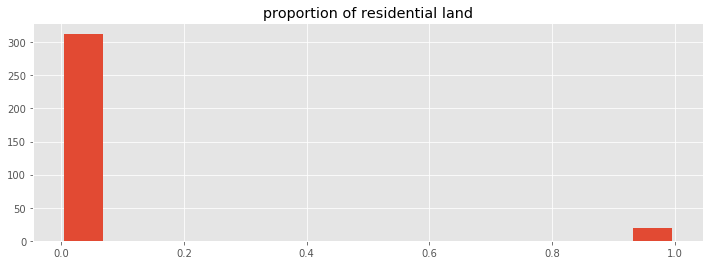

In [12]:
train.chas.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportion of residential land')
plt.show(block=False)

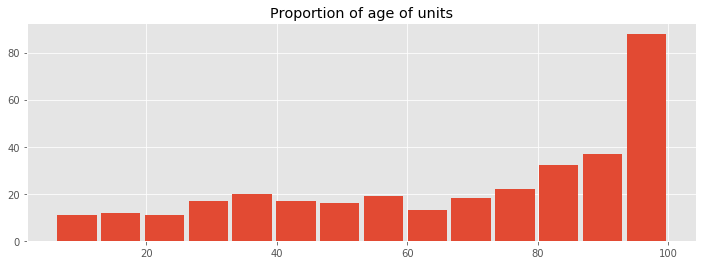

In [13]:
train.age.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Proportion of age of units')
plt.show(block=False)

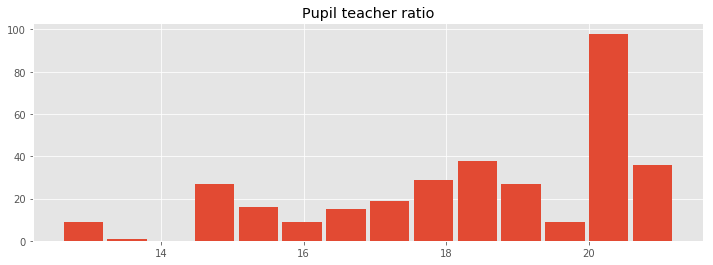

In [14]:
train.ptratio.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Pupil teacher ratio')
plt.show(block=False)

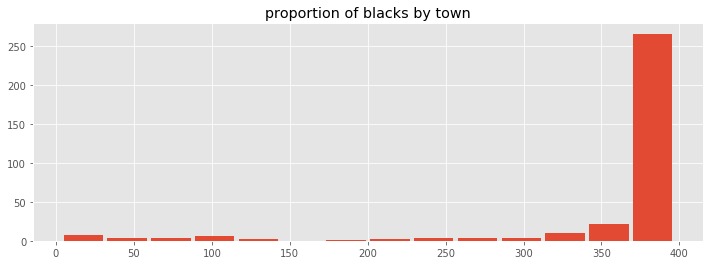

In [15]:
train.black.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('proportion of blacks by town')
plt.show(block=False)

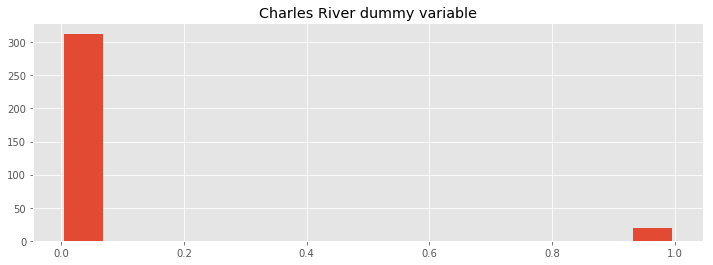

In [16]:
train.chas.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Charles River dummy variable')
plt.show(block=False)

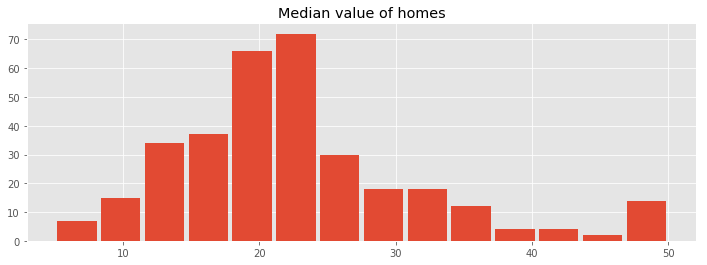

In [17]:
# Lets look at target variable
train.medv.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('Median value of homes')
plt.show(block=False)

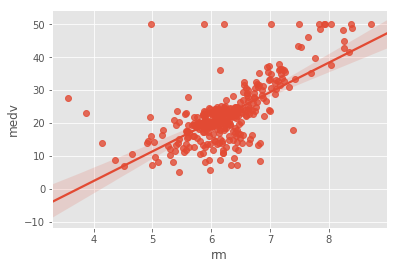

In [18]:
sns.regplot(x=train.rm,y=train.medv)

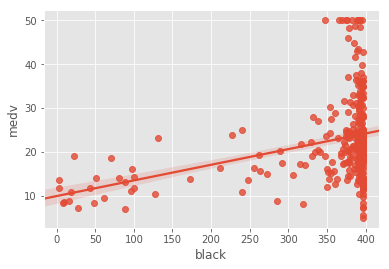

In [19]:
sns.regplot(x=train.black,y=train.medv)

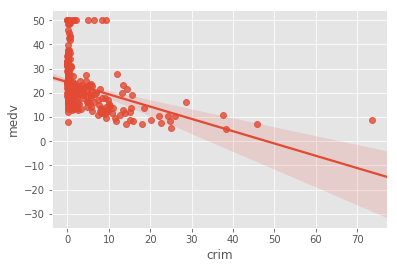

In [20]:
sns.regplot(x=train.crim,y=train.medv)

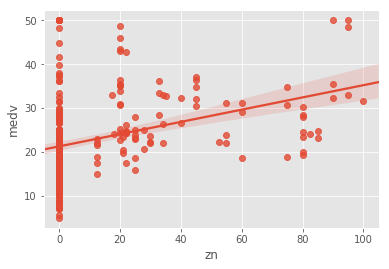

In [21]:
sns.regplot(x=train.zn,y=train.medv)

In [22]:
train = train.drop(train[train.medv == 50].index)
train = train.drop(train[train.crim > 70].index)
#train['black'] = np.where(train['black']>=300,1,0)
#test['black']= np.where(test['black']>=300,1,0)

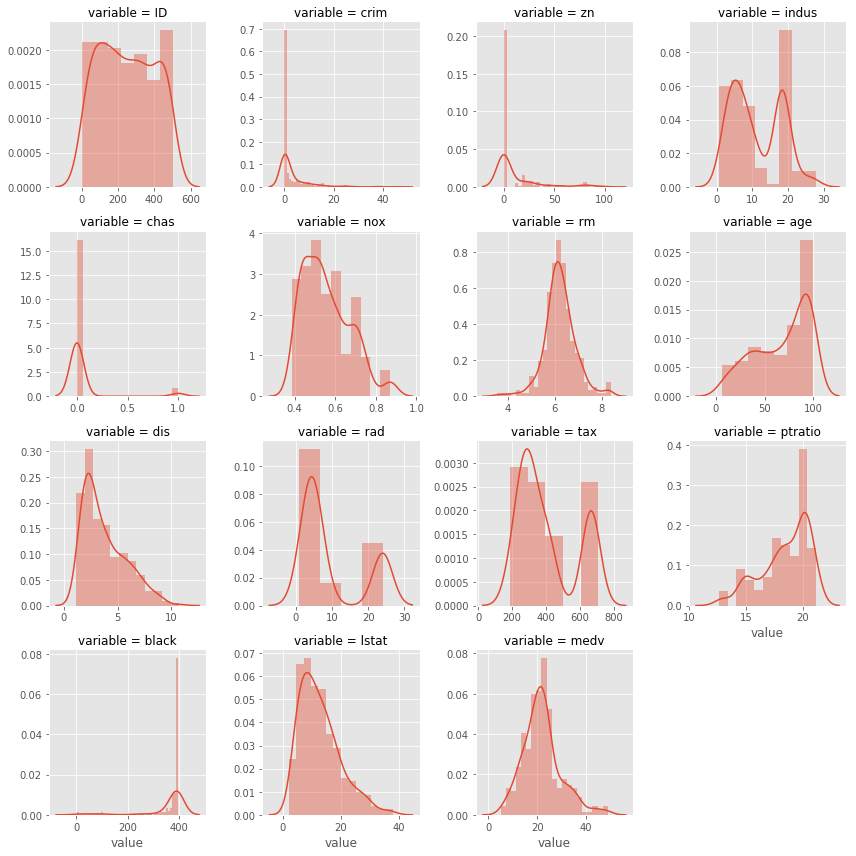

In [23]:
f = pd.melt(train)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

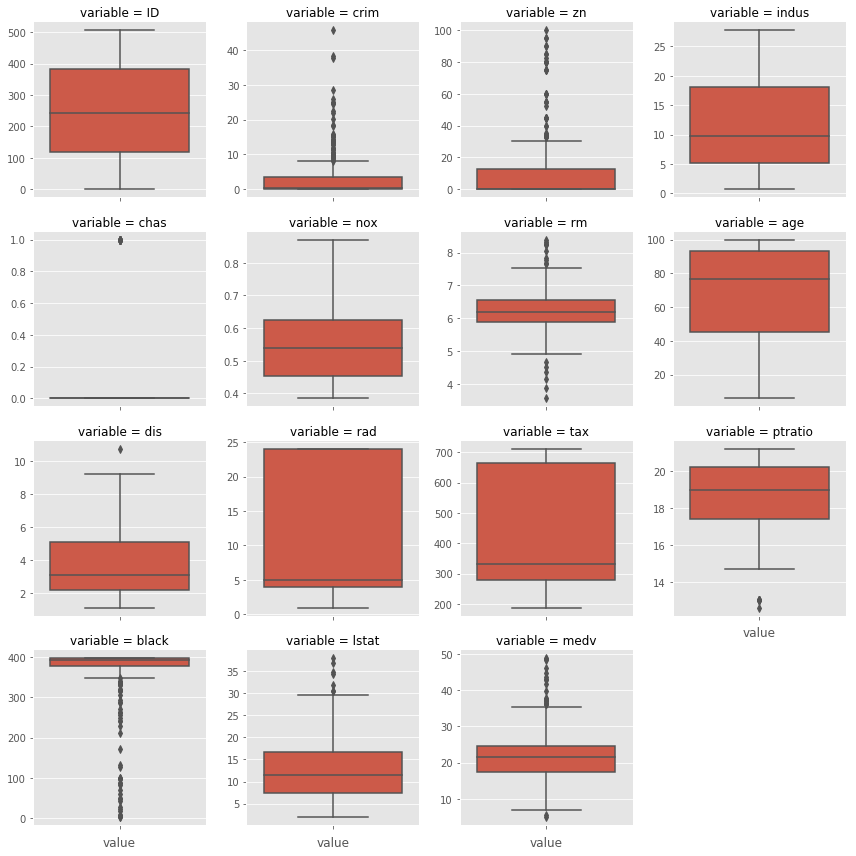

In [24]:
f = pd.melt(train)
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.boxplot,'value',orient='v')
g.set_xticklabels(rotation=90)

In [25]:
# Check for missing values
train.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [26]:
# Check for duplicate values
print('Train set duplicate IDs: {}'.format(train.duplicated('ID').sum()))
print('Test set duplicate IDs: {}'.format(test.duplicated('ID').sum()))

Train set duplicate IDs: 0
Test set duplicate IDs: 0


In [27]:
# Data cleaning
test_id=test['ID']
train = train.drop('ID', 1)
test = test.drop('ID', 1)

In [28]:
train.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.230573,0.463560,-0.052977,0.505877,-0.359085,0.406324,-0.433275,0.731094,0.675437,0.335618,-0.435821,0.600569,-0.515584
zn,-0.230573,1.000000,-0.514082,-0.057246,-0.495236,0.330940,-0.535878,0.643557,-0.298195,-0.298161,-0.367084,0.168026,-0.398620,0.396386
indus,0.463560,-0.514082,1.000000,0.021034,0.745493,-0.473945,0.626821,-0.697560,0.567858,0.703587,0.401118,-0.337833,0.650164,-0.609219
chas,-0.052977,-0.057246,0.021034,1.000000,0.081958,0.058219,0.064267,-0.065627,-0.013829,-0.047551,-0.113576,0.055397,-0.000507,0.098563
nox,0.505877,-0.495236,0.745493,0.081958,1.000000,-0.347532,0.731498,-0.768228,0.608682,0.664544,0.180420,-0.367790,0.617365,-0.502433
rm,-0.359085,0.330940,-0.473945,0.058219,-0.347532,1.000000,-0.271360,0.304440,-0.261555,-0.353619,-0.324233,0.149900,-0.614266,0.703952
age,0.406324,-0.535878,0.626821,0.064267,0.731498,-0.271360,1.000000,-0.757842,0.436949,0.499071,0.257145,-0.266143,0.624611,-0.478514
dis,-0.433275,0.643557,-0.697560,-0.065627,-0.768228,0.304440,-0.757842,1.000000,-0.467389,-0.519210,-0.230850,0.286812,-0.546005,0.372546
rad,0.731094,-0.298195,0.567858,-0.013829,0.608682,-0.261555,0.436949,-0.467389,1.000000,0.901013,0.457278,-0.405424,0.506638,-0.453005
tax,0.675437,-0.298161,0.703587,-0.047551,0.664544,-0.353619,0.499071,-0.519210,0.901013,1.000000,0.458009,-0.405978,0.568352,-0.563675


In [29]:
train['chas0'] = np.where(train['chas']==0,1,0)
train['chas1'] = np.where(train['chas']==1,1,0)
test['chas0'] = np.where(test['chas']==0,1,0)
test['chas1'] = np.where(test['chas']==1,1,0)

In [31]:
for cols in list(train):
    print('Column {} has Skew: {:.3f} | Kurtosis: {:.3f}'.format(cols,
        skew(train[cols]), kurtosis(train[cols])))

Column crim has Skew: 3.253 | Kurtosis: 13.074
Column zn has Skew: 2.361 | Kurtosis: 4.860
Column indus has Skew: 0.332 | Kurtosis: -1.191
Column chas has Skew: 4.137 | Kurtosis: 15.115
Column nox has Skew: 0.734 | Kurtosis: -0.102
Column rm has Skew: 0.048 | Kurtosis: 2.242
Column age has Skew: -0.586 | Kurtosis: -0.947
Column dis has Skew: 0.926 | Kurtosis: 0.068
Column rad has Skew: 1.011 | Kurtosis: -0.846
Column tax has Skew: 0.660 | Kurtosis: -1.152
Column ptratio has Skew: -0.810 | Kurtosis: -0.263
Column black has Skew: -2.980 | Kurtosis: 7.877
Column lstat has Skew: 0.989 | Kurtosis: 0.751
Column medv has Skew: 0.789 | Kurtosis: 1.148
Column chas0 has Skew: -4.137 | Kurtosis: 15.115
Column chas1 has Skew: 4.137 | Kurtosis: 15.115


In [32]:
train["crim"]=np.sqrt(train["crim"])
test["crim"]=np.sqrt(test["crim"])
train["zn"]=np.sqrt(train["zn"])
test["zn"]=np.sqrt(test["zn"])

In [33]:
for cols in list(train):
    print('Column {} has Skew: {:.3f} | Kurtosis: {:.3f}'.format(cols,
        skew(train[cols]), kurtosis(train[cols])))

Column crim has Skew: 1.614 | Kurtosis: 2.098
Column zn has Skew: 1.522 | Kurtosis: 0.920
Column indus has Skew: 0.332 | Kurtosis: -1.191
Column chas has Skew: 4.137 | Kurtosis: 15.115
Column nox has Skew: 0.734 | Kurtosis: -0.102
Column rm has Skew: 0.048 | Kurtosis: 2.242
Column age has Skew: -0.586 | Kurtosis: -0.947
Column dis has Skew: 0.926 | Kurtosis: 0.068
Column rad has Skew: 1.011 | Kurtosis: -0.846
Column tax has Skew: 0.660 | Kurtosis: -1.152
Column ptratio has Skew: -0.810 | Kurtosis: -0.263
Column black has Skew: -2.980 | Kurtosis: 7.877
Column lstat has Skew: 0.989 | Kurtosis: 0.751
Column medv has Skew: 0.789 | Kurtosis: 1.148
Column chas0 has Skew: -4.137 | Kurtosis: 15.115
Column chas1 has Skew: 4.137 | Kurtosis: 15.115


In [34]:
y=train['medv']
x=train
del x['medv']
# Split train to get validaton set
X_train, X_validation, Y_train, Y_validation = \
    train_test_split(x, y, test_size=0.25, random_state=40)

In [35]:
x.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,chas0,chas1
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.00000,321.000000,321.000000,321.000000,321.000000
mean,1.180492,1.573175,11.211651,0.049844,0.556588,6.230875,67.782243,3.755440,9.523364,407.566978,18.48785,359.848224,12.767975,0.950156,0.049844
std,1.327097,2.839489,6.968600,0.217963,0.115716,0.658019,28.105736,1.982631,8.681891,169.772705,2.12147,85.963780,7.007390,0.217963,0.217963
min,0.079498,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.137000,1.000000,188.000000,12.60000,3.500000,1.980000,0.000000,0.000000
25%,0.280998,0.000000,5.130000,0.000000,0.453000,5.880000,45.100000,2.167800,4.000000,279.000000,17.40000,377.070000,7.430000,1.000000,0.000000
50%,0.499800,0.000000,9.690000,0.000000,0.538000,6.185000,76.500000,3.102500,5.000000,330.000000,19.00000,392.300000,11.380000,1.000000,0.000000
75%,1.822375,3.535534,18.100000,0.000000,0.624000,6.552000,93.400000,5.118000,24.000000,666.000000,20.20000,396.330000,16.590000,1.000000,0.000000
max,6.763586,10.000000,27.740000,1.000000,0.871000,8.398000,100.000000,10.710300,24.000000,711.000000,21.20000,396.900000,37.970000,1.000000,1.000000


In [36]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
import scipy.stats as st

In [37]:
def rsme(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

In [38]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
import itertools

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.005,max_iter = 100000, random_state=1))
Enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.005, l1_ratio=.9,max_iter = 100000, random_state=3))

# lassoLarsIC= make_pipeline(RobustScaler(), LassoLarsIC(criterion='aic', fit_intercept=True, verbose=False,
#             normalize=True, precompute='auto', max_iter=500,
#             eps=2.2204460492503131e-16, copy_X=True, positive=False))
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)


print('Lasso -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
    rsme(lasso, X_train, Y_train).mean(),rsme(lasso,X_validation , Y_validation).mean()))
print('Elasticnet -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
    rsme(Enet, X_train, Y_train).mean(),rsme(Enet,X_validation , Y_validation).mean()))

# print('lassoLarsIC -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
#     rsme(lassoLarsIC, X_train, Y_train).mean(),rsme(lassoLarsIC,X_validation , Y_validation).mean()))
# print('KRR -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f} '.format(
#     rsme(KRR, X_train, Y_train).mean(),rsme(KRR,X_validation , Y_validation).mean()))


Lasso -> Train RSME: 3.85698 | Avg. Validation RMSE: 4.35198
Elasticnet -> Train RSME: 3.85580 | Avg. Validation RMSE: 4.34321


In [39]:
params = {  
    "n_estimators": st.randint(50,500),
    "max_depth": st.randint(3, 100),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": st.beta(10, 1),
    "subsample": st.beta(10, 1),
    "gamma": st.uniform(0.001, 10),
    'reg_alpha': st.expon(0, 50),
    "min_child_weight": st.expon(0, 50)
}
# Split train to get validaton set
x1, x2, y1, y2 = \
    train_test_split(X_train, Y_train, test_size=0.2, random_state=40)

fit_params={"early_stopping_rounds":40, 
            "eval_metric" : "rmse", 
            "eval_set" : [[x2,y2]]}
model_xgb =xgb.XGBRegressor()
model_xgb = RandomizedSearchCV(model_xgb, params,fit_params=fit_params,n_jobs=1,scoring='neg_mean_squared_error',
         cv=20)  
model_xgb.fit(x1,y1)
model_xgb = model_xgb.best_estimator_
model_xgb.fit(X_train,Y_train)
ypred=model_xgb.predict(X_validation)
print('XGboost -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
    rsme(model_xgb, X_train, Y_train).mean(),rsme(model_xgb,X_validation , Y_validation).mean()))

[0]	validation_0-rmse:18.8243
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:15.5956
[2]	validation_0-rmse:13.0964
[3]	validation_0-rmse:11.3615
[4]	validation_0-rmse:9.96601
[5]	validation_0-rmse:8.97817
[6]	validation_0-rmse:8.34228
[7]	validation_0-rmse:7.80897
[8]	validation_0-rmse:7.37445
[9]	validation_0-rmse:7.01464
[10]	validation_0-rmse:6.75691
[11]	validation_0-rmse:6.54032
[12]	validation_0-rmse:6.38109
[13]	validation_0-rmse:6.26941
[14]	validation_0-rmse:6.16003
[15]	validation_0-rmse:6.10107
[16]	validation_0-rmse:6.0535
[17]	validation_0-rmse:6.003
[18]	validation_0-rmse:5.95577
[19]	validation_0-rmse:5.92645
[20]	validation_0-rmse:5.90855
[21]	validation_0-rmse:5.88652
[22]	validation_0-rmse:5.86523
[23]	validation_0-rmse:5.85082
[24]	validation_0-rmse:5.84969
[25]	validation_0-rmse:5.84079
[26]	validation_0-rmse:5.83239
[27]	validation_0-rmse:5.83195
[28]	validation_0-rmse:5.82401
[29]	validation_0-rmse:5.82401
[30]	validation_0-

[0]	validation_0-rmse:18.7916
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:15.5442
[2]	validation_0-rmse:13.1297
[3]	validation_0-rmse:11.2843
[4]	validation_0-rmse:9.84432
[5]	validation_0-rmse:8.83911
[6]	validation_0-rmse:8.03759
[7]	validation_0-rmse:7.48621
[8]	validation_0-rmse:7.02891
[9]	validation_0-rmse:6.78471
[10]	validation_0-rmse:6.52065
[11]	validation_0-rmse:6.35007
[12]	validation_0-rmse:6.18674
[13]	validation_0-rmse:6.07834
[14]	validation_0-rmse:5.99988
[15]	validation_0-rmse:5.93737
[16]	validation_0-rmse:5.88374
[17]	validation_0-rmse:5.82792
[18]	validation_0-rmse:5.78099
[19]	validation_0-rmse:5.75347
[20]	validation_0-rmse:5.73793
[21]	validation_0-rmse:5.72208
[22]	validation_0-rmse:5.70791
[23]	validation_0-rmse:5.68677
[24]	validation_0-rmse:5.67508
[25]	validation_0-rmse:5.666
[26]	validation_0-rmse:5.65454
[27]	validation_0-rmse:5.65351
[28]	validation_0-rmse:5.64645
[29]	validation_0-rmse:5.64131
[30]	validation_0

[61]	validation_0-rmse:5.6963
[62]	validation_0-rmse:5.6963
[63]	validation_0-rmse:5.6963
[64]	validation_0-rmse:5.6963
[65]	validation_0-rmse:5.6963
[66]	validation_0-rmse:5.6963
[67]	validation_0-rmse:5.6963
[68]	validation_0-rmse:5.6963
[69]	validation_0-rmse:5.6963
[70]	validation_0-rmse:5.6963
[71]	validation_0-rmse:5.6963
[72]	validation_0-rmse:5.6963
[73]	validation_0-rmse:5.6963
[74]	validation_0-rmse:5.6963
[75]	validation_0-rmse:5.6963
[76]	validation_0-rmse:5.6963
[77]	validation_0-rmse:5.6963
[78]	validation_0-rmse:5.6963
[79]	validation_0-rmse:5.6963
[80]	validation_0-rmse:5.6963
[81]	validation_0-rmse:5.6963
[82]	validation_0-rmse:5.6963
[83]	validation_0-rmse:5.6963
[84]	validation_0-rmse:5.6963
[85]	validation_0-rmse:5.6963
[86]	validation_0-rmse:5.6963
[87]	validation_0-rmse:5.6963
[88]	validation_0-rmse:5.6963
Stopping. Best iteration:
[48]	validation_0-rmse:5.6963

[0]	validation_0-rmse:18.7948
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	vali

[49]	validation_0-rmse:5.80915
[50]	validation_0-rmse:5.80915
[51]	validation_0-rmse:5.80915
[52]	validation_0-rmse:5.80915
[53]	validation_0-rmse:5.80915
[54]	validation_0-rmse:5.80915
[55]	validation_0-rmse:5.80915
[56]	validation_0-rmse:5.80915
[57]	validation_0-rmse:5.80915
[58]	validation_0-rmse:5.80915
[59]	validation_0-rmse:5.80915
[60]	validation_0-rmse:5.80915
[61]	validation_0-rmse:5.80915
[62]	validation_0-rmse:5.80915
[63]	validation_0-rmse:5.80915
[64]	validation_0-rmse:5.80915
[65]	validation_0-rmse:5.80915
[66]	validation_0-rmse:5.80915
[67]	validation_0-rmse:5.80915
[68]	validation_0-rmse:5.80915
[69]	validation_0-rmse:5.80915
[70]	validation_0-rmse:5.80915
[71]	validation_0-rmse:5.80915
[72]	validation_0-rmse:5.80915
[73]	validation_0-rmse:5.80915
[74]	validation_0-rmse:5.80915
[75]	validation_0-rmse:5.80915
[76]	validation_0-rmse:5.80915
[77]	validation_0-rmse:5.80915
[78]	validation_0-rmse:5.80915
[79]	validation_0-rmse:5.80915
[80]	validation_0-rmse:5.80915
[81]	val

[48]	validation_0-rmse:5.72376
[49]	validation_0-rmse:5.72376
[50]	validation_0-rmse:5.72376
[51]	validation_0-rmse:5.72376
[52]	validation_0-rmse:5.72376
[53]	validation_0-rmse:5.72376
[54]	validation_0-rmse:5.72376
[55]	validation_0-rmse:5.72376
[56]	validation_0-rmse:5.72376
[57]	validation_0-rmse:5.72376
[58]	validation_0-rmse:5.72376
[59]	validation_0-rmse:5.72376
[60]	validation_0-rmse:5.72376
[61]	validation_0-rmse:5.72376
[62]	validation_0-rmse:5.72376
[63]	validation_0-rmse:5.72376
[64]	validation_0-rmse:5.72376
[65]	validation_0-rmse:5.72376
[66]	validation_0-rmse:5.72376
[67]	validation_0-rmse:5.72376
[68]	validation_0-rmse:5.72376
[69]	validation_0-rmse:5.72376
[70]	validation_0-rmse:5.72376
[71]	validation_0-rmse:5.72376
[72]	validation_0-rmse:5.72376
[73]	validation_0-rmse:5.72376
[74]	validation_0-rmse:5.72376
[75]	validation_0-rmse:5.72376
[76]	validation_0-rmse:5.72376
[77]	validation_0-rmse:5.72376
[78]	validation_0-rmse:5.72376
[79]	validation_0-rmse:5.72376
[80]	val

[48]	validation_0-rmse:5.93317
[49]	validation_0-rmse:5.93317
[50]	validation_0-rmse:5.93317
[51]	validation_0-rmse:5.93317
[52]	validation_0-rmse:5.93317
[53]	validation_0-rmse:5.93317
[54]	validation_0-rmse:5.93317
[55]	validation_0-rmse:5.93317
[56]	validation_0-rmse:5.93317
[57]	validation_0-rmse:5.93317
[58]	validation_0-rmse:5.93317
[59]	validation_0-rmse:5.93317
[60]	validation_0-rmse:5.93317
[61]	validation_0-rmse:5.93317
[62]	validation_0-rmse:5.93317
[63]	validation_0-rmse:5.93317
[64]	validation_0-rmse:5.93317
[65]	validation_0-rmse:5.93317
[66]	validation_0-rmse:5.93317
[67]	validation_0-rmse:5.93317
[68]	validation_0-rmse:5.92244
[69]	validation_0-rmse:5.92244
[70]	validation_0-rmse:5.92244
[71]	validation_0-rmse:5.92244
[72]	validation_0-rmse:5.92244
[73]	validation_0-rmse:5.92244
[74]	validation_0-rmse:5.92244
[75]	validation_0-rmse:5.92244
[76]	validation_0-rmse:5.92244
[77]	validation_0-rmse:5.92244
[78]	validation_0-rmse:5.92244
[79]	validation_0-rmse:5.92244
[80]	val

[93]	validation_0-rmse:5.82539
[94]	validation_0-rmse:5.82539
[95]	validation_0-rmse:5.82539
[96]	validation_0-rmse:5.82539
[97]	validation_0-rmse:5.82539
[98]	validation_0-rmse:5.82539
[99]	validation_0-rmse:5.82539
[100]	validation_0-rmse:5.82539
[101]	validation_0-rmse:5.82539
[102]	validation_0-rmse:5.82539
[103]	validation_0-rmse:5.82539
Stopping. Best iteration:
[63]	validation_0-rmse:5.82539

[0]	validation_0-rmse:18.7954
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:15.4877
[2]	validation_0-rmse:13.0791
[3]	validation_0-rmse:11.2165
[4]	validation_0-rmse:9.87675
[5]	validation_0-rmse:8.79595
[6]	validation_0-rmse:8.07027
[7]	validation_0-rmse:7.4391
[8]	validation_0-rmse:7.08846
[9]	validation_0-rmse:6.85253
[10]	validation_0-rmse:6.63788
[11]	validation_0-rmse:6.45055
[12]	validation_0-rmse:6.27923
[13]	validation_0-rmse:6.14897
[14]	validation_0-rmse:6.05412
[15]	validation_0-rmse:5.98967
[16]	validation_0-rmse:5.93786
[17]	validation_

[38]	validation_0-rmse:5.71941
[39]	validation_0-rmse:5.71941
[40]	validation_0-rmse:5.71596
[41]	validation_0-rmse:5.71596
[42]	validation_0-rmse:5.71596
[43]	validation_0-rmse:5.71596
[44]	validation_0-rmse:5.71596
[45]	validation_0-rmse:5.71596
[46]	validation_0-rmse:5.71596
[47]	validation_0-rmse:5.71596
[48]	validation_0-rmse:5.71596
[49]	validation_0-rmse:5.71596
[50]	validation_0-rmse:5.71596
[51]	validation_0-rmse:5.71596
[52]	validation_0-rmse:5.71596
[53]	validation_0-rmse:5.71596
[54]	validation_0-rmse:5.71596
[55]	validation_0-rmse:5.71596
[56]	validation_0-rmse:5.71596
[57]	validation_0-rmse:5.71596
[58]	validation_0-rmse:5.71596
[59]	validation_0-rmse:5.71596
[60]	validation_0-rmse:5.71032
[61]	validation_0-rmse:5.71032
[62]	validation_0-rmse:5.71032
[63]	validation_0-rmse:5.71032
[64]	validation_0-rmse:5.71032
[65]	validation_0-rmse:5.71032
[66]	validation_0-rmse:5.71032
[67]	validation_0-rmse:5.71032
[68]	validation_0-rmse:5.71032
[69]	validation_0-rmse:5.71032
[70]	val

[33]	validation_0-rmse:5.78133
[34]	validation_0-rmse:5.77284
[35]	validation_0-rmse:5.76531
[36]	validation_0-rmse:5.76531
[37]	validation_0-rmse:5.76531
[38]	validation_0-rmse:5.76531
[39]	validation_0-rmse:5.76531
[40]	validation_0-rmse:5.76531
[41]	validation_0-rmse:5.76531
[42]	validation_0-rmse:5.76531
[43]	validation_0-rmse:5.76531
[44]	validation_0-rmse:5.76531
[45]	validation_0-rmse:5.76531
[46]	validation_0-rmse:5.76531
[47]	validation_0-rmse:5.76531
[48]	validation_0-rmse:5.76531
[49]	validation_0-rmse:5.76531
[50]	validation_0-rmse:5.76531
[51]	validation_0-rmse:5.76531
[52]	validation_0-rmse:5.76531
[53]	validation_0-rmse:5.76531
[54]	validation_0-rmse:5.76531
[55]	validation_0-rmse:5.76531
[56]	validation_0-rmse:5.76531
[57]	validation_0-rmse:5.76531
[58]	validation_0-rmse:5.76531
[59]	validation_0-rmse:5.76531
[60]	validation_0-rmse:5.76023
[61]	validation_0-rmse:5.76023
[62]	validation_0-rmse:5.76023
[63]	validation_0-rmse:5.76023
[64]	validation_0-rmse:5.76023
[65]	val

[5]	validation_0-rmse:9.13318
[6]	validation_0-rmse:8.9786
[7]	validation_0-rmse:8.9043
[8]	validation_0-rmse:8.87171
[9]	validation_0-rmse:8.85748
[10]	validation_0-rmse:8.85173
[11]	validation_0-rmse:8.84996
[12]	validation_0-rmse:8.84941
[13]	validation_0-rmse:8.84959
[14]	validation_0-rmse:8.85011
[15]	validation_0-rmse:8.85051
[16]	validation_0-rmse:8.85084
[17]	validation_0-rmse:8.85147
[18]	validation_0-rmse:8.85165
[19]	validation_0-rmse:8.85169
[20]	validation_0-rmse:8.85171
[21]	validation_0-rmse:8.85173
[22]	validation_0-rmse:8.85202
[23]	validation_0-rmse:8.85202
[24]	validation_0-rmse:8.85202
[25]	validation_0-rmse:8.85202
[26]	validation_0-rmse:8.85202
[27]	validation_0-rmse:8.85203
[28]	validation_0-rmse:8.85203
[29]	validation_0-rmse:8.85203
[30]	validation_0-rmse:8.85203
[31]	validation_0-rmse:8.85203
[32]	validation_0-rmse:8.85203
[33]	validation_0-rmse:8.85203
[34]	validation_0-rmse:8.85203
[35]	validation_0-rmse:8.85203
[36]	validation_0-rmse:8.85203
[37]	validation

[43]	validation_0-rmse:8.84966
[44]	validation_0-rmse:8.84966
[45]	validation_0-rmse:8.84966
[46]	validation_0-rmse:8.84966
[47]	validation_0-rmse:8.84966
[48]	validation_0-rmse:8.84966
[49]	validation_0-rmse:8.84966
[50]	validation_0-rmse:8.84975
[51]	validation_0-rmse:8.84975
[52]	validation_0-rmse:8.84975
[53]	validation_0-rmse:8.84975
[54]	validation_0-rmse:8.84975
[55]	validation_0-rmse:8.84976
Stopping. Best iteration:
[15]	validation_0-rmse:8.84941

[0]	validation_0-rmse:17.098
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:13.5116
[2]	validation_0-rmse:11.3588
[3]	validation_0-rmse:10.1455
[4]	validation_0-rmse:9.49691
[5]	validation_0-rmse:9.16729
[6]	validation_0-rmse:9.00318
[7]	validation_0-rmse:8.9213
[8]	validation_0-rmse:8.8832
[9]	validation_0-rmse:8.86498
[10]	validation_0-rmse:8.85637
[11]	validation_0-rmse:8.85287
[12]	validation_0-rmse:8.8508
[13]	validation_0-rmse:8.84991
[14]	validation_0-rmse:8.8495
[15]	validation_0-rmse:8

[6]	validation_0-rmse:8.99822
[7]	validation_0-rmse:8.91771
[8]	validation_0-rmse:8.8807
[9]	validation_0-rmse:8.86327
[10]	validation_0-rmse:8.85523
[11]	validation_0-rmse:8.85208
[12]	validation_0-rmse:8.85032
[13]	validation_0-rmse:8.84964
[14]	validation_0-rmse:8.84942
[15]	validation_0-rmse:8.84943
[16]	validation_0-rmse:8.84949
[17]	validation_0-rmse:8.84949
[18]	validation_0-rmse:8.84949
[19]	validation_0-rmse:8.84956
[20]	validation_0-rmse:8.84962
[21]	validation_0-rmse:8.84967
[22]	validation_0-rmse:8.84982
[23]	validation_0-rmse:8.84982
[24]	validation_0-rmse:8.84982
[25]	validation_0-rmse:8.84982
[26]	validation_0-rmse:8.84982
[27]	validation_0-rmse:8.84982
[28]	validation_0-rmse:8.84982
[29]	validation_0-rmse:8.84982
[30]	validation_0-rmse:8.84982
[31]	validation_0-rmse:8.84982
[32]	validation_0-rmse:8.84982
[33]	validation_0-rmse:8.84982
[34]	validation_0-rmse:8.84982
[35]	validation_0-rmse:8.84982
[36]	validation_0-rmse:8.84982
[37]	validation_0-rmse:8.84982
[38]	validati

[35]	validation_0-rmse:8.84954
[36]	validation_0-rmse:8.84954
[37]	validation_0-rmse:8.84954
[38]	validation_0-rmse:8.84966
[39]	validation_0-rmse:8.84966
[40]	validation_0-rmse:8.84966
[41]	validation_0-rmse:8.84966
[42]	validation_0-rmse:8.84966
[43]	validation_0-rmse:8.84966
[44]	validation_0-rmse:8.84966
[45]	validation_0-rmse:8.84966
[46]	validation_0-rmse:8.84966
[47]	validation_0-rmse:8.84966
[48]	validation_0-rmse:8.84966
[49]	validation_0-rmse:8.84966
[50]	validation_0-rmse:8.84966
[51]	validation_0-rmse:8.84966
[52]	validation_0-rmse:8.84966
[53]	validation_0-rmse:8.84966
[54]	validation_0-rmse:8.84966
[55]	validation_0-rmse:8.84966
[56]	validation_0-rmse:8.84966
[57]	validation_0-rmse:8.84966
Stopping. Best iteration:
[17]	validation_0-rmse:8.84941

[0]	validation_0-rmse:17.0362
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:13.4192
[2]	validation_0-rmse:11.2606
[3]	validation_0-rmse:10.0576
[4]	validation_0-rmse:9.42487
[5]	validation

[1]	validation_0-rmse:13.5053
[2]	validation_0-rmse:11.3521
[3]	validation_0-rmse:10.1395
[4]	validation_0-rmse:9.49068
[5]	validation_0-rmse:9.16032
[6]	validation_0-rmse:8.99888
[7]	validation_0-rmse:8.92156
[8]	validation_0-rmse:8.88292
[9]	validation_0-rmse:8.86456
[10]	validation_0-rmse:8.85599
[11]	validation_0-rmse:8.85318
[12]	validation_0-rmse:8.85086
[13]	validation_0-rmse:8.84988
[14]	validation_0-rmse:8.84962
[15]	validation_0-rmse:8.84944
[16]	validation_0-rmse:8.84941
[17]	validation_0-rmse:8.8495
[18]	validation_0-rmse:8.8495
[19]	validation_0-rmse:8.84955
[20]	validation_0-rmse:8.84958
[21]	validation_0-rmse:8.84961
[22]	validation_0-rmse:8.84961
[23]	validation_0-rmse:8.84963
[24]	validation_0-rmse:8.84971
[25]	validation_0-rmse:8.84971
[26]	validation_0-rmse:8.84971
[27]	validation_0-rmse:8.8498
[28]	validation_0-rmse:8.8498
[29]	validation_0-rmse:8.8498
[30]	validation_0-rmse:8.8498
[31]	validation_0-rmse:8.8498
[32]	validation_0-rmse:8.8498
[33]	validation_0-rmse:8.

[28]	validation_0-rmse:22.7443
[29]	validation_0-rmse:22.7443
[30]	validation_0-rmse:22.7443
[31]	validation_0-rmse:22.7443
[32]	validation_0-rmse:22.7443
[33]	validation_0-rmse:22.7443
[34]	validation_0-rmse:22.7443
[35]	validation_0-rmse:22.7443
[36]	validation_0-rmse:22.7443
[37]	validation_0-rmse:22.7443
[38]	validation_0-rmse:22.7443
[39]	validation_0-rmse:22.7443
[40]	validation_0-rmse:22.7443
Stopping. Best iteration:
[0]	validation_0-rmse:22.7443

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rmse:22.7443
[13]	validation_0-rmse:22.7443
[14]	validation_0-rmse:22.7443
[15]	validation_0-rm

[25]	validation_0-rmse:22.7443
[26]	validation_0-rmse:22.7443
[27]	validation_0-rmse:22.7443
[28]	validation_0-rmse:22.7443
[29]	validation_0-rmse:22.7443
[30]	validation_0-rmse:22.7443
[31]	validation_0-rmse:22.7443
[32]	validation_0-rmse:22.7443
[33]	validation_0-rmse:22.7443
[34]	validation_0-rmse:22.7443
[35]	validation_0-rmse:22.7443
[36]	validation_0-rmse:22.7443
[37]	validation_0-rmse:22.7443
[38]	validation_0-rmse:22.7443
[39]	validation_0-rmse:22.7443
[40]	validation_0-rmse:22.7443
Stopping. Best iteration:
[0]	validation_0-rmse:22.7443

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rm

[22]	validation_0-rmse:22.7443
[23]	validation_0-rmse:22.7443
[24]	validation_0-rmse:22.7443
[25]	validation_0-rmse:22.7443
[26]	validation_0-rmse:22.7443
[27]	validation_0-rmse:22.7443
[28]	validation_0-rmse:22.7443
[29]	validation_0-rmse:22.7443
[30]	validation_0-rmse:22.7443
[31]	validation_0-rmse:22.7443
[32]	validation_0-rmse:22.7443
[33]	validation_0-rmse:22.7443
[34]	validation_0-rmse:22.7443
[35]	validation_0-rmse:22.7443
[36]	validation_0-rmse:22.7443
[37]	validation_0-rmse:22.7443
[38]	validation_0-rmse:22.7443
[39]	validation_0-rmse:22.7443
[40]	validation_0-rmse:22.7443
Stopping. Best iteration:
[0]	validation_0-rmse:22.7443

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rm

[108]	validation_0-rmse:3.95744
[109]	validation_0-rmse:3.95744
[110]	validation_0-rmse:3.95422
[111]	validation_0-rmse:3.95019
[112]	validation_0-rmse:3.94629
[113]	validation_0-rmse:3.94629
[114]	validation_0-rmse:3.94372
[115]	validation_0-rmse:3.94358
[116]	validation_0-rmse:3.93778
[117]	validation_0-rmse:3.93126
[118]	validation_0-rmse:3.92779
[119]	validation_0-rmse:3.92294
[120]	validation_0-rmse:3.91954
[121]	validation_0-rmse:3.91954
[122]	validation_0-rmse:3.9152
[123]	validation_0-rmse:3.9152
[124]	validation_0-rmse:3.9152
[125]	validation_0-rmse:3.9152
[126]	validation_0-rmse:3.9152
[127]	validation_0-rmse:3.9152
[128]	validation_0-rmse:3.91014
[129]	validation_0-rmse:3.91014
[130]	validation_0-rmse:3.904
[131]	validation_0-rmse:3.90043
[132]	validation_0-rmse:3.8987
[133]	validation_0-rmse:3.8987
[134]	validation_0-rmse:3.89719
[135]	validation_0-rmse:3.89413
[136]	validation_0-rmse:3.89368
[137]	validation_0-rmse:3.88911
[138]	validation_0-rmse:3.88911
[139]	validation_0

[97]	validation_0-rmse:4.04147
[98]	validation_0-rmse:4.04063
[99]	validation_0-rmse:4.04063
[100]	validation_0-rmse:4.02984
[101]	validation_0-rmse:4.0288
[102]	validation_0-rmse:4.02367
[103]	validation_0-rmse:4.01602
[104]	validation_0-rmse:4.01601
[105]	validation_0-rmse:4.00811
[106]	validation_0-rmse:4.00177
[107]	validation_0-rmse:3.99661
[108]	validation_0-rmse:3.99591
[109]	validation_0-rmse:3.99591
[110]	validation_0-rmse:3.99132
[111]	validation_0-rmse:3.98418
[112]	validation_0-rmse:3.98055
[113]	validation_0-rmse:3.97525
[114]	validation_0-rmse:3.97323
[115]	validation_0-rmse:3.97323
[116]	validation_0-rmse:3.96798
[117]	validation_0-rmse:3.96218
[118]	validation_0-rmse:3.95881
[119]	validation_0-rmse:3.95538
[120]	validation_0-rmse:3.95244
[121]	validation_0-rmse:3.95244
[122]	validation_0-rmse:3.95239
[123]	validation_0-rmse:3.95239
[124]	validation_0-rmse:3.95239
[125]	validation_0-rmse:3.95239
[126]	validation_0-rmse:3.95239
[127]	validation_0-rmse:3.95239
[128]	valida

[86]	validation_0-rmse:3.93798
[87]	validation_0-rmse:3.92767
[88]	validation_0-rmse:3.91956
[89]	validation_0-rmse:3.91956
[90]	validation_0-rmse:3.91847
[91]	validation_0-rmse:3.91833
[92]	validation_0-rmse:3.90961
[93]	validation_0-rmse:3.9094
[94]	validation_0-rmse:3.90507
[95]	validation_0-rmse:3.9023
[96]	validation_0-rmse:3.89712
[97]	validation_0-rmse:3.88812
[98]	validation_0-rmse:3.88803
[99]	validation_0-rmse:3.88803
[100]	validation_0-rmse:3.87837
[101]	validation_0-rmse:3.87704
[102]	validation_0-rmse:3.87204
[103]	validation_0-rmse:3.86539
[104]	validation_0-rmse:3.86539
[105]	validation_0-rmse:3.85772
[106]	validation_0-rmse:3.85359
[107]	validation_0-rmse:3.85066
[108]	validation_0-rmse:3.8504
[109]	validation_0-rmse:3.8504
[110]	validation_0-rmse:3.84563
[111]	validation_0-rmse:3.83875
[112]	validation_0-rmse:3.83492
[113]	validation_0-rmse:3.82789
[114]	validation_0-rmse:3.82789
[115]	validation_0-rmse:3.82789
[116]	validation_0-rmse:3.82268
[117]	validation_0-rmse:3.

[74]	validation_0-rmse:4.15134
[75]	validation_0-rmse:4.14388
[76]	validation_0-rmse:4.1321
[77]	validation_0-rmse:4.12452
[78]	validation_0-rmse:4.1129
[79]	validation_0-rmse:4.09873
[80]	validation_0-rmse:4.09191
[81]	validation_0-rmse:4.0808
[82]	validation_0-rmse:4.06895
[83]	validation_0-rmse:4.0609
[84]	validation_0-rmse:4.04969
[85]	validation_0-rmse:4.02962
[86]	validation_0-rmse:4.02233
[87]	validation_0-rmse:4.01606
[88]	validation_0-rmse:4.00711
[89]	validation_0-rmse:4.00711
[90]	validation_0-rmse:4.00404
[91]	validation_0-rmse:4.00399
[92]	validation_0-rmse:3.99347
[93]	validation_0-rmse:3.99347
[94]	validation_0-rmse:3.99171
[95]	validation_0-rmse:3.98266
[96]	validation_0-rmse:3.9777
[97]	validation_0-rmse:3.9677
[98]	validation_0-rmse:3.96535
[99]	validation_0-rmse:3.96535
[100]	validation_0-rmse:3.94894
[101]	validation_0-rmse:3.94839
[102]	validation_0-rmse:3.94175
[103]	validation_0-rmse:3.93769
[104]	validation_0-rmse:3.93769
[105]	validation_0-rmse:3.92909
[106]	va

[62]	validation_0-rmse:4.13352
[63]	validation_0-rmse:4.10277
[64]	validation_0-rmse:4.08972
[65]	validation_0-rmse:4.06593
[66]	validation_0-rmse:4.05308
[67]	validation_0-rmse:4.03577
[68]	validation_0-rmse:4.02473
[69]	validation_0-rmse:4.01412
[70]	validation_0-rmse:3.99749
[71]	validation_0-rmse:3.985
[72]	validation_0-rmse:3.9744
[73]	validation_0-rmse:3.96224
[74]	validation_0-rmse:3.94826
[75]	validation_0-rmse:3.93925
[76]	validation_0-rmse:3.93002
[77]	validation_0-rmse:3.92124
[78]	validation_0-rmse:3.91248
[79]	validation_0-rmse:3.8996
[80]	validation_0-rmse:3.89249
[81]	validation_0-rmse:3.88268
[82]	validation_0-rmse:3.8697
[83]	validation_0-rmse:3.86093
[84]	validation_0-rmse:3.85345
[85]	validation_0-rmse:3.83612
[86]	validation_0-rmse:3.82938
[87]	validation_0-rmse:3.82433
[88]	validation_0-rmse:3.81573
[89]	validation_0-rmse:3.81573
[90]	validation_0-rmse:3.81175
[91]	validation_0-rmse:3.81152
[92]	validation_0-rmse:3.80268
[93]	validation_0-rmse:3.80268
[94]	validati

[50]	validation_0-rmse:4.55286
[51]	validation_0-rmse:4.52337
[52]	validation_0-rmse:4.48393
[53]	validation_0-rmse:4.45175
[54]	validation_0-rmse:4.41897
[55]	validation_0-rmse:4.3807
[56]	validation_0-rmse:4.35081
[57]	validation_0-rmse:4.30922
[58]	validation_0-rmse:4.28421
[59]	validation_0-rmse:4.26435
[60]	validation_0-rmse:4.24456
[61]	validation_0-rmse:4.22731
[62]	validation_0-rmse:4.21115
[63]	validation_0-rmse:4.18077
[64]	validation_0-rmse:4.16731
[65]	validation_0-rmse:4.1437
[66]	validation_0-rmse:4.12986
[67]	validation_0-rmse:4.11113
[68]	validation_0-rmse:4.09905
[69]	validation_0-rmse:4.08914
[70]	validation_0-rmse:4.06922
[71]	validation_0-rmse:4.05562
[72]	validation_0-rmse:4.04332
[73]	validation_0-rmse:4.03145
[74]	validation_0-rmse:4.01662
[75]	validation_0-rmse:4.00599
[76]	validation_0-rmse:3.98657
[77]	validation_0-rmse:3.97809
[78]	validation_0-rmse:3.97502
[79]	validation_0-rmse:3.96053
[80]	validation_0-rmse:3.95065
[81]	validation_0-rmse:3.94059
[82]	valid

[38]	validation_0-rmse:5.5828
[39]	validation_0-rmse:5.47788
[40]	validation_0-rmse:5.40827
[41]	validation_0-rmse:5.35059
[42]	validation_0-rmse:5.28257
[43]	validation_0-rmse:5.21509
[44]	validation_0-rmse:5.15107
[45]	validation_0-rmse:5.08356
[46]	validation_0-rmse:5.04026
[47]	validation_0-rmse:4.99315
[48]	validation_0-rmse:4.95219
[49]	validation_0-rmse:4.91034
[50]	validation_0-rmse:4.86284
[51]	validation_0-rmse:4.83727
[52]	validation_0-rmse:4.80229
[53]	validation_0-rmse:4.77103
[54]	validation_0-rmse:4.74147
[55]	validation_0-rmse:4.69672
[56]	validation_0-rmse:4.67196
[57]	validation_0-rmse:4.62355
[58]	validation_0-rmse:4.5883
[59]	validation_0-rmse:4.56624
[60]	validation_0-rmse:4.54578
[61]	validation_0-rmse:4.52848
[62]	validation_0-rmse:4.51141
[63]	validation_0-rmse:4.47558
[64]	validation_0-rmse:4.46226
[65]	validation_0-rmse:4.43268
[66]	validation_0-rmse:4.41892
[67]	validation_0-rmse:4.40293
[68]	validation_0-rmse:4.39286
[69]	validation_0-rmse:4.38047
[70]	valid

[27]	validation_0-rmse:6.81648
[28]	validation_0-rmse:6.65635
[29]	validation_0-rmse:6.46207
[30]	validation_0-rmse:6.32558
[31]	validation_0-rmse:6.18442
[32]	validation_0-rmse:6.01457
[33]	validation_0-rmse:5.85287
[34]	validation_0-rmse:5.72074
[35]	validation_0-rmse:5.59432
[36]	validation_0-rmse:5.46489
[37]	validation_0-rmse:5.3784
[38]	validation_0-rmse:5.28263
[39]	validation_0-rmse:5.20438
[40]	validation_0-rmse:5.13798
[41]	validation_0-rmse:5.0795
[42]	validation_0-rmse:5.00963
[43]	validation_0-rmse:4.94315
[44]	validation_0-rmse:4.90469
[45]	validation_0-rmse:4.84229
[46]	validation_0-rmse:4.80488
[47]	validation_0-rmse:4.76357
[48]	validation_0-rmse:4.72261
[49]	validation_0-rmse:4.68284
[50]	validation_0-rmse:4.63554
[51]	validation_0-rmse:4.60615
[52]	validation_0-rmse:4.57446
[53]	validation_0-rmse:4.54852
[54]	validation_0-rmse:4.51957
[55]	validation_0-rmse:4.4844
[56]	validation_0-rmse:4.45962
[57]	validation_0-rmse:4.42104
[58]	validation_0-rmse:4.3788
[59]	validat

[16]	validation_0-rmse:9.94171
[17]	validation_0-rmse:9.52319
[18]	validation_0-rmse:9.19636
[19]	validation_0-rmse:8.82605
[20]	validation_0-rmse:8.52685
[21]	validation_0-rmse:8.20786
[22]	validation_0-rmse:7.90632
[23]	validation_0-rmse:7.6192
[24]	validation_0-rmse:7.41044
[25]	validation_0-rmse:7.22864
[26]	validation_0-rmse:7.00053
[27]	validation_0-rmse:6.80925
[28]	validation_0-rmse:6.64613
[29]	validation_0-rmse:6.45458
[30]	validation_0-rmse:6.32306
[31]	validation_0-rmse:6.18043
[32]	validation_0-rmse:5.99726
[33]	validation_0-rmse:5.83665
[34]	validation_0-rmse:5.70624
[35]	validation_0-rmse:5.58595
[36]	validation_0-rmse:5.49375
[37]	validation_0-rmse:5.41659
[38]	validation_0-rmse:5.31607
[39]	validation_0-rmse:5.2392
[40]	validation_0-rmse:5.17634
[41]	validation_0-rmse:5.11915
[42]	validation_0-rmse:5.04687
[43]	validation_0-rmse:4.98441
[44]	validation_0-rmse:4.92263
[45]	validation_0-rmse:4.86051
[46]	validation_0-rmse:4.81292
[47]	validation_0-rmse:4.7663
[48]	valida

[4]	validation_0-rmse:17.2637
[5]	validation_0-rmse:16.3557
[6]	validation_0-rmse:15.5176
[7]	validation_0-rmse:14.7205
[8]	validation_0-rmse:13.9904
[9]	validation_0-rmse:13.3469
[10]	validation_0-rmse:12.6949
[11]	validation_0-rmse:12.1778
[12]	validation_0-rmse:11.6623
[13]	validation_0-rmse:11.1394
[14]	validation_0-rmse:10.7118
[15]	validation_0-rmse:10.2741
[16]	validation_0-rmse:9.8562
[17]	validation_0-rmse:9.47902
[18]	validation_0-rmse:9.1302
[19]	validation_0-rmse:8.7366
[20]	validation_0-rmse:8.4282
[21]	validation_0-rmse:8.15236
[22]	validation_0-rmse:7.85732
[23]	validation_0-rmse:7.58019
[24]	validation_0-rmse:7.34178
[25]	validation_0-rmse:7.16101
[26]	validation_0-rmse:6.93953
[27]	validation_0-rmse:6.73665
[28]	validation_0-rmse:6.57424
[29]	validation_0-rmse:6.37748
[30]	validation_0-rmse:6.22945
[31]	validation_0-rmse:6.0551
[32]	validation_0-rmse:5.91638
[33]	validation_0-rmse:5.76191
[34]	validation_0-rmse:5.6212
[35]	validation_0-rmse:5.50335
[36]	validation_0-rm

[264]	validation_0-rmse:3.70779
[265]	validation_0-rmse:3.70776
[266]	validation_0-rmse:3.70776
[267]	validation_0-rmse:3.70776
[268]	validation_0-rmse:3.70776
[269]	validation_0-rmse:3.70776
[0]	validation_0-rmse:21.5696
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:20.4035
[2]	validation_0-rmse:19.2902
[3]	validation_0-rmse:18.295
[4]	validation_0-rmse:17.3687
[5]	validation_0-rmse:16.4498
[6]	validation_0-rmse:15.6672
[7]	validation_0-rmse:14.8319
[8]	validation_0-rmse:14.1787
[9]	validation_0-rmse:13.5343
[10]	validation_0-rmse:12.8822
[11]	validation_0-rmse:12.3698
[12]	validation_0-rmse:11.8151
[13]	validation_0-rmse:11.2914
[14]	validation_0-rmse:10.8301
[15]	validation_0-rmse:10.4016
[16]	validation_0-rmse:10.0123
[17]	validation_0-rmse:9.58995
[18]	validation_0-rmse:9.25121
[19]	validation_0-rmse:8.8436
[20]	validation_0-rmse:8.51011
[21]	validation_0-rmse:8.21036
[22]	validation_0-rmse:7.91058
[23]	validation_0-rmse:7.61666
[24]	valida

[253]	validation_0-rmse:3.60732
[254]	validation_0-rmse:3.60732
[255]	validation_0-rmse:3.60732
[256]	validation_0-rmse:3.60685
[257]	validation_0-rmse:3.60685
[258]	validation_0-rmse:3.60685
[259]	validation_0-rmse:3.60685
[260]	validation_0-rmse:3.60685
[261]	validation_0-rmse:3.60685
[262]	validation_0-rmse:3.60685
[263]	validation_0-rmse:3.60595
[264]	validation_0-rmse:3.60595
[265]	validation_0-rmse:3.60595
[266]	validation_0-rmse:3.60595
[267]	validation_0-rmse:3.60595
[268]	validation_0-rmse:3.60595
[269]	validation_0-rmse:3.60595
[0]	validation_0-rmse:21.5598
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:20.3955
[2]	validation_0-rmse:19.2816
[3]	validation_0-rmse:18.288
[4]	validation_0-rmse:17.3516
[5]	validation_0-rmse:16.4267
[6]	validation_0-rmse:15.6329
[7]	validation_0-rmse:14.8178
[8]	validation_0-rmse:14.1483
[9]	validation_0-rmse:13.4508
[10]	validation_0-rmse:12.8423
[11]	validation_0-rmse:12.3288
[12]	validation_0-rmse:11.7353

[242]	validation_0-rmse:3.69315
[243]	validation_0-rmse:3.69315
[244]	validation_0-rmse:3.69315
[245]	validation_0-rmse:3.69315
[246]	validation_0-rmse:3.69315
[247]	validation_0-rmse:3.69315
[248]	validation_0-rmse:3.69315
[249]	validation_0-rmse:3.69315
[250]	validation_0-rmse:3.69315
[251]	validation_0-rmse:3.69315
[252]	validation_0-rmse:3.69315
[253]	validation_0-rmse:3.69315
[254]	validation_0-rmse:3.69315
[255]	validation_0-rmse:3.69315
[256]	validation_0-rmse:3.69277
[257]	validation_0-rmse:3.69277
[258]	validation_0-rmse:3.69277
[259]	validation_0-rmse:3.69277
[260]	validation_0-rmse:3.69277
[261]	validation_0-rmse:3.69277
[262]	validation_0-rmse:3.69277
[263]	validation_0-rmse:3.69277
[264]	validation_0-rmse:3.69277
[265]	validation_0-rmse:3.69247
[266]	validation_0-rmse:3.69247
[267]	validation_0-rmse:3.69247
[268]	validation_0-rmse:3.69247
[269]	validation_0-rmse:3.69247
[0]	validation_0-rmse:21.618
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	valida

[231]	validation_0-rmse:3.94491
[232]	validation_0-rmse:3.94491
[233]	validation_0-rmse:3.94491
[234]	validation_0-rmse:3.94491
[235]	validation_0-rmse:3.94491
[236]	validation_0-rmse:3.94491
[237]	validation_0-rmse:3.94491
[238]	validation_0-rmse:3.94491
[239]	validation_0-rmse:3.94491
[240]	validation_0-rmse:3.94491
[241]	validation_0-rmse:3.94491
[242]	validation_0-rmse:3.94491
[243]	validation_0-rmse:3.94491
[244]	validation_0-rmse:3.94491
[245]	validation_0-rmse:3.94491
[246]	validation_0-rmse:3.94491
[247]	validation_0-rmse:3.94282
[248]	validation_0-rmse:3.94282
[249]	validation_0-rmse:3.94282
[250]	validation_0-rmse:3.94239
[251]	validation_0-rmse:3.94239
[252]	validation_0-rmse:3.94239
[253]	validation_0-rmse:3.93826
[254]	validation_0-rmse:3.93826
[255]	validation_0-rmse:3.93826
[256]	validation_0-rmse:3.93826
[257]	validation_0-rmse:3.93826
[258]	validation_0-rmse:3.93795
[259]	validation_0-rmse:3.93795
[260]	validation_0-rmse:3.93795
[261]	validation_0-rmse:3.93795
[262]	va

[220]	validation_0-rmse:3.81385
[221]	validation_0-rmse:3.81385
[222]	validation_0-rmse:3.81385
[223]	validation_0-rmse:3.81385
[224]	validation_0-rmse:3.81385
[225]	validation_0-rmse:3.81385
[226]	validation_0-rmse:3.81385
[227]	validation_0-rmse:3.81385
[228]	validation_0-rmse:3.81385
[229]	validation_0-rmse:3.81385
[230]	validation_0-rmse:3.81369
[231]	validation_0-rmse:3.81369
[232]	validation_0-rmse:3.81369
[233]	validation_0-rmse:3.81369
[234]	validation_0-rmse:3.81369
[235]	validation_0-rmse:3.81369
[236]	validation_0-rmse:3.81369
[237]	validation_0-rmse:3.81369
[238]	validation_0-rmse:3.81369
[239]	validation_0-rmse:3.81369
[240]	validation_0-rmse:3.81369
[241]	validation_0-rmse:3.81369
[242]	validation_0-rmse:3.81437
[243]	validation_0-rmse:3.81437
[244]	validation_0-rmse:3.81437
[245]	validation_0-rmse:3.81437
[246]	validation_0-rmse:3.81437
[247]	validation_0-rmse:3.81288
[248]	validation_0-rmse:3.81288
[249]	validation_0-rmse:3.81262
[250]	validation_0-rmse:3.81203
[251]	va

[209]	validation_0-rmse:3.92276
[210]	validation_0-rmse:3.92276
[211]	validation_0-rmse:3.92276
[212]	validation_0-rmse:3.92276
[213]	validation_0-rmse:3.92276
[214]	validation_0-rmse:3.91959
[215]	validation_0-rmse:3.91959
[216]	validation_0-rmse:3.91959
[217]	validation_0-rmse:3.91959
[218]	validation_0-rmse:3.91888
[219]	validation_0-rmse:3.91888
[220]	validation_0-rmse:3.91888
[221]	validation_0-rmse:3.91811
[222]	validation_0-rmse:3.91811
[223]	validation_0-rmse:3.91811
[224]	validation_0-rmse:3.91811
[225]	validation_0-rmse:3.91811
[226]	validation_0-rmse:3.91811
[227]	validation_0-rmse:3.91811
[228]	validation_0-rmse:3.91811
[229]	validation_0-rmse:3.91811
[230]	validation_0-rmse:3.91485
[231]	validation_0-rmse:3.91485
[232]	validation_0-rmse:3.91485
[233]	validation_0-rmse:3.91485
[234]	validation_0-rmse:3.91485
[235]	validation_0-rmse:3.91485
[236]	validation_0-rmse:3.91485
[237]	validation_0-rmse:3.91485
[238]	validation_0-rmse:3.91485
[239]	validation_0-rmse:3.91485
[240]	va

[198]	validation_0-rmse:3.66628
[199]	validation_0-rmse:3.66628
[200]	validation_0-rmse:3.66628
[201]	validation_0-rmse:3.66628
[202]	validation_0-rmse:3.66628
[203]	validation_0-rmse:3.66628
[204]	validation_0-rmse:3.66628
[205]	validation_0-rmse:3.66628
[206]	validation_0-rmse:3.66628
[207]	validation_0-rmse:3.66628
[208]	validation_0-rmse:3.66628
[209]	validation_0-rmse:3.66171
[210]	validation_0-rmse:3.66171
[211]	validation_0-rmse:3.66171
[212]	validation_0-rmse:3.66171
[213]	validation_0-rmse:3.66171
[214]	validation_0-rmse:3.66171
[215]	validation_0-rmse:3.66171
[216]	validation_0-rmse:3.66171
[217]	validation_0-rmse:3.66171
[218]	validation_0-rmse:3.66154
[219]	validation_0-rmse:3.66154
[220]	validation_0-rmse:3.66154
[221]	validation_0-rmse:3.66154
[222]	validation_0-rmse:3.66154
[223]	validation_0-rmse:3.66154
[224]	validation_0-rmse:3.66154
[225]	validation_0-rmse:3.66154
[226]	validation_0-rmse:3.66154
[227]	validation_0-rmse:3.66154
[228]	validation_0-rmse:3.66154
[229]	va

[186]	validation_0-rmse:3.83262
[187]	validation_0-rmse:3.83262
[188]	validation_0-rmse:3.83262
[189]	validation_0-rmse:3.83262
[190]	validation_0-rmse:3.83262
[191]	validation_0-rmse:3.83262
[192]	validation_0-rmse:3.83262
[193]	validation_0-rmse:3.83262
[194]	validation_0-rmse:3.83262
[195]	validation_0-rmse:3.83262
[196]	validation_0-rmse:3.83262
[197]	validation_0-rmse:3.83262
[198]	validation_0-rmse:3.83262
[199]	validation_0-rmse:3.83262
[200]	validation_0-rmse:3.83262
[201]	validation_0-rmse:3.83262
[202]	validation_0-rmse:3.83262
[203]	validation_0-rmse:3.83262
[204]	validation_0-rmse:3.83262
[205]	validation_0-rmse:3.83262
[206]	validation_0-rmse:3.83262
[207]	validation_0-rmse:3.83262
[208]	validation_0-rmse:3.83262
[209]	validation_0-rmse:3.83262
[210]	validation_0-rmse:3.83262
Stopping. Best iteration:
[170]	validation_0-rmse:3.83262

[0]	validation_0-rmse:21.4991
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:20.3072
[2]	validation_0

[232]	validation_0-rmse:3.76255
[233]	validation_0-rmse:3.76255
[234]	validation_0-rmse:3.76255
[235]	validation_0-rmse:3.76255
[236]	validation_0-rmse:3.76255
[237]	validation_0-rmse:3.76255
[238]	validation_0-rmse:3.76255
[239]	validation_0-rmse:3.76255
[240]	validation_0-rmse:3.7594
[241]	validation_0-rmse:3.7594
[242]	validation_0-rmse:3.7594
[243]	validation_0-rmse:3.7594
[244]	validation_0-rmse:3.7594
[245]	validation_0-rmse:3.7594
[246]	validation_0-rmse:3.7594
[247]	validation_0-rmse:3.75693
[248]	validation_0-rmse:3.75693
[249]	validation_0-rmse:3.75693
[250]	validation_0-rmse:3.75693
[251]	validation_0-rmse:3.75343
[252]	validation_0-rmse:3.75343
[253]	validation_0-rmse:3.74756
[254]	validation_0-rmse:3.74756
[255]	validation_0-rmse:3.74756
[256]	validation_0-rmse:3.74756
[257]	validation_0-rmse:3.74756
[258]	validation_0-rmse:3.74756
[259]	validation_0-rmse:3.74756
[260]	validation_0-rmse:3.74743
[261]	validation_0-rmse:3.74743
[262]	validation_0-rmse:3.74743
[263]	validatio

[222]	validation_0-rmse:3.81683
[223]	validation_0-rmse:3.81683
[224]	validation_0-rmse:3.81222
[225]	validation_0-rmse:3.81222
[226]	validation_0-rmse:3.81222
[227]	validation_0-rmse:3.81222
[228]	validation_0-rmse:3.81222
[229]	validation_0-rmse:3.81222
[230]	validation_0-rmse:3.81222
[231]	validation_0-rmse:3.81222
[232]	validation_0-rmse:3.81222
[233]	validation_0-rmse:3.81222
[234]	validation_0-rmse:3.81222
[235]	validation_0-rmse:3.81124
[236]	validation_0-rmse:3.81124
[237]	validation_0-rmse:3.81124
[238]	validation_0-rmse:3.81124
[239]	validation_0-rmse:3.80977
[240]	validation_0-rmse:3.80977
[241]	validation_0-rmse:3.80977
[242]	validation_0-rmse:3.80977
[243]	validation_0-rmse:3.80977
[244]	validation_0-rmse:3.80977
[245]	validation_0-rmse:3.80977
[246]	validation_0-rmse:3.80977
[247]	validation_0-rmse:3.80977
[248]	validation_0-rmse:3.80977
[249]	validation_0-rmse:3.80977
[250]	validation_0-rmse:3.80805
[251]	validation_0-rmse:3.80455
[252]	validation_0-rmse:3.80455
[253]	va

[212]	validation_0-rmse:3.79375
[213]	validation_0-rmse:3.79375
[214]	validation_0-rmse:3.79375
[215]	validation_0-rmse:3.79375
[216]	validation_0-rmse:3.79375
[217]	validation_0-rmse:3.79375
[218]	validation_0-rmse:3.78978
[219]	validation_0-rmse:3.78978
[220]	validation_0-rmse:3.78978
[221]	validation_0-rmse:3.78978
[222]	validation_0-rmse:3.78978
[223]	validation_0-rmse:3.78978
[224]	validation_0-rmse:3.78978
[225]	validation_0-rmse:3.78978
[226]	validation_0-rmse:3.78978
[227]	validation_0-rmse:3.78978
[228]	validation_0-rmse:3.78978
[229]	validation_0-rmse:3.78978
[230]	validation_0-rmse:3.78978
[231]	validation_0-rmse:3.78978
[232]	validation_0-rmse:3.78978
[233]	validation_0-rmse:3.78978
[234]	validation_0-rmse:3.78978
[235]	validation_0-rmse:3.78978
[236]	validation_0-rmse:3.78978
[237]	validation_0-rmse:3.78978
[238]	validation_0-rmse:3.78978
[239]	validation_0-rmse:3.78978
[240]	validation_0-rmse:3.78978
[241]	validation_0-rmse:3.78978
[242]	validation_0-rmse:3.78978
[243]	va

[200]	validation_0-rmse:5.0679
[201]	validation_0-rmse:5.0679
[202]	validation_0-rmse:5.0679
[203]	validation_0-rmse:5.0679
[204]	validation_0-rmse:5.06772
[205]	validation_0-rmse:5.06772
[206]	validation_0-rmse:5.06772
[207]	validation_0-rmse:5.06772
[208]	validation_0-rmse:5.06242
[209]	validation_0-rmse:5.06242
[210]	validation_0-rmse:5.06242
[211]	validation_0-rmse:5.06242
[212]	validation_0-rmse:5.05806
[213]	validation_0-rmse:5.05806
[214]	validation_0-rmse:5.05806
[215]	validation_0-rmse:5.05806
[216]	validation_0-rmse:5.05806
[217]	validation_0-rmse:5.05806
[218]	validation_0-rmse:5.05806
[219]	validation_0-rmse:5.05806
[220]	validation_0-rmse:5.05781
[221]	validation_0-rmse:5.05781
[222]	validation_0-rmse:5.05781
[223]	validation_0-rmse:5.05781
[224]	validation_0-rmse:5.05781
[225]	validation_0-rmse:5.05781
[226]	validation_0-rmse:5.05781
[227]	validation_0-rmse:5.05781
[228]	validation_0-rmse:5.05781
[229]	validation_0-rmse:5.05734
[230]	validation_0-rmse:5.05734
[231]	valida

[187]	validation_0-rmse:4.93421
[188]	validation_0-rmse:4.93421
[189]	validation_0-rmse:4.93421
[190]	validation_0-rmse:4.93421
[191]	validation_0-rmse:4.92875
[192]	validation_0-rmse:4.92875
[193]	validation_0-rmse:4.92477
[194]	validation_0-rmse:4.92404
[195]	validation_0-rmse:4.92404
[196]	validation_0-rmse:4.92404
[197]	validation_0-rmse:4.92404
[198]	validation_0-rmse:4.92404
[199]	validation_0-rmse:4.92404
[200]	validation_0-rmse:4.92404
[201]	validation_0-rmse:4.92404
[202]	validation_0-rmse:4.92404
[203]	validation_0-rmse:4.91896
[204]	validation_0-rmse:4.91866
[205]	validation_0-rmse:4.91866
[206]	validation_0-rmse:4.91866
[207]	validation_0-rmse:4.91866
[208]	validation_0-rmse:4.91828
[209]	validation_0-rmse:4.91828
[210]	validation_0-rmse:4.91828
[211]	validation_0-rmse:4.91828
[212]	validation_0-rmse:4.91828
[213]	validation_0-rmse:4.91828
[214]	validation_0-rmse:4.91828
[215]	validation_0-rmse:4.91828
[216]	validation_0-rmse:4.91828
[217]	validation_0-rmse:4.91828
[218]	va

[13]	validation_0-rmse:12.6627
[14]	validation_0-rmse:12.1945
[15]	validation_0-rmse:11.7268
[16]	validation_0-rmse:11.338
[17]	validation_0-rmse:11.0026
[18]	validation_0-rmse:10.6526
[19]	validation_0-rmse:10.2896
[20]	validation_0-rmse:9.97752
[21]	validation_0-rmse:9.72344
[22]	validation_0-rmse:9.50535
[23]	validation_0-rmse:9.25775
[24]	validation_0-rmse:9.0419
[25]	validation_0-rmse:8.79719
[26]	validation_0-rmse:8.58363
[27]	validation_0-rmse:8.35459
[28]	validation_0-rmse:8.18742
[29]	validation_0-rmse:8.02302
[30]	validation_0-rmse:7.89007
[31]	validation_0-rmse:7.71026
[32]	validation_0-rmse:7.59698
[33]	validation_0-rmse:7.47823
[34]	validation_0-rmse:7.32241
[35]	validation_0-rmse:7.17683
[36]	validation_0-rmse:7.04737
[37]	validation_0-rmse:6.93339
[38]	validation_0-rmse:6.84581
[39]	validation_0-rmse:6.75397
[40]	validation_0-rmse:6.66373
[41]	validation_0-rmse:6.5893
[42]	validation_0-rmse:6.50175
[43]	validation_0-rmse:6.42513
[44]	validation_0-rmse:6.36314
[45]	valida

[273]	validation_0-rmse:4.90236
[274]	validation_0-rmse:4.90236
[275]	validation_0-rmse:4.89654
[276]	validation_0-rmse:4.89654
[277]	validation_0-rmse:4.89654
[278]	validation_0-rmse:4.89654
[279]	validation_0-rmse:4.89654
[280]	validation_0-rmse:4.89654
[281]	validation_0-rmse:4.89654
[282]	validation_0-rmse:4.89654
[283]	validation_0-rmse:4.89654
[284]	validation_0-rmse:4.89654
[285]	validation_0-rmse:4.89654
[286]	validation_0-rmse:4.89654
[287]	validation_0-rmse:4.8931
[288]	validation_0-rmse:4.89295
[289]	validation_0-rmse:4.89295
[290]	validation_0-rmse:4.89295
[291]	validation_0-rmse:4.89295
[292]	validation_0-rmse:4.89295
[293]	validation_0-rmse:4.89295
[294]	validation_0-rmse:4.89295
[295]	validation_0-rmse:4.89295
[296]	validation_0-rmse:4.89295
[297]	validation_0-rmse:4.89295
[298]	validation_0-rmse:4.89295
[299]	validation_0-rmse:4.89295
[300]	validation_0-rmse:4.89295
[301]	validation_0-rmse:4.89295
[302]	validation_0-rmse:4.89295
[303]	validation_0-rmse:4.89295
[304]	val

[102]	validation_0-rmse:5.0919
[103]	validation_0-rmse:5.08486
[104]	validation_0-rmse:5.07577
[105]	validation_0-rmse:5.07407
[106]	validation_0-rmse:5.06642
[107]	validation_0-rmse:5.06268
[108]	validation_0-rmse:5.06268
[109]	validation_0-rmse:5.05291
[110]	validation_0-rmse:5.05163
[111]	validation_0-rmse:5.04388
[112]	validation_0-rmse:5.04181
[113]	validation_0-rmse:5.04121
[114]	validation_0-rmse:5.04121
[115]	validation_0-rmse:5.04121
[116]	validation_0-rmse:5.03892
[117]	validation_0-rmse:5.0386
[118]	validation_0-rmse:5.03479
[119]	validation_0-rmse:5.03068
[120]	validation_0-rmse:5.02914
[121]	validation_0-rmse:5.02572
[122]	validation_0-rmse:5.02572
[123]	validation_0-rmse:5.02572
[124]	validation_0-rmse:5.02463
[125]	validation_0-rmse:5.02463
[126]	validation_0-rmse:5.02463
[127]	validation_0-rmse:5.02449
[128]	validation_0-rmse:5.02418
[129]	validation_0-rmse:5.01939
[130]	validation_0-rmse:5.01939
[131]	validation_0-rmse:5.01933
[132]	validation_0-rmse:5.01933
[133]	vali

[359]	validation_0-rmse:4.96905
[360]	validation_0-rmse:4.96905
[361]	validation_0-rmse:4.96905
[362]	validation_0-rmse:4.96905
[363]	validation_0-rmse:4.96905
[364]	validation_0-rmse:4.96905
[365]	validation_0-rmse:4.96905
[366]	validation_0-rmse:4.96905
[367]	validation_0-rmse:4.96905
[368]	validation_0-rmse:4.96905
[369]	validation_0-rmse:4.96831
[370]	validation_0-rmse:4.96831
[371]	validation_0-rmse:4.96831
[372]	validation_0-rmse:4.9646
[373]	validation_0-rmse:4.9646
[374]	validation_0-rmse:4.9646
[375]	validation_0-rmse:4.9646
[376]	validation_0-rmse:4.9646
[377]	validation_0-rmse:4.9646
[378]	validation_0-rmse:4.9646
[379]	validation_0-rmse:4.9646
[380]	validation_0-rmse:4.9646
[381]	validation_0-rmse:4.9646
[382]	validation_0-rmse:4.9646
[383]	validation_0-rmse:4.9646
[384]	validation_0-rmse:4.9646
[385]	validation_0-rmse:4.9646
[386]	validation_0-rmse:4.9646
[387]	validation_0-rmse:4.9646
[388]	validation_0-rmse:4.9646
[389]	validation_0-rmse:4.9646
[390]	validation_0-rmse:4.

[189]	validation_0-rmse:5.01165
[190]	validation_0-rmse:5.01165
[191]	validation_0-rmse:5.01069
[192]	validation_0-rmse:5.01069
[193]	validation_0-rmse:5.01069
[194]	validation_0-rmse:5.01038
[195]	validation_0-rmse:5.01038
[196]	validation_0-rmse:5.01038
[197]	validation_0-rmse:5.01038
[198]	validation_0-rmse:5.01038
[199]	validation_0-rmse:5.01038
[200]	validation_0-rmse:5.01038
[201]	validation_0-rmse:5.01038
[202]	validation_0-rmse:5.01038
[203]	validation_0-rmse:5.00561
[204]	validation_0-rmse:5.00536
[205]	validation_0-rmse:5.00536
[206]	validation_0-rmse:5.00536
[207]	validation_0-rmse:5.00536
[208]	validation_0-rmse:5.00526
[209]	validation_0-rmse:5.00526
[210]	validation_0-rmse:5.00526
[211]	validation_0-rmse:5.00526
[212]	validation_0-rmse:5.00526
[213]	validation_0-rmse:5.00526
[214]	validation_0-rmse:5.00526
[215]	validation_0-rmse:5.00526
[216]	validation_0-rmse:5.00526
[217]	validation_0-rmse:5.00526
[218]	validation_0-rmse:5.0008
[219]	validation_0-rmse:5.0008
[220]	vali

[17]	validation_0-rmse:11.0895
[18]	validation_0-rmse:10.801
[19]	validation_0-rmse:10.4349
[20]	validation_0-rmse:10.1204
[21]	validation_0-rmse:9.89476
[22]	validation_0-rmse:9.57975
[23]	validation_0-rmse:9.3386
[24]	validation_0-rmse:9.13701
[25]	validation_0-rmse:8.89608
[26]	validation_0-rmse:8.69003
[27]	validation_0-rmse:8.50058
[28]	validation_0-rmse:8.32201
[29]	validation_0-rmse:8.16395
[30]	validation_0-rmse:8.03332
[31]	validation_0-rmse:7.84789
[32]	validation_0-rmse:7.72036
[33]	validation_0-rmse:7.59927
[34]	validation_0-rmse:7.43856
[35]	validation_0-rmse:7.29069
[36]	validation_0-rmse:7.19692
[37]	validation_0-rmse:7.08106
[38]	validation_0-rmse:6.98905
[39]	validation_0-rmse:6.89417
[40]	validation_0-rmse:6.80407
[41]	validation_0-rmse:6.71133
[42]	validation_0-rmse:6.61638
[43]	validation_0-rmse:6.51494
[44]	validation_0-rmse:6.45485
[45]	validation_0-rmse:6.38316
[46]	validation_0-rmse:6.30415
[47]	validation_0-rmse:6.22381
[48]	validation_0-rmse:6.16885
[49]	valid

[277]	validation_0-rmse:4.928
[278]	validation_0-rmse:4.928
[279]	validation_0-rmse:4.928
[280]	validation_0-rmse:4.928
[281]	validation_0-rmse:4.928
[282]	validation_0-rmse:4.928
[283]	validation_0-rmse:4.928
[284]	validation_0-rmse:4.928
[285]	validation_0-rmse:4.928
[286]	validation_0-rmse:4.928
[287]	validation_0-rmse:4.92408
[288]	validation_0-rmse:4.92408
[289]	validation_0-rmse:4.92408
[290]	validation_0-rmse:4.92408
[291]	validation_0-rmse:4.92408
[292]	validation_0-rmse:4.92408
[293]	validation_0-rmse:4.92408
[294]	validation_0-rmse:4.92408
[295]	validation_0-rmse:4.92408
[296]	validation_0-rmse:4.92408
[297]	validation_0-rmse:4.92408
[298]	validation_0-rmse:4.92408
[299]	validation_0-rmse:4.92408
[300]	validation_0-rmse:4.92408
[301]	validation_0-rmse:4.92408
[302]	validation_0-rmse:4.92408
[303]	validation_0-rmse:4.92408
[304]	validation_0-rmse:4.92408
[305]	validation_0-rmse:4.92408
[306]	validation_0-rmse:4.92408
[307]	validation_0-rmse:4.92408
[308]	validation_0-rmse:4.92

[107]	validation_0-rmse:5.17539
[108]	validation_0-rmse:5.17539
[109]	validation_0-rmse:5.16784
[110]	validation_0-rmse:5.1659
[111]	validation_0-rmse:5.15688
[112]	validation_0-rmse:5.1543
[113]	validation_0-rmse:5.14791
[114]	validation_0-rmse:5.14791
[115]	validation_0-rmse:5.14791
[116]	validation_0-rmse:5.13968
[117]	validation_0-rmse:5.1393
[118]	validation_0-rmse:5.1319
[119]	validation_0-rmse:5.13129
[120]	validation_0-rmse:5.12952
[121]	validation_0-rmse:5.12902
[122]	validation_0-rmse:5.12875
[123]	validation_0-rmse:5.12875
[124]	validation_0-rmse:5.12418
[125]	validation_0-rmse:5.12418
[126]	validation_0-rmse:5.12418
[127]	validation_0-rmse:5.1235
[128]	validation_0-rmse:5.12288
[129]	validation_0-rmse:5.12205
[130]	validation_0-rmse:5.12205
[131]	validation_0-rmse:5.12205
[132]	validation_0-rmse:5.12205
[133]	validation_0-rmse:5.12205
[134]	validation_0-rmse:5.12205
[135]	validation_0-rmse:5.12069
[136]	validation_0-rmse:5.12045
[137]	validation_0-rmse:5.11982
[138]	validat

[365]	validation_0-rmse:5.05841
[366]	validation_0-rmse:5.05841
[367]	validation_0-rmse:5.05841
[368]	validation_0-rmse:5.05841
[369]	validation_0-rmse:5.05757
[370]	validation_0-rmse:5.05757
[371]	validation_0-rmse:5.05757
[372]	validation_0-rmse:5.05757
[373]	validation_0-rmse:5.05757
[374]	validation_0-rmse:5.05757
[375]	validation_0-rmse:5.05757
[376]	validation_0-rmse:5.05757
[377]	validation_0-rmse:5.05757
[378]	validation_0-rmse:5.05757
[379]	validation_0-rmse:5.05757
[380]	validation_0-rmse:5.05757
[381]	validation_0-rmse:5.05757
[382]	validation_0-rmse:5.05757
[383]	validation_0-rmse:5.05757
[384]	validation_0-rmse:5.05757
[385]	validation_0-rmse:5.05757
[386]	validation_0-rmse:5.05757
[387]	validation_0-rmse:5.05757
[388]	validation_0-rmse:5.05757
[389]	validation_0-rmse:5.05757
[390]	validation_0-rmse:5.05733
[391]	validation_0-rmse:5.05733
[392]	validation_0-rmse:5.05733
[393]	validation_0-rmse:5.05733
[394]	validation_0-rmse:5.05733
[395]	validation_0-rmse:5.05568
[396]	va

[194]	validation_0-rmse:5.01433
[195]	validation_0-rmse:5.01031
[196]	validation_0-rmse:5.01031
[197]	validation_0-rmse:5.01031
[198]	validation_0-rmse:5.01031
[199]	validation_0-rmse:5.01031
[200]	validation_0-rmse:5.01031
[201]	validation_0-rmse:5.01024
[202]	validation_0-rmse:5.01024
[203]	validation_0-rmse:5.01024
[204]	validation_0-rmse:5.00955
[205]	validation_0-rmse:5.00955
[206]	validation_0-rmse:5.00924
[207]	validation_0-rmse:5.00924
[208]	validation_0-rmse:5.00859
[209]	validation_0-rmse:5.00859
[210]	validation_0-rmse:5.00859
[211]	validation_0-rmse:5.00859
[212]	validation_0-rmse:5.00859
[213]	validation_0-rmse:5.00859
[214]	validation_0-rmse:5.00859
[215]	validation_0-rmse:5.00859
[216]	validation_0-rmse:5.00859
[217]	validation_0-rmse:5.00859
[218]	validation_0-rmse:5.00859
[219]	validation_0-rmse:5.00859
[220]	validation_0-rmse:5.00471
[221]	validation_0-rmse:5.00471
[222]	validation_0-rmse:5.00471
[223]	validation_0-rmse:5.00471
[224]	validation_0-rmse:5.00471
[225]	va

[96]	validation_0-rmse:5.16306
[97]	validation_0-rmse:5.16276
[98]	validation_0-rmse:5.16199
[99]	validation_0-rmse:5.15457
[100]	validation_0-rmse:5.14754
[101]	validation_0-rmse:5.14592
[102]	validation_0-rmse:5.13931
[103]	validation_0-rmse:5.12778
[104]	validation_0-rmse:5.12106
[105]	validation_0-rmse:5.11853
[106]	validation_0-rmse:5.11086
[107]	validation_0-rmse:5.10698
[108]	validation_0-rmse:5.10698
[109]	validation_0-rmse:5.09985
[110]	validation_0-rmse:5.09797
[111]	validation_0-rmse:5.09014
[112]	validation_0-rmse:5.08809
[113]	validation_0-rmse:5.08432
[114]	validation_0-rmse:5.08432
[115]	validation_0-rmse:5.08432
[116]	validation_0-rmse:5.07801
[117]	validation_0-rmse:5.07682
[118]	validation_0-rmse:5.07137
[119]	validation_0-rmse:5.06603
[120]	validation_0-rmse:5.06467
[121]	validation_0-rmse:5.06447
[122]	validation_0-rmse:5.05978
[123]	validation_0-rmse:5.05978
[124]	validation_0-rmse:5.0589
[125]	validation_0-rmse:5.0589
[126]	validation_0-rmse:5.0589
[127]	validatio

[354]	validation_0-rmse:5.00339
[355]	validation_0-rmse:5.00339
[356]	validation_0-rmse:5.00339
[357]	validation_0-rmse:5.00339
[358]	validation_0-rmse:5.00339
[359]	validation_0-rmse:5.00339
[360]	validation_0-rmse:5.00339
[361]	validation_0-rmse:5.00339
[362]	validation_0-rmse:5.00339
[363]	validation_0-rmse:5.00339
[364]	validation_0-rmse:5.00339
[365]	validation_0-rmse:5.00339
[366]	validation_0-rmse:5.00339
[367]	validation_0-rmse:5.00339
[368]	validation_0-rmse:5.00339
[369]	validation_0-rmse:5.0027
[370]	validation_0-rmse:5.0027
[371]	validation_0-rmse:5.0027
[372]	validation_0-rmse:5.0027
[373]	validation_0-rmse:5.0027
[374]	validation_0-rmse:5.0027
[375]	validation_0-rmse:5.0027
[376]	validation_0-rmse:5.0027
[377]	validation_0-rmse:5.0027
[378]	validation_0-rmse:5.0027
[379]	validation_0-rmse:5.0027
[380]	validation_0-rmse:5.0027
[381]	validation_0-rmse:5.0027
[382]	validation_0-rmse:5.0027
[383]	validation_0-rmse:5.0027
[384]	validation_0-rmse:5.0027
[385]	validation_0-rmse:

[184]	validation_0-rmse:4.96294
[185]	validation_0-rmse:4.96294
[186]	validation_0-rmse:4.96294
[187]	validation_0-rmse:4.96294
[188]	validation_0-rmse:4.96294
[189]	validation_0-rmse:4.96294
[190]	validation_0-rmse:4.96294
[191]	validation_0-rmse:4.96285
[192]	validation_0-rmse:4.96285
[193]	validation_0-rmse:4.96285
[194]	validation_0-rmse:4.96285
[195]	validation_0-rmse:4.95927
[196]	validation_0-rmse:4.95927
[197]	validation_0-rmse:4.95927
[198]	validation_0-rmse:4.95927
[199]	validation_0-rmse:4.95927
[200]	validation_0-rmse:4.95927
[201]	validation_0-rmse:4.95918
[202]	validation_0-rmse:4.95918
[203]	validation_0-rmse:4.95918
[204]	validation_0-rmse:4.95858
[205]	validation_0-rmse:4.95858
[206]	validation_0-rmse:4.95858
[207]	validation_0-rmse:4.95858
[208]	validation_0-rmse:4.95829
[209]	validation_0-rmse:4.95829
[210]	validation_0-rmse:4.95829
[211]	validation_0-rmse:4.95829
[212]	validation_0-rmse:4.95829
[213]	validation_0-rmse:4.95829
[214]	validation_0-rmse:4.95829
[215]	va

[11]	validation_0-rmse:13.5815
[12]	validation_0-rmse:13.1091
[13]	validation_0-rmse:12.6486
[14]	validation_0-rmse:12.2334
[15]	validation_0-rmse:11.7909
[16]	validation_0-rmse:11.4067
[17]	validation_0-rmse:11.0891
[18]	validation_0-rmse:10.7421
[19]	validation_0-rmse:10.3741
[20]	validation_0-rmse:10.0589
[21]	validation_0-rmse:9.81359
[22]	validation_0-rmse:9.59671
[23]	validation_0-rmse:9.30598
[24]	validation_0-rmse:9.12354
[25]	validation_0-rmse:8.92738
[26]	validation_0-rmse:8.72131
[27]	validation_0-rmse:8.48794
[28]	validation_0-rmse:8.31611
[29]	validation_0-rmse:8.15765
[30]	validation_0-rmse:8.01772
[31]	validation_0-rmse:7.8285
[32]	validation_0-rmse:7.70572
[33]	validation_0-rmse:7.54563
[34]	validation_0-rmse:7.38719
[35]	validation_0-rmse:7.2403
[36]	validation_0-rmse:7.14235
[37]	validation_0-rmse:7.02579
[38]	validation_0-rmse:6.93288
[39]	validation_0-rmse:6.83481
[40]	validation_0-rmse:6.74553
[41]	validation_0-rmse:6.66666
[42]	validation_0-rmse:6.59073
[43]	valid

[272]	validation_0-rmse:4.94455
[273]	validation_0-rmse:4.94455
[274]	validation_0-rmse:4.94455
[275]	validation_0-rmse:4.94455
[276]	validation_0-rmse:4.94455
[277]	validation_0-rmse:4.94455
[278]	validation_0-rmse:4.94455
[279]	validation_0-rmse:4.94455
[280]	validation_0-rmse:4.94455
[281]	validation_0-rmse:4.94455
[282]	validation_0-rmse:4.94455
[283]	validation_0-rmse:4.94455
[284]	validation_0-rmse:4.94455
[285]	validation_0-rmse:4.94455
[286]	validation_0-rmse:4.94455
[287]	validation_0-rmse:4.94035
[288]	validation_0-rmse:4.94035
[289]	validation_0-rmse:4.94035
[290]	validation_0-rmse:4.94035
[291]	validation_0-rmse:4.94035
[292]	validation_0-rmse:4.94035
[293]	validation_0-rmse:4.94035
[294]	validation_0-rmse:4.94035
[295]	validation_0-rmse:4.94035
[296]	validation_0-rmse:4.94035
[297]	validation_0-rmse:4.94035
[298]	validation_0-rmse:4.94032
[299]	validation_0-rmse:4.94032
[300]	validation_0-rmse:4.94032
[301]	validation_0-rmse:4.94032
[302]	validation_0-rmse:4.94032
[303]	va

[104]	validation_0-rmse:4.98271
[105]	validation_0-rmse:4.979
[106]	validation_0-rmse:4.97162
[107]	validation_0-rmse:4.97011
[108]	validation_0-rmse:4.97009
[109]	validation_0-rmse:4.96287
[110]	validation_0-rmse:4.96183
[111]	validation_0-rmse:4.95602
[112]	validation_0-rmse:4.95481
[113]	validation_0-rmse:4.95165
[114]	validation_0-rmse:4.95165
[115]	validation_0-rmse:4.95165
[116]	validation_0-rmse:4.94483
[117]	validation_0-rmse:4.94424
[118]	validation_0-rmse:4.93719
[119]	validation_0-rmse:4.93131
[120]	validation_0-rmse:4.93085
[121]	validation_0-rmse:4.93055
[122]	validation_0-rmse:4.9244
[123]	validation_0-rmse:4.9244
[124]	validation_0-rmse:4.92326
[125]	validation_0-rmse:4.92326
[126]	validation_0-rmse:4.92326
[127]	validation_0-rmse:4.92016
[128]	validation_0-rmse:4.91949
[129]	validation_0-rmse:4.9193
[130]	validation_0-rmse:4.91918
[131]	validation_0-rmse:4.91889
[132]	validation_0-rmse:4.91889
[133]	validation_0-rmse:4.91889
[134]	validation_0-rmse:4.91889
[135]	validat

[361]	validation_0-rmse:4.85414
[362]	validation_0-rmse:4.85414
[363]	validation_0-rmse:4.85414
[364]	validation_0-rmse:4.85414
[365]	validation_0-rmse:4.85414
[366]	validation_0-rmse:4.85414
[367]	validation_0-rmse:4.85414
[368]	validation_0-rmse:4.85414
[369]	validation_0-rmse:4.85346
[370]	validation_0-rmse:4.85346
[371]	validation_0-rmse:4.85346
[372]	validation_0-rmse:4.85346
[373]	validation_0-rmse:4.85346
[374]	validation_0-rmse:4.85346
[375]	validation_0-rmse:4.85346
[376]	validation_0-rmse:4.85346
[377]	validation_0-rmse:4.85346
[378]	validation_0-rmse:4.85346
[379]	validation_0-rmse:4.85346
[380]	validation_0-rmse:4.85346
[381]	validation_0-rmse:4.85346
[382]	validation_0-rmse:4.85346
[383]	validation_0-rmse:4.85346
[384]	validation_0-rmse:4.85346
[385]	validation_0-rmse:4.85346
[386]	validation_0-rmse:4.85346
[387]	validation_0-rmse:4.85346
[388]	validation_0-rmse:4.85346
[389]	validation_0-rmse:4.85346
[390]	validation_0-rmse:4.85342
[391]	validation_0-rmse:4.85342
[392]	va

[190]	validation_0-rmse:5.10622
[191]	validation_0-rmse:5.10622
[192]	validation_0-rmse:5.10622
[193]	validation_0-rmse:5.10622
[194]	validation_0-rmse:5.10622
[195]	validation_0-rmse:5.10622
[196]	validation_0-rmse:5.10622
[197]	validation_0-rmse:5.10596
[198]	validation_0-rmse:5.10596
[199]	validation_0-rmse:5.10596
[200]	validation_0-rmse:5.10573
[201]	validation_0-rmse:5.10527
[202]	validation_0-rmse:5.10527
[203]	validation_0-rmse:5.10527
[204]	validation_0-rmse:5.10527
[205]	validation_0-rmse:5.10527
[206]	validation_0-rmse:5.10527
[207]	validation_0-rmse:5.1051
[208]	validation_0-rmse:5.1051
[209]	validation_0-rmse:5.1051
[210]	validation_0-rmse:5.1051
[211]	validation_0-rmse:5.1051
[212]	validation_0-rmse:5.1051
[213]	validation_0-rmse:5.1051
[214]	validation_0-rmse:5.10504
[215]	validation_0-rmse:5.10504
[216]	validation_0-rmse:5.10504
[217]	validation_0-rmse:5.10504
[218]	validation_0-rmse:5.10375
[219]	validation_0-rmse:5.10375
[220]	validation_0-rmse:5.10375
[221]	validatio

[18]	validation_0-rmse:10.7877
[19]	validation_0-rmse:10.4175
[20]	validation_0-rmse:10.1653
[21]	validation_0-rmse:9.85809
[22]	validation_0-rmse:9.61669
[23]	validation_0-rmse:9.3783
[24]	validation_0-rmse:9.10477
[25]	validation_0-rmse:8.92794
[26]	validation_0-rmse:8.68895
[27]	validation_0-rmse:8.50168
[28]	validation_0-rmse:8.33518
[29]	validation_0-rmse:8.17698
[30]	validation_0-rmse:7.98464
[31]	validation_0-rmse:7.85886
[32]	validation_0-rmse:7.6835
[33]	validation_0-rmse:7.53884
[34]	validation_0-rmse:7.38031
[35]	validation_0-rmse:7.26583
[36]	validation_0-rmse:7.15859
[37]	validation_0-rmse:7.02879
[38]	validation_0-rmse:6.91727
[39]	validation_0-rmse:6.81678
[40]	validation_0-rmse:6.74699
[41]	validation_0-rmse:6.63771
[42]	validation_0-rmse:6.56751
[43]	validation_0-rmse:6.48933
[44]	validation_0-rmse:6.41448
[45]	validation_0-rmse:6.35876
[46]	validation_0-rmse:6.29723
[47]	validation_0-rmse:6.2261
[48]	validation_0-rmse:6.17821
[49]	validation_0-rmse:6.12243
[50]	valida

[278]	validation_0-rmse:4.89506
[279]	validation_0-rmse:4.89506
[280]	validation_0-rmse:4.89506
[281]	validation_0-rmse:4.89506
[282]	validation_0-rmse:4.89506
[283]	validation_0-rmse:4.89506
[284]	validation_0-rmse:4.89506
[285]	validation_0-rmse:4.89506
[286]	validation_0-rmse:4.89465
[287]	validation_0-rmse:4.89465
[288]	validation_0-rmse:4.89465
[289]	validation_0-rmse:4.89465
[290]	validation_0-rmse:4.89465
[291]	validation_0-rmse:4.89465
[292]	validation_0-rmse:4.89465
[293]	validation_0-rmse:4.89465
[294]	validation_0-rmse:4.89465
[295]	validation_0-rmse:4.89465
[296]	validation_0-rmse:4.89465
[297]	validation_0-rmse:4.89465
[298]	validation_0-rmse:4.89465
[299]	validation_0-rmse:4.89465
[300]	validation_0-rmse:4.89465
[301]	validation_0-rmse:4.89465
[302]	validation_0-rmse:4.89465
[303]	validation_0-rmse:4.89465
[304]	validation_0-rmse:4.89465
[305]	validation_0-rmse:4.89465
[306]	validation_0-rmse:4.88852
[307]	validation_0-rmse:4.88852
[308]	validation_0-rmse:4.88852
[309]	va

[108]	validation_0-rmse:5.29116
[109]	validation_0-rmse:5.29116
[110]	validation_0-rmse:5.29072
[111]	validation_0-rmse:5.29066
[112]	validation_0-rmse:5.28005
[113]	validation_0-rmse:5.27803
[114]	validation_0-rmse:5.27053
[115]	validation_0-rmse:5.2635
[116]	validation_0-rmse:5.25685
[117]	validation_0-rmse:5.2562
[118]	validation_0-rmse:5.24658
[119]	validation_0-rmse:5.24094
[120]	validation_0-rmse:5.23616
[121]	validation_0-rmse:5.22867
[122]	validation_0-rmse:5.22678
[123]	validation_0-rmse:5.21985
[124]	validation_0-rmse:5.21985
[125]	validation_0-rmse:5.21985
[126]	validation_0-rmse:5.21276
[127]	validation_0-rmse:5.20651
[128]	validation_0-rmse:5.20562
[129]	validation_0-rmse:5.20456
[130]	validation_0-rmse:5.19999
[131]	validation_0-rmse:5.19999
[132]	validation_0-rmse:5.19912
[133]	validation_0-rmse:5.19835
[134]	validation_0-rmse:5.19807
[135]	validation_0-rmse:5.19807
[136]	validation_0-rmse:5.19807
[137]	validation_0-rmse:5.19761
[138]	validation_0-rmse:5.19631
[139]	vali

[365]	validation_0-rmse:5.14591
[366]	validation_0-rmse:5.14591
[367]	validation_0-rmse:5.14591
[368]	validation_0-rmse:5.14591
[369]	validation_0-rmse:5.14591
[370]	validation_0-rmse:5.14591
[371]	validation_0-rmse:5.14591
[372]	validation_0-rmse:5.14591
[373]	validation_0-rmse:5.14591
[374]	validation_0-rmse:5.14591
[375]	validation_0-rmse:5.14591
[376]	validation_0-rmse:5.14591
[377]	validation_0-rmse:5.14591
[378]	validation_0-rmse:5.14591
[379]	validation_0-rmse:5.14591
[380]	validation_0-rmse:5.14591
[381]	validation_0-rmse:5.14591
Stopping. Best iteration:
[341]	validation_0-rmse:5.14591

[0]	validation_0-rmse:21.6829
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:20.6647
[2]	validation_0-rmse:19.7321
[3]	validation_0-rmse:18.8664
[4]	validation_0-rmse:18.0381
[5]	validation_0-rmse:17.2387
[6]	validation_0-rmse:16.5155
[7]	validation_0-rmse:15.8342
[8]	validation_0-rmse:15.2154
[9]	validation_0-rmse:14.6243
[10]	validation_0-rmse:14.0194
[

[240]	validation_0-rmse:4.94038
[241]	validation_0-rmse:4.94038
[242]	validation_0-rmse:4.94038
[243]	validation_0-rmse:4.94038
[244]	validation_0-rmse:4.94038
[245]	validation_0-rmse:4.94038
[246]	validation_0-rmse:4.94038
[247]	validation_0-rmse:4.94038
[248]	validation_0-rmse:4.94038
[249]	validation_0-rmse:4.94038
[250]	validation_0-rmse:4.94038
[251]	validation_0-rmse:4.94038
[252]	validation_0-rmse:4.94036
[253]	validation_0-rmse:4.93648
[254]	validation_0-rmse:4.93648
[255]	validation_0-rmse:4.93608
[256]	validation_0-rmse:4.93608
[257]	validation_0-rmse:4.93222
[258]	validation_0-rmse:4.93222
[259]	validation_0-rmse:4.93214
[260]	validation_0-rmse:4.93214
[261]	validation_0-rmse:4.93174
[262]	validation_0-rmse:4.93174
[263]	validation_0-rmse:4.93174
[264]	validation_0-rmse:4.93174
[265]	validation_0-rmse:4.93174
[266]	validation_0-rmse:4.93174
[267]	validation_0-rmse:4.93053
[268]	validation_0-rmse:4.93053
[269]	validation_0-rmse:4.93053
[270]	validation_0-rmse:4.93053
[271]	va

[69]	validation_0-rmse:5.57085
[70]	validation_0-rmse:5.54497
[71]	validation_0-rmse:5.52457
[72]	validation_0-rmse:5.50136
[73]	validation_0-rmse:5.49072
[74]	validation_0-rmse:5.4732
[75]	validation_0-rmse:5.45226
[76]	validation_0-rmse:5.43482
[77]	validation_0-rmse:5.41981
[78]	validation_0-rmse:5.41325
[79]	validation_0-rmse:5.39719
[80]	validation_0-rmse:5.38958
[81]	validation_0-rmse:5.3785
[82]	validation_0-rmse:5.36778
[83]	validation_0-rmse:5.36004
[84]	validation_0-rmse:5.34018
[85]	validation_0-rmse:5.32236
[86]	validation_0-rmse:5.31217
[87]	validation_0-rmse:5.29489
[88]	validation_0-rmse:5.29112
[89]	validation_0-rmse:5.28457
[90]	validation_0-rmse:5.27078
[91]	validation_0-rmse:5.26628
[92]	validation_0-rmse:5.25972
[93]	validation_0-rmse:5.24948
[94]	validation_0-rmse:5.24659
[95]	validation_0-rmse:5.23703
[96]	validation_0-rmse:5.22465
[97]	validation_0-rmse:5.21134
[98]	validation_0-rmse:5.20238
[99]	validation_0-rmse:5.20159
[100]	validation_0-rmse:5.19519
[101]	val

[327]	validation_0-rmse:5.03603
[328]	validation_0-rmse:5.03603
[329]	validation_0-rmse:5.03603
[330]	validation_0-rmse:5.03129
[331]	validation_0-rmse:5.03129
[332]	validation_0-rmse:5.03129
[333]	validation_0-rmse:5.03129
[334]	validation_0-rmse:5.03065
[335]	validation_0-rmse:5.03065
[336]	validation_0-rmse:5.03065
[337]	validation_0-rmse:5.03065
[338]	validation_0-rmse:5.03065
[339]	validation_0-rmse:5.03065
[340]	validation_0-rmse:5.03065
[341]	validation_0-rmse:5.03054
[342]	validation_0-rmse:5.03054
[343]	validation_0-rmse:5.03054
[344]	validation_0-rmse:5.03054
[345]	validation_0-rmse:5.03054
[346]	validation_0-rmse:5.03054
[347]	validation_0-rmse:5.03054
[348]	validation_0-rmse:5.03054
[349]	validation_0-rmse:5.03054
[350]	validation_0-rmse:5.03054
[351]	validation_0-rmse:5.03054
[352]	validation_0-rmse:5.03054
[353]	validation_0-rmse:5.03054
[354]	validation_0-rmse:5.03054
[355]	validation_0-rmse:5.03054
[356]	validation_0-rmse:5.03054
[357]	validation_0-rmse:5.03054
[358]	va

[157]	validation_0-rmse:4.9119
[158]	validation_0-rmse:4.9119
[159]	validation_0-rmse:4.9119
[160]	validation_0-rmse:4.91138
[161]	validation_0-rmse:4.91138
[162]	validation_0-rmse:4.90664
[163]	validation_0-rmse:4.90664
[164]	validation_0-rmse:4.90664
[165]	validation_0-rmse:4.90664
[166]	validation_0-rmse:4.90664
[167]	validation_0-rmse:4.9062
[168]	validation_0-rmse:4.9062
[169]	validation_0-rmse:4.9062
[170]	validation_0-rmse:4.90551
[171]	validation_0-rmse:4.90551
[172]	validation_0-rmse:4.90534
[173]	validation_0-rmse:4.90534
[174]	validation_0-rmse:4.90144
[175]	validation_0-rmse:4.90144
[176]	validation_0-rmse:4.90144
[177]	validation_0-rmse:4.90126
[178]	validation_0-rmse:4.90126
[179]	validation_0-rmse:4.90111
[180]	validation_0-rmse:4.90111
[181]	validation_0-rmse:4.90111
[182]	validation_0-rmse:4.90111
[183]	validation_0-rmse:4.90111
[184]	validation_0-rmse:4.90111
[185]	validation_0-rmse:4.90111
[186]	validation_0-rmse:4.90111
[187]	validation_0-rmse:4.90111
[188]	validati

[415]	validation_0-rmse:4.87948
[416]	validation_0-rmse:4.87948
[417]	validation_0-rmse:4.87948
[418]	validation_0-rmse:4.87948
[419]	validation_0-rmse:4.87948
[420]	validation_0-rmse:4.87948
[421]	validation_0-rmse:4.87948
[422]	validation_0-rmse:4.87948
[423]	validation_0-rmse:4.87948
[424]	validation_0-rmse:4.87948
[425]	validation_0-rmse:4.87948
[426]	validation_0-rmse:4.87948
[427]	validation_0-rmse:4.87948
[428]	validation_0-rmse:4.87948
[0]	validation_0-rmse:21.6917
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:20.6829
[2]	validation_0-rmse:19.7584
[3]	validation_0-rmse:18.9038
[4]	validation_0-rmse:18.0736
[5]	validation_0-rmse:17.2748
[6]	validation_0-rmse:16.5418
[7]	validation_0-rmse:15.8321
[8]	validation_0-rmse:15.2017
[9]	validation_0-rmse:14.6123
[10]	validation_0-rmse:14.0516
[11]	validation_0-rmse:13.5457
[12]	validation_0-rmse:13.0292
[13]	validation_0-rmse:12.5723
[14]	validation_0-rmse:12.151
[15]	validation_0-rmse:11.728
[16

[245]	validation_0-rmse:4.80669
[246]	validation_0-rmse:4.80669
[247]	validation_0-rmse:4.80669
[248]	validation_0-rmse:4.80669
[249]	validation_0-rmse:4.80273
[250]	validation_0-rmse:4.80273
[251]	validation_0-rmse:4.80243
[252]	validation_0-rmse:4.80243
[253]	validation_0-rmse:4.80226
[254]	validation_0-rmse:4.80226
[255]	validation_0-rmse:4.80226
[256]	validation_0-rmse:4.80226
[257]	validation_0-rmse:4.80226
[258]	validation_0-rmse:4.80226
[259]	validation_0-rmse:4.80201
[260]	validation_0-rmse:4.80201
[261]	validation_0-rmse:4.80139
[262]	validation_0-rmse:4.80139
[263]	validation_0-rmse:4.80139
[264]	validation_0-rmse:4.80139
[265]	validation_0-rmse:4.80139
[266]	validation_0-rmse:4.80139
[267]	validation_0-rmse:4.79993
[268]	validation_0-rmse:4.79993
[269]	validation_0-rmse:4.79993
[270]	validation_0-rmse:4.79993
[271]	validation_0-rmse:4.79993
[272]	validation_0-rmse:4.79993
[273]	validation_0-rmse:4.79993
[274]	validation_0-rmse:4.79993
[275]	validation_0-rmse:4.79993
[276]	va

[73]	validation_0-rmse:5.45878
[74]	validation_0-rmse:5.44675
[75]	validation_0-rmse:5.4268
[76]	validation_0-rmse:5.40936
[77]	validation_0-rmse:5.39413
[78]	validation_0-rmse:5.38768
[79]	validation_0-rmse:5.36765
[80]	validation_0-rmse:5.36034
[81]	validation_0-rmse:5.35477
[82]	validation_0-rmse:5.33947
[83]	validation_0-rmse:5.33095
[84]	validation_0-rmse:5.31259
[85]	validation_0-rmse:5.29353
[86]	validation_0-rmse:5.27993
[87]	validation_0-rmse:5.26252
[88]	validation_0-rmse:5.25864
[89]	validation_0-rmse:5.25187
[90]	validation_0-rmse:5.24067
[91]	validation_0-rmse:5.23622
[92]	validation_0-rmse:5.23222
[93]	validation_0-rmse:5.21992
[94]	validation_0-rmse:5.21736
[95]	validation_0-rmse:5.20778
[96]	validation_0-rmse:5.19867
[97]	validation_0-rmse:5.1881
[98]	validation_0-rmse:5.1832
[99]	validation_0-rmse:5.18229
[100]	validation_0-rmse:5.174
[101]	validation_0-rmse:5.17196
[102]	validation_0-rmse:5.16187
[103]	validation_0-rmse:5.16075
[104]	validation_0-rmse:5.15498
[105]	va

[331]	validation_0-rmse:5.02164
[332]	validation_0-rmse:5.02164
[333]	validation_0-rmse:5.02164
[334]	validation_0-rmse:5.02114
[335]	validation_0-rmse:5.02114
[336]	validation_0-rmse:5.02114
[337]	validation_0-rmse:5.02114
[338]	validation_0-rmse:5.02114
[339]	validation_0-rmse:5.02114
[340]	validation_0-rmse:5.02114
[341]	validation_0-rmse:5.02114
[342]	validation_0-rmse:5.02114
[343]	validation_0-rmse:5.02114
[344]	validation_0-rmse:5.02114
[345]	validation_0-rmse:5.02114
[346]	validation_0-rmse:5.02114
[347]	validation_0-rmse:5.02114
[348]	validation_0-rmse:5.02114
[349]	validation_0-rmse:5.02114
[350]	validation_0-rmse:5.02114
[351]	validation_0-rmse:5.02114
[352]	validation_0-rmse:5.02114
[353]	validation_0-rmse:5.02114
[354]	validation_0-rmse:5.02114
[355]	validation_0-rmse:5.02114
[356]	validation_0-rmse:5.02114
[357]	validation_0-rmse:5.02114
[358]	validation_0-rmse:5.02114
[359]	validation_0-rmse:5.02114
[360]	validation_0-rmse:5.02114
[361]	validation_0-rmse:5.02114
[362]	va

[161]	validation_0-rmse:3.22512
[162]	validation_0-rmse:3.22512
[163]	validation_0-rmse:3.22512
[164]	validation_0-rmse:3.22512
[165]	validation_0-rmse:3.2252
[166]	validation_0-rmse:3.2252
[167]	validation_0-rmse:3.22431
[168]	validation_0-rmse:3.22432
[169]	validation_0-rmse:3.22432
[170]	validation_0-rmse:3.22768
[171]	validation_0-rmse:3.22275
[172]	validation_0-rmse:3.22158
[173]	validation_0-rmse:3.22158
[174]	validation_0-rmse:3.22158
[175]	validation_0-rmse:3.2217
[176]	validation_0-rmse:3.2217
[177]	validation_0-rmse:3.22183
[178]	validation_0-rmse:3.22511
[179]	validation_0-rmse:3.22502
[180]	validation_0-rmse:3.22502
[181]	validation_0-rmse:3.22583
[182]	validation_0-rmse:3.22611
[183]	validation_0-rmse:3.22611
[184]	validation_0-rmse:3.22599
Stopping. Best iteration:
[144]	validation_0-rmse:3.21859

[0]	validation_0-rmse:20.8153
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:19.0428
[2]	validation_0-rmse:17.4862
[3]	validation_0-rmse:

[69]	validation_0-rmse:3.32062
[70]	validation_0-rmse:3.31798
[71]	validation_0-rmse:3.31235
[72]	validation_0-rmse:3.3102
[73]	validation_0-rmse:3.3073
[74]	validation_0-rmse:3.307
[75]	validation_0-rmse:3.30302
[76]	validation_0-rmse:3.30187
[77]	validation_0-rmse:3.304
[78]	validation_0-rmse:3.29249
[79]	validation_0-rmse:3.2926
[80]	validation_0-rmse:3.28607
[81]	validation_0-rmse:3.28833
[82]	validation_0-rmse:3.28437
[83]	validation_0-rmse:3.2869
[84]	validation_0-rmse:3.28658
[85]	validation_0-rmse:3.28621
[86]	validation_0-rmse:3.28952
[87]	validation_0-rmse:3.28832
[88]	validation_0-rmse:3.28822
[89]	validation_0-rmse:3.29256
[90]	validation_0-rmse:3.29195
[91]	validation_0-rmse:3.28827
[92]	validation_0-rmse:3.28821
[93]	validation_0-rmse:3.29165
[94]	validation_0-rmse:3.28824
[95]	validation_0-rmse:3.28311
[96]	validation_0-rmse:3.29094
[97]	validation_0-rmse:3.2895
[98]	validation_0-rmse:3.29124
[99]	validation_0-rmse:3.28816
[100]	validation_0-rmse:3.28811
[101]	validation

[140]	validation_0-rmse:3.32589
[141]	validation_0-rmse:3.32589
[142]	validation_0-rmse:3.32775
[143]	validation_0-rmse:3.32775
[144]	validation_0-rmse:3.32775
[145]	validation_0-rmse:3.32775
[146]	validation_0-rmse:3.32833
[147]	validation_0-rmse:3.32791
[148]	validation_0-rmse:3.32791
[149]	validation_0-rmse:3.32791
[150]	validation_0-rmse:3.33049
[151]	validation_0-rmse:3.33049
[152]	validation_0-rmse:3.33049
[153]	validation_0-rmse:3.33049
[154]	validation_0-rmse:3.33079
[155]	validation_0-rmse:3.33051
[156]	validation_0-rmse:3.33051
[157]	validation_0-rmse:3.33037
[158]	validation_0-rmse:3.33028
[159]	validation_0-rmse:3.32743
[160]	validation_0-rmse:3.32743
[161]	validation_0-rmse:3.31736
[162]	validation_0-rmse:3.31552
[163]	validation_0-rmse:3.31552
[164]	validation_0-rmse:3.31415
[165]	validation_0-rmse:3.31423
[166]	validation_0-rmse:3.31423
[167]	validation_0-rmse:3.3147
[168]	validation_0-rmse:3.31475
[169]	validation_0-rmse:3.31475
[170]	validation_0-rmse:3.31475
[171]	val

[185]	validation_0-rmse:3.26596
[186]	validation_0-rmse:3.26596
[187]	validation_0-rmse:3.27176
[188]	validation_0-rmse:3.27176
[189]	validation_0-rmse:3.27176
[190]	validation_0-rmse:3.27115
[191]	validation_0-rmse:3.26968
[192]	validation_0-rmse:3.27041
[193]	validation_0-rmse:3.27041
[194]	validation_0-rmse:3.27041
[195]	validation_0-rmse:3.27041
[196]	validation_0-rmse:3.27059
[197]	validation_0-rmse:3.27073
[198]	validation_0-rmse:3.27073
[199]	validation_0-rmse:3.27045
[200]	validation_0-rmse:3.27072
[201]	validation_0-rmse:3.26915
[202]	validation_0-rmse:3.26915
[203]	validation_0-rmse:3.26915
[204]	validation_0-rmse:3.26833
[205]	validation_0-rmse:3.26833
[206]	validation_0-rmse:3.26833
[207]	validation_0-rmse:3.26833
[208]	validation_0-rmse:3.26926
[209]	validation_0-rmse:3.26926
[210]	validation_0-rmse:3.26105
[211]	validation_0-rmse:3.26085
[212]	validation_0-rmse:3.26085
[213]	validation_0-rmse:3.26085
[214]	validation_0-rmse:3.26085
[215]	validation_0-rmse:3.26085
[216]	va

[8]	validation_0-rmse:10.9997
[9]	validation_0-rmse:10.3188
[10]	validation_0-rmse:9.61129
[11]	validation_0-rmse:9.06597
[12]	validation_0-rmse:8.50798
[13]	validation_0-rmse:7.99576
[14]	validation_0-rmse:7.55707
[15]	validation_0-rmse:7.11599
[16]	validation_0-rmse:6.78984
[17]	validation_0-rmse:6.47058
[18]	validation_0-rmse:6.16016
[19]	validation_0-rmse:5.93104
[20]	validation_0-rmse:5.72635
[21]	validation_0-rmse:5.55785
[22]	validation_0-rmse:5.34003
[23]	validation_0-rmse:5.18755
[24]	validation_0-rmse:5.07933
[25]	validation_0-rmse:4.97923
[26]	validation_0-rmse:4.85184
[27]	validation_0-rmse:4.73281
[28]	validation_0-rmse:4.65033
[29]	validation_0-rmse:4.54028
[30]	validation_0-rmse:4.45488
[31]	validation_0-rmse:4.37937
[32]	validation_0-rmse:4.33839
[33]	validation_0-rmse:4.28293
[34]	validation_0-rmse:4.22919
[35]	validation_0-rmse:4.17286
[36]	validation_0-rmse:4.12649
[37]	validation_0-rmse:4.08524
[38]	validation_0-rmse:4.053
[39]	validation_0-rmse:4.02373
[40]	validat

[51]	validation_0-rmse:3.6075
[52]	validation_0-rmse:3.59276
[53]	validation_0-rmse:3.58323
[54]	validation_0-rmse:3.56551
[55]	validation_0-rmse:3.56061
[56]	validation_0-rmse:3.55008
[57]	validation_0-rmse:3.53798
[58]	validation_0-rmse:3.52092
[59]	validation_0-rmse:3.52597
[60]	validation_0-rmse:3.52052
[61]	validation_0-rmse:3.51411
[62]	validation_0-rmse:3.50882
[63]	validation_0-rmse:3.49622
[64]	validation_0-rmse:3.48008
[65]	validation_0-rmse:3.47458
[66]	validation_0-rmse:3.4732
[67]	validation_0-rmse:3.46791
[68]	validation_0-rmse:3.46443
[69]	validation_0-rmse:3.46451
[70]	validation_0-rmse:3.46193
[71]	validation_0-rmse:3.45743
[72]	validation_0-rmse:3.45506
[73]	validation_0-rmse:3.45107
[74]	validation_0-rmse:3.44679
[75]	validation_0-rmse:3.44334
[76]	validation_0-rmse:3.43413
[77]	validation_0-rmse:3.43413
[78]	validation_0-rmse:3.41103
[79]	validation_0-rmse:3.40475
[80]	validation_0-rmse:3.40328
[81]	validation_0-rmse:3.39665
[82]	validation_0-rmse:3.39182
[83]	valid

[148]	validation_0-rmse:3.29325
[149]	validation_0-rmse:3.29256
[150]	validation_0-rmse:3.29241
[151]	validation_0-rmse:3.29288
[152]	validation_0-rmse:3.29288
[153]	validation_0-rmse:3.28753
[154]	validation_0-rmse:3.28758
[155]	validation_0-rmse:3.28717
[156]	validation_0-rmse:3.28717
[157]	validation_0-rmse:3.28706
[158]	validation_0-rmse:3.28152
[159]	validation_0-rmse:3.28152
[160]	validation_0-rmse:3.28152
[161]	validation_0-rmse:3.28097
[162]	validation_0-rmse:3.28338
[163]	validation_0-rmse:3.28338
[164]	validation_0-rmse:3.28479
[165]	validation_0-rmse:3.29345
[166]	validation_0-rmse:3.29345
[167]	validation_0-rmse:3.29345
[168]	validation_0-rmse:3.29345
[169]	validation_0-rmse:3.29679
[170]	validation_0-rmse:3.29963
[171]	validation_0-rmse:3.29963
[172]	validation_0-rmse:3.2996
[173]	validation_0-rmse:3.2996
[174]	validation_0-rmse:3.2996
[175]	validation_0-rmse:3.2996
[176]	validation_0-rmse:3.2996
[177]	validation_0-rmse:3.2999
[178]	validation_0-rmse:3.2999
[179]	validatio

[203]	validation_0-rmse:3.4955
[204]	validation_0-rmse:3.49371
[205]	validation_0-rmse:3.49371
[206]	validation_0-rmse:3.49369
[207]	validation_0-rmse:3.49364
[208]	validation_0-rmse:3.49367
[209]	validation_0-rmse:3.4936
[210]	validation_0-rmse:3.4936
[211]	validation_0-rmse:3.49329
[212]	validation_0-rmse:3.48737
[213]	validation_0-rmse:3.4872
[214]	validation_0-rmse:3.4872
[215]	validation_0-rmse:3.48705
[216]	validation_0-rmse:3.48705
[0]	validation_0-rmse:20.8405
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:19.0902
[2]	validation_0-rmse:17.5845
[3]	validation_0-rmse:16.1516
[4]	validation_0-rmse:14.8598
[5]	validation_0-rmse:13.7448
[6]	validation_0-rmse:12.6915
[7]	validation_0-rmse:11.802
[8]	validation_0-rmse:10.9447
[9]	validation_0-rmse:10.1408
[10]	validation_0-rmse:9.41884
[11]	validation_0-rmse:8.85351
[12]	validation_0-rmse:8.32201
[13]	validation_0-rmse:7.80766
[14]	validation_0-rmse:7.33991
[15]	validation_0-rmse:6.9285
[16]	val

[58]	validation_0-rmse:3.63206
[59]	validation_0-rmse:3.62623
[60]	validation_0-rmse:3.6278
[61]	validation_0-rmse:3.62947
[62]	validation_0-rmse:3.61792
[63]	validation_0-rmse:3.59797
[64]	validation_0-rmse:3.59251
[65]	validation_0-rmse:3.58072
[66]	validation_0-rmse:3.57963
[67]	validation_0-rmse:3.57315
[68]	validation_0-rmse:3.56999
[69]	validation_0-rmse:3.5607
[70]	validation_0-rmse:3.56249
[71]	validation_0-rmse:3.55332
[72]	validation_0-rmse:3.55581
[73]	validation_0-rmse:3.55229
[74]	validation_0-rmse:3.55025
[75]	validation_0-rmse:3.54755
[76]	validation_0-rmse:3.53986
[77]	validation_0-rmse:3.53883
[78]	validation_0-rmse:3.53849
[79]	validation_0-rmse:3.53688
[80]	validation_0-rmse:3.53964
[81]	validation_0-rmse:3.5346
[82]	validation_0-rmse:3.53606
[83]	validation_0-rmse:3.52844
[84]	validation_0-rmse:3.52954
[85]	validation_0-rmse:3.53055
[86]	validation_0-rmse:3.52667
[87]	validation_0-rmse:3.529
[88]	validation_0-rmse:3.529
[89]	validation_0-rmse:3.529
[90]	validation_0

[162]	validation_0-rmse:3.42085
[163]	validation_0-rmse:3.42087
[164]	validation_0-rmse:3.42087
[165]	validation_0-rmse:3.42087
[166]	validation_0-rmse:3.42087
[167]	validation_0-rmse:3.42087
[168]	validation_0-rmse:3.42088
[169]	validation_0-rmse:3.42092
[170]	validation_0-rmse:3.42092
[171]	validation_0-rmse:3.42684
[172]	validation_0-rmse:3.42684
[173]	validation_0-rmse:3.42684
[174]	validation_0-rmse:3.42684
[175]	validation_0-rmse:3.42684
[176]	validation_0-rmse:3.42684
[177]	validation_0-rmse:3.42684
[178]	validation_0-rmse:3.42333
[179]	validation_0-rmse:3.42333
[180]	validation_0-rmse:3.42333
[181]	validation_0-rmse:3.41965
[182]	validation_0-rmse:3.41671
[183]	validation_0-rmse:3.41672
[184]	validation_0-rmse:3.41745
[185]	validation_0-rmse:3.41744
[186]	validation_0-rmse:3.41742
[187]	validation_0-rmse:3.41742
[188]	validation_0-rmse:3.41739
[189]	validation_0-rmse:3.42468
[190]	validation_0-rmse:3.42468
[191]	validation_0-rmse:3.42468
[192]	validation_0-rmse:3.42465
[193]	va

[44]	validation_0-rmse:3.79546
[45]	validation_0-rmse:3.76507
[46]	validation_0-rmse:3.74325
[47]	validation_0-rmse:3.69833
[48]	validation_0-rmse:3.69293
[49]	validation_0-rmse:3.66338
[50]	validation_0-rmse:3.65218
[51]	validation_0-rmse:3.62317
[52]	validation_0-rmse:3.60461
[53]	validation_0-rmse:3.58315
[54]	validation_0-rmse:3.56441
[55]	validation_0-rmse:3.5497
[56]	validation_0-rmse:3.54492
[57]	validation_0-rmse:3.53355
[58]	validation_0-rmse:3.53016
[59]	validation_0-rmse:3.51839
[60]	validation_0-rmse:3.49815
[61]	validation_0-rmse:3.48568
[62]	validation_0-rmse:3.47695
[63]	validation_0-rmse:3.46392
[64]	validation_0-rmse:3.45938
[65]	validation_0-rmse:3.45692
[66]	validation_0-rmse:3.44283
[67]	validation_0-rmse:3.43353
[68]	validation_0-rmse:3.42963
[69]	validation_0-rmse:3.423
[70]	validation_0-rmse:3.42122
[71]	validation_0-rmse:3.42122
[72]	validation_0-rmse:3.41365
[73]	validation_0-rmse:3.41354
[74]	validation_0-rmse:3.40238
[75]	validation_0-rmse:3.39572
[76]	valida

[87]	validation_0-rmse:3.44555
[88]	validation_0-rmse:3.4506
[89]	validation_0-rmse:3.44666
[90]	validation_0-rmse:3.4417
[91]	validation_0-rmse:3.44541
[92]	validation_0-rmse:3.4375
[93]	validation_0-rmse:3.43467
[94]	validation_0-rmse:3.43467
[95]	validation_0-rmse:3.43467
[96]	validation_0-rmse:3.43467
[97]	validation_0-rmse:3.43126
[98]	validation_0-rmse:3.43126
[99]	validation_0-rmse:3.42977
[100]	validation_0-rmse:3.4295
[101]	validation_0-rmse:3.42781
[102]	validation_0-rmse:3.42781
[103]	validation_0-rmse:3.42781
[104]	validation_0-rmse:3.42781
[105]	validation_0-rmse:3.42371
[106]	validation_0-rmse:3.42371
[107]	validation_0-rmse:3.42614
[108]	validation_0-rmse:3.42617
[109]	validation_0-rmse:3.42291
[110]	validation_0-rmse:3.42191
[111]	validation_0-rmse:3.42054
[112]	validation_0-rmse:3.4233
[113]	validation_0-rmse:3.42037
[114]	validation_0-rmse:3.42041
[115]	validation_0-rmse:3.42013
[116]	validation_0-rmse:3.42013
[117]	validation_0-rmse:3.42013
[118]	validation_0-rmse:3.

[129]	validation_0-rmse:3.20228
[130]	validation_0-rmse:3.19796
[131]	validation_0-rmse:3.19796
[132]	validation_0-rmse:3.19796
[133]	validation_0-rmse:3.19653
[134]	validation_0-rmse:3.19361
[135]	validation_0-rmse:3.19371
[136]	validation_0-rmse:3.19982
[137]	validation_0-rmse:3.19982
[138]	validation_0-rmse:3.19982
[139]	validation_0-rmse:3.19982
[140]	validation_0-rmse:3.19937
[141]	validation_0-rmse:3.19952
[142]	validation_0-rmse:3.19952
[143]	validation_0-rmse:3.20674
[144]	validation_0-rmse:3.20664
[145]	validation_0-rmse:3.20998
[146]	validation_0-rmse:3.21036
[147]	validation_0-rmse:3.21397
[148]	validation_0-rmse:3.21397
[149]	validation_0-rmse:3.21394
[150]	validation_0-rmse:3.21145
[151]	validation_0-rmse:3.21145
[152]	validation_0-rmse:3.21145
[153]	validation_0-rmse:3.21119
[154]	validation_0-rmse:3.21114
[155]	validation_0-rmse:3.21114
[156]	validation_0-rmse:3.21114
[157]	validation_0-rmse:3.20476
[158]	validation_0-rmse:3.20476
[159]	validation_0-rmse:3.20087
[160]	va

[211]	validation_0-rmse:3.18543
[212]	validation_0-rmse:3.18543
[213]	validation_0-rmse:3.18543
[214]	validation_0-rmse:3.18543
Stopping. Best iteration:
[174]	validation_0-rmse:3.17114

[0]	validation_0-rmse:20.8795
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:19.1134
[2]	validation_0-rmse:17.545
[3]	validation_0-rmse:16.2013
[4]	validation_0-rmse:14.952
[5]	validation_0-rmse:13.7649
[6]	validation_0-rmse:12.7261
[7]	validation_0-rmse:11.864
[8]	validation_0-rmse:11.0116
[9]	validation_0-rmse:10.2403
[10]	validation_0-rmse:9.57982
[11]	validation_0-rmse:8.99241
[12]	validation_0-rmse:8.41917
[13]	validation_0-rmse:7.87547
[14]	validation_0-rmse:7.44123
[15]	validation_0-rmse:7.05767
[16]	validation_0-rmse:6.70116
[17]	validation_0-rmse:6.40742
[18]	validation_0-rmse:6.08643
[19]	validation_0-rmse:5.84436
[20]	validation_0-rmse:5.61946
[21]	validation_0-rmse:5.41285
[22]	validation_0-rmse:5.26563
[23]	validation_0-rmse:5.09141
[24]	validation_0

[55]	validation_0-rmse:3.50966
[56]	validation_0-rmse:3.49172
[57]	validation_0-rmse:3.47528
[58]	validation_0-rmse:3.45581
[59]	validation_0-rmse:3.44725
[60]	validation_0-rmse:3.44226
[61]	validation_0-rmse:3.43548
[62]	validation_0-rmse:3.42745
[63]	validation_0-rmse:3.41435
[64]	validation_0-rmse:3.40272
[65]	validation_0-rmse:3.40117
[66]	validation_0-rmse:3.38725
[67]	validation_0-rmse:3.37795
[68]	validation_0-rmse:3.37639
[69]	validation_0-rmse:3.37625
[70]	validation_0-rmse:3.37027
[71]	validation_0-rmse:3.37482
[72]	validation_0-rmse:3.3597
[73]	validation_0-rmse:3.35666
[74]	validation_0-rmse:3.35205
[75]	validation_0-rmse:3.34822
[76]	validation_0-rmse:3.34158
[77]	validation_0-rmse:3.32906
[78]	validation_0-rmse:3.32923
[79]	validation_0-rmse:3.3233
[80]	validation_0-rmse:3.3224
[81]	validation_0-rmse:3.31111
[82]	validation_0-rmse:3.30514
[83]	validation_0-rmse:3.30204
[84]	validation_0-rmse:3.31354
[85]	validation_0-rmse:3.30748
[86]	validation_0-rmse:3.30414
[87]	valida

[21]	validation_0-rmse:5.32704
[22]	validation_0-rmse:5.32704
[23]	validation_0-rmse:5.28771
[24]	validation_0-rmse:5.28771
[25]	validation_0-rmse:5.28771
[26]	validation_0-rmse:5.27005
[27]	validation_0-rmse:5.27005
[28]	validation_0-rmse:5.27005
[29]	validation_0-rmse:5.27005
[30]	validation_0-rmse:5.27005
[31]	validation_0-rmse:5.27005
[32]	validation_0-rmse:5.27005
[33]	validation_0-rmse:5.27005
[34]	validation_0-rmse:5.27005
[35]	validation_0-rmse:5.20826
[36]	validation_0-rmse:5.20826
[37]	validation_0-rmse:5.20826
[38]	validation_0-rmse:5.18248
[39]	validation_0-rmse:5.15335
[40]	validation_0-rmse:5.15335
[41]	validation_0-rmse:5.15335
[42]	validation_0-rmse:5.15335
[43]	validation_0-rmse:5.15335
[44]	validation_0-rmse:5.15335
[45]	validation_0-rmse:5.15335
[46]	validation_0-rmse:5.15335
[47]	validation_0-rmse:5.15335
[48]	validation_0-rmse:5.15335
[49]	validation_0-rmse:5.15335
[50]	validation_0-rmse:5.15335
[51]	validation_0-rmse:5.15335
[52]	validation_0-rmse:5.15335
[53]	val

[9]	validation_0-rmse:5.53006
[10]	validation_0-rmse:5.4036
[11]	validation_0-rmse:5.4036
[12]	validation_0-rmse:5.36559
[13]	validation_0-rmse:5.19024
[14]	validation_0-rmse:5.19024
[15]	validation_0-rmse:5.19024
[16]	validation_0-rmse:5.19024
[17]	validation_0-rmse:5.19024
[18]	validation_0-rmse:5.19024
[19]	validation_0-rmse:5.0765
[20]	validation_0-rmse:5.0765
[21]	validation_0-rmse:5.0765
[22]	validation_0-rmse:5.0765
[23]	validation_0-rmse:5.01935
[24]	validation_0-rmse:5.01935
[25]	validation_0-rmse:5.01935
[26]	validation_0-rmse:4.99304
[27]	validation_0-rmse:4.99304
[28]	validation_0-rmse:4.99304
[29]	validation_0-rmse:4.99304
[30]	validation_0-rmse:4.99304
[31]	validation_0-rmse:4.99304
[32]	validation_0-rmse:4.99304
[33]	validation_0-rmse:4.99304
[34]	validation_0-rmse:4.99304
[35]	validation_0-rmse:4.92033
[36]	validation_0-rmse:4.92033
[37]	validation_0-rmse:4.92033
[38]	validation_0-rmse:4.92033
[39]	validation_0-rmse:4.92033
[40]	validation_0-rmse:4.92033
[41]	validation

[56]	validation_0-rmse:5.09284
[57]	validation_0-rmse:5.09284
[58]	validation_0-rmse:5.09284
[59]	validation_0-rmse:5.09284
[60]	validation_0-rmse:5.09284
[61]	validation_0-rmse:5.09284
[62]	validation_0-rmse:5.09284
[63]	validation_0-rmse:5.09284
[64]	validation_0-rmse:5.09284
[65]	validation_0-rmse:5.06589
[66]	validation_0-rmse:5.06589
[67]	validation_0-rmse:5.06589
[68]	validation_0-rmse:5.06589
[69]	validation_0-rmse:5.06589
[70]	validation_0-rmse:5.06589
[71]	validation_0-rmse:5.06589
[72]	validation_0-rmse:5.06589
[73]	validation_0-rmse:5.06589
[74]	validation_0-rmse:5.06589
[75]	validation_0-rmse:5.06589
[76]	validation_0-rmse:5.06589
[77]	validation_0-rmse:5.06589
[78]	validation_0-rmse:5.06589
[79]	validation_0-rmse:5.06589
[80]	validation_0-rmse:5.06589
[81]	validation_0-rmse:5.06589
[82]	validation_0-rmse:5.06589
[83]	validation_0-rmse:5.06589
[84]	validation_0-rmse:5.06589
[85]	validation_0-rmse:5.06589
[86]	validation_0-rmse:5.06589
[87]	validation_0-rmse:5.06589
[88]	val

[85]	validation_0-rmse:5.01752
[86]	validation_0-rmse:5.01752
[87]	validation_0-rmse:5.01752
[88]	validation_0-rmse:5.01752
[89]	validation_0-rmse:5.01752
[90]	validation_0-rmse:5.01752
[91]	validation_0-rmse:5.01752
[92]	validation_0-rmse:5.01752
[93]	validation_0-rmse:5.01752
[94]	validation_0-rmse:5.01752
[95]	validation_0-rmse:5.01752
[96]	validation_0-rmse:5.01752
[97]	validation_0-rmse:5.01752
[98]	validation_0-rmse:5.01752
[99]	validation_0-rmse:5.01752
[100]	validation_0-rmse:5.01752
[101]	validation_0-rmse:5.01752
[102]	validation_0-rmse:5.01752
[103]	validation_0-rmse:5.01752
[104]	validation_0-rmse:5.01752
[105]	validation_0-rmse:5.01752
[106]	validation_0-rmse:5.01752
[107]	validation_0-rmse:5.01752
[108]	validation_0-rmse:5.01752
[109]	validation_0-rmse:5.01752
[110]	validation_0-rmse:5.01752
[111]	validation_0-rmse:5.01752
[112]	validation_0-rmse:5.01752
[113]	validation_0-rmse:5.01752
[114]	validation_0-rmse:5.01752
[115]	validation_0-rmse:5.01752
[116]	validation_0-rmse

[95]	validation_0-rmse:4.84578
[96]	validation_0-rmse:4.84578
[97]	validation_0-rmse:4.84578
[98]	validation_0-rmse:4.84578
[99]	validation_0-rmse:4.84578
[100]	validation_0-rmse:4.84578
[101]	validation_0-rmse:4.84578
[102]	validation_0-rmse:4.84578
[103]	validation_0-rmse:4.84578
[104]	validation_0-rmse:4.84578
[105]	validation_0-rmse:4.84578
[106]	validation_0-rmse:4.84578
[107]	validation_0-rmse:4.84578
[108]	validation_0-rmse:4.84578
[109]	validation_0-rmse:4.84578
[110]	validation_0-rmse:4.84578
[111]	validation_0-rmse:4.84578
[112]	validation_0-rmse:4.84578
[113]	validation_0-rmse:4.84578
[114]	validation_0-rmse:4.84578
[115]	validation_0-rmse:4.84578
[116]	validation_0-rmse:4.84578
[117]	validation_0-rmse:4.84578
[118]	validation_0-rmse:4.84578
[119]	validation_0-rmse:4.84578
[120]	validation_0-rmse:4.84578
[121]	validation_0-rmse:4.84578
[122]	validation_0-rmse:4.84578
Stopping. Best iteration:
[82]	validation_0-rmse:4.84578

[0]	validation_0-rmse:15.7589
Will train until vali

[98]	validation_0-rmse:4.93466
[99]	validation_0-rmse:4.93466
[100]	validation_0-rmse:4.93466
[101]	validation_0-rmse:4.93466
[102]	validation_0-rmse:4.93466
[103]	validation_0-rmse:4.93466
[104]	validation_0-rmse:4.93466
[105]	validation_0-rmse:4.93466
[106]	validation_0-rmse:4.93466
[107]	validation_0-rmse:4.93466
[108]	validation_0-rmse:4.93466
[109]	validation_0-rmse:4.93466
[110]	validation_0-rmse:4.93466
[111]	validation_0-rmse:4.93466
[112]	validation_0-rmse:4.93466
[113]	validation_0-rmse:4.93466
[114]	validation_0-rmse:4.93466
[115]	validation_0-rmse:4.93466
[116]	validation_0-rmse:4.93466
[117]	validation_0-rmse:4.93466
[118]	validation_0-rmse:4.93466
[119]	validation_0-rmse:4.93466
[120]	validation_0-rmse:4.93466
[121]	validation_0-rmse:4.93466
[122]	validation_0-rmse:4.93466
[123]	validation_0-rmse:4.93466
[124]	validation_0-rmse:4.93466
Stopping. Best iteration:
[84]	validation_0-rmse:4.93466

[0]	validation_0-rmse:16.0514
Will train until validation_0-rmse hasn't improved

[58]	validation_0-rmse:4.63664
[59]	validation_0-rmse:4.63664
[60]	validation_0-rmse:4.63664
[61]	validation_0-rmse:4.63664
[62]	validation_0-rmse:4.63664
[63]	validation_0-rmse:4.63664
[64]	validation_0-rmse:4.63664
[65]	validation_0-rmse:4.63664
[66]	validation_0-rmse:4.63664
[67]	validation_0-rmse:4.63664
[68]	validation_0-rmse:4.63664
[69]	validation_0-rmse:4.63664
[70]	validation_0-rmse:4.63664
[71]	validation_0-rmse:4.63664
[72]	validation_0-rmse:4.63664
[73]	validation_0-rmse:4.63664
[74]	validation_0-rmse:4.63664
[75]	validation_0-rmse:4.6038
[76]	validation_0-rmse:4.6038
[77]	validation_0-rmse:4.6038
[78]	validation_0-rmse:4.6038
[79]	validation_0-rmse:4.6038
[80]	validation_0-rmse:4.6038
[81]	validation_0-rmse:4.6038
[82]	validation_0-rmse:4.6038
[83]	validation_0-rmse:4.6038
[84]	validation_0-rmse:4.6038
[85]	validation_0-rmse:4.6038
[86]	validation_0-rmse:4.6038
[87]	validation_0-rmse:4.6038
[88]	validation_0-rmse:4.6038
[89]	validation_0-rmse:4.6038
[90]	validation_0-rmse:

[74]	validation_0-rmse:4.64031
[75]	validation_0-rmse:4.64031
[76]	validation_0-rmse:4.64031
[77]	validation_0-rmse:4.64031
[78]	validation_0-rmse:4.64031
Stopping. Best iteration:
[38]	validation_0-rmse:4.64031

[0]	validation_0-rmse:15.8504
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:11.7684
[2]	validation_0-rmse:9.54028
[3]	validation_0-rmse:8.15107
[4]	validation_0-rmse:6.87618
[5]	validation_0-rmse:6.23433
[6]	validation_0-rmse:5.79823
[7]	validation_0-rmse:5.53777
[8]	validation_0-rmse:5.39911
[9]	validation_0-rmse:5.30583
[10]	validation_0-rmse:5.23487
[11]	validation_0-rmse:5.2265
[12]	validation_0-rmse:5.1304
[13]	validation_0-rmse:4.97101
[14]	validation_0-rmse:4.97101
[15]	validation_0-rmse:4.94424
[16]	validation_0-rmse:4.92951
[17]	validation_0-rmse:4.92816
[18]	validation_0-rmse:4.81734
[19]	validation_0-rmse:4.81734
[20]	validation_0-rmse:4.81734
[21]	validation_0-rmse:4.81734
[22]	validation_0-rmse:4.81734
[23]	validation_0-rms

[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rmse:22.7443
[13]	validation_0-rmse:22.7443
[14]	validation_0-rmse:22.7443
[15]	validation_0-rmse:22.7443
[16]	validation_0-rmse:22.7443
[17]	validation_0-rmse:22.7443
[18]	validation_0-rmse:22.7443
[19]	validation_0-rmse:22.7443
[20]	validation_0-rmse:22.7443
[21]	validation_0-rmse:22.7443
[22]	validation_0-rmse:22.7443
[23]	validation_0-rmse:22.7443
[24]	validation_0-rmse:22.7443
[25]	validation_0-rmse:22.7443
[26]	validation_0-rmse:22.7443
[27]	validation_0-rmse:22.7443
[28]	validation_0-rmse:22.7443
[29]	validation_0-rmse:22.7443
[30]	validation_0-rmse:22.7443
[31]	validation_0-rmse:22.7443
[32]	validation_0-rmse:22.7443
[33]	validation_0

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rmse:22.7443
[13]	validation_0-rmse:22.7443
[14]	validation_0-rmse:22.7443
[15]	validation_0-rmse:22.7443
[16]	validation_0-rmse:22.7443
[17]	validation_0-rmse:22.7443
[18]	validation_0-rmse:22.7443
[19]	validation_0-rmse:22.7443
[20]	validation_0-rmse:22.7443
[21]	validation_0-rmse:22.7443
[22]	validation_0-rmse:22.7443
[23]	validation_0-rmse:22.7443
[24]	validation_0-rmse:22.7443
[25]	validation_0-rmse:22.7443
[26]	validation_0-rmse:22.7443
[27]	validation_0-rmse:22.7443
[28]	validation_0-rmse:22.7443
[29]	validation_0-rmse:22.7443
[30]	validation

[40]	validation_0-rmse:22.7443
Stopping. Best iteration:
[0]	validation_0-rmse:22.7443

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rmse:22.7443
[13]	validation_0-rmse:22.7443
[14]	validation_0-rmse:22.7443
[15]	validation_0-rmse:22.7443
[16]	validation_0-rmse:22.7443
[17]	validation_0-rmse:22.7443
[18]	validation_0-rmse:22.7443
[19]	validation_0-rmse:22.7443
[20]	validation_0-rmse:22.7443
[21]	validation_0-rmse:22.7443
[22]	validation_0-rmse:22.7443
[23]	validation_0-rmse:22.7443
[24]	validation_0-rmse:22.7443
[25]	validation_0-rmse:22.7443
[26]	validation_0-rmse:22.7443
[27]	validation_0-rm

[37]	validation_0-rmse:22.7443
[38]	validation_0-rmse:22.7443
[39]	validation_0-rmse:22.7443
[40]	validation_0-rmse:22.7443
Stopping. Best iteration:
[0]	validation_0-rmse:22.7443

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rmse:22.7443
[13]	validation_0-rmse:22.7443
[14]	validation_0-rmse:22.7443
[15]	validation_0-rmse:22.7443
[16]	validation_0-rmse:22.7443
[17]	validation_0-rmse:22.7443
[18]	validation_0-rmse:22.7443
[19]	validation_0-rmse:22.7443
[20]	validation_0-rmse:22.7443
[21]	validation_0-rmse:22.7443
[22]	validation_0-rmse:22.7443
[23]	validation_0-rmse:22.7443
[24]	validation_0-rm

[34]	validation_0-rmse:22.7443
[35]	validation_0-rmse:22.7443
[36]	validation_0-rmse:22.7443
[37]	validation_0-rmse:22.7443
[38]	validation_0-rmse:22.7443
[39]	validation_0-rmse:22.7443
[40]	validation_0-rmse:22.7443
Stopping. Best iteration:
[0]	validation_0-rmse:22.7443

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rmse:22.7443
[13]	validation_0-rmse:22.7443
[14]	validation_0-rmse:22.7443
[15]	validation_0-rmse:22.7443
[16]	validation_0-rmse:22.7443
[17]	validation_0-rmse:22.7443
[18]	validation_0-rmse:22.7443
[19]	validation_0-rmse:22.7443
[20]	validation_0-rmse:22.7443
[21]	validation_0-rm

[31]	validation_0-rmse:22.7443
[32]	validation_0-rmse:22.7443
[33]	validation_0-rmse:22.7443
[34]	validation_0-rmse:22.7443
[35]	validation_0-rmse:22.7443
[36]	validation_0-rmse:22.7443
[37]	validation_0-rmse:22.7443
[38]	validation_0-rmse:22.7443
[39]	validation_0-rmse:22.7443
[40]	validation_0-rmse:22.7443
Stopping. Best iteration:
[0]	validation_0-rmse:22.7443

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rmse:22.7443
[13]	validation_0-rmse:22.7443
[14]	validation_0-rmse:22.7443
[15]	validation_0-rmse:22.7443
[16]	validation_0-rmse:22.7443
[17]	validation_0-rmse:22.7443
[18]	validation_0-rm

[28]	validation_0-rmse:22.7443
[29]	validation_0-rmse:22.7443
[30]	validation_0-rmse:22.7443
[31]	validation_0-rmse:22.7443
[32]	validation_0-rmse:22.7443
[33]	validation_0-rmse:22.7443
[34]	validation_0-rmse:22.7443
[35]	validation_0-rmse:22.7443
[36]	validation_0-rmse:22.7443
[37]	validation_0-rmse:22.7443
[38]	validation_0-rmse:22.7443
[39]	validation_0-rmse:22.7443
[40]	validation_0-rmse:22.7443
Stopping. Best iteration:
[0]	validation_0-rmse:22.7443

[0]	validation_0-rmse:22.7443
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:22.7443
[2]	validation_0-rmse:22.7443
[3]	validation_0-rmse:22.7443
[4]	validation_0-rmse:22.7443
[5]	validation_0-rmse:22.7443
[6]	validation_0-rmse:22.7443
[7]	validation_0-rmse:22.7443
[8]	validation_0-rmse:22.7443
[9]	validation_0-rmse:22.7443
[10]	validation_0-rmse:22.7443
[11]	validation_0-rmse:22.7443
[12]	validation_0-rmse:22.7443
[13]	validation_0-rmse:22.7443
[14]	validation_0-rmse:22.7443
[15]	validation_0-rm

[36]	validation_0-rmse:4.15436
[37]	validation_0-rmse:4.13826
[38]	validation_0-rmse:4.11737
[39]	validation_0-rmse:4.09402
[40]	validation_0-rmse:4.07742
[41]	validation_0-rmse:4.05907
[42]	validation_0-rmse:4.0393
[43]	validation_0-rmse:4.01622
[44]	validation_0-rmse:4.01127
[45]	validation_0-rmse:3.98482
[46]	validation_0-rmse:3.97571
[47]	validation_0-rmse:3.96344
[48]	validation_0-rmse:3.94556
[49]	validation_0-rmse:3.93542
[50]	validation_0-rmse:3.92059
[51]	validation_0-rmse:3.91188
[52]	validation_0-rmse:3.89982
[53]	validation_0-rmse:3.89989
[54]	validation_0-rmse:3.88663
[55]	validation_0-rmse:3.87932
[56]	validation_0-rmse:3.87118
[57]	validation_0-rmse:3.85377
[58]	validation_0-rmse:3.84515
[59]	validation_0-rmse:3.83996
[0]	validation_0-rmse:20.3376
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:18.3195
[2]	validation_0-rmse:16.4479
[3]	validation_0-rmse:14.8023
[4]	validation_0-rmse:13.3341
[5]	validation_0-rmse:12.0473
[6]	validati

[55]	validation_0-rmse:4.12593
[56]	validation_0-rmse:4.11921
[57]	validation_0-rmse:4.10485
[58]	validation_0-rmse:4.0854
[59]	validation_0-rmse:4.07711
[0]	validation_0-rmse:20.3705
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:18.3376
[2]	validation_0-rmse:16.4178
[3]	validation_0-rmse:14.7312
[4]	validation_0-rmse:13.2566
[5]	validation_0-rmse:11.9904
[6]	validation_0-rmse:10.9017
[7]	validation_0-rmse:10.0285
[8]	validation_0-rmse:9.23457
[9]	validation_0-rmse:8.56601
[10]	validation_0-rmse:7.9771
[11]	validation_0-rmse:7.53832
[12]	validation_0-rmse:7.06176
[13]	validation_0-rmse:6.6525
[14]	validation_0-rmse:6.36463
[15]	validation_0-rmse:6.11557
[16]	validation_0-rmse:5.90244
[17]	validation_0-rmse:5.68467
[18]	validation_0-rmse:5.49916
[19]	validation_0-rmse:5.32566
[20]	validation_0-rmse:5.18815
[21]	validation_0-rmse:5.10037
[22]	validation_0-rmse:5.01225
[23]	validation_0-rmse:4.92873
[24]	validation_0-rmse:4.85495
[25]	validation_0-

[12]	validation_0-rmse:6.98591
[13]	validation_0-rmse:6.60066
[14]	validation_0-rmse:6.29926
[15]	validation_0-rmse:6.05661
[16]	validation_0-rmse:5.84227
[17]	validation_0-rmse:5.66387
[18]	validation_0-rmse:5.48014
[19]	validation_0-rmse:5.30115
[20]	validation_0-rmse:5.16054
[21]	validation_0-rmse:5.05992
[22]	validation_0-rmse:4.95711
[23]	validation_0-rmse:4.86875
[24]	validation_0-rmse:4.81691
[25]	validation_0-rmse:4.77097
[26]	validation_0-rmse:4.71233
[27]	validation_0-rmse:4.64896
[28]	validation_0-rmse:4.59359
[29]	validation_0-rmse:4.54001
[30]	validation_0-rmse:4.49153
[31]	validation_0-rmse:4.4352
[32]	validation_0-rmse:4.38165
[33]	validation_0-rmse:4.34302
[34]	validation_0-rmse:4.31168
[35]	validation_0-rmse:4.26884
[36]	validation_0-rmse:4.24785
[37]	validation_0-rmse:4.23264
[38]	validation_0-rmse:4.20186
[39]	validation_0-rmse:4.19177
[40]	validation_0-rmse:4.17791
[41]	validation_0-rmse:4.16282
[42]	validation_0-rmse:4.1466
[43]	validation_0-rmse:4.12742
[44]	valid

[31]	validation_0-rmse:4.48786
[32]	validation_0-rmse:4.4292
[33]	validation_0-rmse:4.38413
[34]	validation_0-rmse:4.36225
[35]	validation_0-rmse:4.34154
[36]	validation_0-rmse:4.32743
[37]	validation_0-rmse:4.30297
[38]	validation_0-rmse:4.27988
[39]	validation_0-rmse:4.25507
[40]	validation_0-rmse:4.23168
[41]	validation_0-rmse:4.21474
[42]	validation_0-rmse:4.195
[43]	validation_0-rmse:4.1763
[44]	validation_0-rmse:4.1763
[45]	validation_0-rmse:4.15006
[46]	validation_0-rmse:4.1348
[47]	validation_0-rmse:4.12463
[48]	validation_0-rmse:4.11847
[49]	validation_0-rmse:4.10414
[50]	validation_0-rmse:4.08895
[51]	validation_0-rmse:4.08108
[52]	validation_0-rmse:4.07162
[53]	validation_0-rmse:4.05372
[54]	validation_0-rmse:4.03887
[55]	validation_0-rmse:4.03475
[56]	validation_0-rmse:4.0233
[57]	validation_0-rmse:4.01544
[58]	validation_0-rmse:3.99787
[59]	validation_0-rmse:3.99787
[0]	validation_0-rmse:20.3339
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validatio

[50]	validation_0-rmse:4.14934
[51]	validation_0-rmse:4.12764
[52]	validation_0-rmse:4.11602
[53]	validation_0-rmse:4.11602
[54]	validation_0-rmse:4.0942
[55]	validation_0-rmse:4.0883
[56]	validation_0-rmse:4.07582
[57]	validation_0-rmse:4.06592
[58]	validation_0-rmse:4.04047
[59]	validation_0-rmse:4.04047
[0]	validation_0-rmse:21.496
Will train until validation_0-rmse hasn't improved in 40 rounds.
[1]	validation_0-rmse:20.3351
[2]	validation_0-rmse:19.2628
[3]	validation_0-rmse:18.1791
[4]	validation_0-rmse:17.1897
[5]	validation_0-rmse:16.2681
[6]	validation_0-rmse:15.4416
[7]	validation_0-rmse:14.7298
[8]	validation_0-rmse:13.979
[9]	validation_0-rmse:13.3327
[10]	validation_0-rmse:12.7242
[11]	validation_0-rmse:12.1845
[12]	validation_0-rmse:11.6871
[13]	validation_0-rmse:11.169
[14]	validation_0-rmse:10.6752
[15]	validation_0-rmse:10.2711
[16]	validation_0-rmse:9.8138
[17]	validation_0-rmse:9.41156
[18]	validation_0-rmse:9.07694
[19]	validation_0-rmse:8.75482
[20]	validation_0-rms

[249]	validation_0-rmse:3.64637
[250]	validation_0-rmse:3.64637
[251]	validation_0-rmse:3.64637
[252]	validation_0-rmse:3.64637
[253]	validation_0-rmse:3.64298
[254]	validation_0-rmse:3.64298
[255]	validation_0-rmse:3.64298
[256]	validation_0-rmse:3.64298
[257]	validation_0-rmse:3.64298
[258]	validation_0-rmse:3.64298
[259]	validation_0-rmse:3.64298
[260]	validation_0-rmse:3.64298
[261]	validation_0-rmse:3.64298
[262]	validation_0-rmse:3.64269
[263]	validation_0-rmse:3.63928
[264]	validation_0-rmse:3.63928
[265]	validation_0-rmse:3.63928
[266]	validation_0-rmse:3.63928
[267]	validation_0-rmse:3.63928
[268]	validation_0-rmse:3.63623
[269]	validation_0-rmse:3.62917
XGboost -> Train RSME: 3.14860 | Avg. Validation RMSE: 4.11684


In [40]:
model_lgb = lgb.LGBMRegressor(boosting_type='gbdt',
                                  objective='regression',
                                  bagging_freq=5,
                                  num_boost_round=50)
params={'n_estimators':st.randint(50,200), 
            'learning_rate': st.uniform(0.05, 0.4),     
            'max_depth': st.randint(3, 100),
            'num_leaves':st.randint(2,10),
            'bagging_fraction':st.uniform()}
# Split train to get validaton set
x1, x2, y1, y2 = \
    train_test_split(X_train, Y_train, test_size=0.2, random_state=40)

fit_params={"early_stopping_rounds":40, 
            "eval_metric" : "rmse", 
            "eval_set" : [[x2,y2]]}
            
# We're using GridSearch here to find the optimal alpha value
# Get the ballpark
model_lgb = RandomizedSearchCV(model_lgb, params,fit_params=fit_params,n_jobs=1,cv=20, scoring='neg_mean_squared_error')
model_lgb.fit(x1,y1)
model_lgb = model_lgb.best_estimator_
ypred=model_lgb.predict(X_validation)
print('XGboost -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f}'.format(
    rsme(model_lgb, X_train, Y_train).mean(),rsme(model_lgb,X_validation , Y_validation).mean()))

[1]	valid_0's rmse: 7.49509
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.65203
[3]	valid_0's rmse: 6.09598
[4]	valid_0's rmse: 5.57124
[5]	valid_0's rmse: 5.42804
[6]	valid_0's rmse: 5.0025
[7]	valid_0's rmse: 4.70281
[8]	valid_0's rmse: 4.57431
[9]	valid_0's rmse: 4.4327
[10]	valid_0's rmse: 4.31104
[11]	valid_0's rmse: 4.29672
[12]	valid_0's rmse: 4.30378
[13]	valid_0's rmse: 4.21237
[14]	valid_0's rmse: 4.19378
[15]	valid_0's rmse: 4.19607
[16]	valid_0's rmse: 4.16153
[17]	valid_0's rmse: 4.10582
[18]	valid_0's rmse: 4.0832
[19]	valid_0's rmse: 3.99005
[20]	valid_0's rmse: 4.01033
[21]	valid_0's rmse: 4.02951
[22]	valid_0's rmse: 4.04877
[23]	valid_0's rmse: 4.02394
[24]	valid_0's rmse: 4.0419
[25]	valid_0's rmse: 4.02161
[26]	valid_0's rmse: 4.00613
[27]	valid_0's rmse: 4.00168
[28]	valid_0's rmse: 4.01859
[29]	valid_0's rmse: 4.01695
[30]	valid_0's rmse: 4.01435
[31]	valid_0's rmse: 3.97333
[32]	valid_0's rmse: 3.95479
[33]	valid_0's rmse: 3.91582
[3

[87]	valid_0's rmse: 3.82784
[88]	valid_0's rmse: 3.79117
[89]	valid_0's rmse: 3.76876
[90]	valid_0's rmse: 3.76361
[91]	valid_0's rmse: 3.80896
[92]	valid_0's rmse: 3.85445
[93]	valid_0's rmse: 3.8526
[94]	valid_0's rmse: 3.88559
[95]	valid_0's rmse: 3.89154
[96]	valid_0's rmse: 3.85074
[97]	valid_0's rmse: 3.85354
[98]	valid_0's rmse: 3.8373
[99]	valid_0's rmse: 3.82335
[100]	valid_0's rmse: 3.80633
[101]	valid_0's rmse: 3.77484
[102]	valid_0's rmse: 3.76477
[103]	valid_0's rmse: 3.7497
[104]	valid_0's rmse: 3.75554
[105]	valid_0's rmse: 3.77436
[106]	valid_0's rmse: 3.77598
[107]	valid_0's rmse: 3.78079
[108]	valid_0's rmse: 3.78813
[109]	valid_0's rmse: 3.77093
[110]	valid_0's rmse: 3.76577
[111]	valid_0's rmse: 3.74794
[112]	valid_0's rmse: 3.78982
[113]	valid_0's rmse: 3.81362
[114]	valid_0's rmse: 3.81381
[115]	valid_0's rmse: 3.83151
[116]	valid_0's rmse: 3.79519
[117]	valid_0's rmse: 3.78249
[118]	valid_0's rmse: 3.77136
[119]	valid_0's rmse: 3.77667
[120]	valid_0's rmse: 3.78

[1]	valid_0's rmse: 7.53087
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.7636
[3]	valid_0's rmse: 6.1449
[4]	valid_0's rmse: 5.74123
[5]	valid_0's rmse: 5.51194
[6]	valid_0's rmse: 5.21598
[7]	valid_0's rmse: 5.16238
[8]	valid_0's rmse: 5.00854
[9]	valid_0's rmse: 4.81574
[10]	valid_0's rmse: 4.85641
[11]	valid_0's rmse: 4.76927
[12]	valid_0's rmse: 4.73418
[13]	valid_0's rmse: 4.63878
[14]	valid_0's rmse: 4.63688
[15]	valid_0's rmse: 4.58404
[16]	valid_0's rmse: 4.42551
[17]	valid_0's rmse: 4.35835
[18]	valid_0's rmse: 4.28449
[19]	valid_0's rmse: 4.23438
[20]	valid_0's rmse: 4.20845
[21]	valid_0's rmse: 4.12597
[22]	valid_0's rmse: 4.07293
[23]	valid_0's rmse: 4.07561
[24]	valid_0's rmse: 4.07905
[25]	valid_0's rmse: 4.05624
[26]	valid_0's rmse: 4.01775
[27]	valid_0's rmse: 4.08895
[28]	valid_0's rmse: 4.11027
[29]	valid_0's rmse: 4.07185
[30]	valid_0's rmse: 4.06315
[31]	valid_0's rmse: 3.9601
[32]	valid_0's rmse: 3.89937
[33]	valid_0's rmse: 3.92892
[

[136]	valid_0's rmse: 3.65863
[137]	valid_0's rmse: 3.63505
[138]	valid_0's rmse: 3.58447
[139]	valid_0's rmse: 3.57591
[140]	valid_0's rmse: 3.55822
Early stopping, best iteration is:
[100]	valid_0's rmse: 3.35675
[1]	valid_0's rmse: 7.38858
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.33768
[3]	valid_0's rmse: 5.67279
[4]	valid_0's rmse: 5.24851
[5]	valid_0's rmse: 4.91775
[6]	valid_0's rmse: 4.82912
[7]	valid_0's rmse: 4.57228
[8]	valid_0's rmse: 4.46125
[9]	valid_0's rmse: 4.40191
[10]	valid_0's rmse: 4.48306
[11]	valid_0's rmse: 4.3278
[12]	valid_0's rmse: 4.22972
[13]	valid_0's rmse: 4.27266
[14]	valid_0's rmse: 4.21233
[15]	valid_0's rmse: 4.07941
[16]	valid_0's rmse: 3.97107
[17]	valid_0's rmse: 3.90163
[18]	valid_0's rmse: 3.80673
[19]	valid_0's rmse: 3.83568
[20]	valid_0's rmse: 3.81914
[21]	valid_0's rmse: 3.76754
[22]	valid_0's rmse: 3.72029
[23]	valid_0's rmse: 3.73588
[24]	valid_0's rmse: 3.70824
[25]	valid_0's rmse: 3.7015
[26]	valid_0's rm

[1]	valid_0's rmse: 7.53668
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.6221
[3]	valid_0's rmse: 6.10682
[4]	valid_0's rmse: 5.57787
[5]	valid_0's rmse: 5.2564
[6]	valid_0's rmse: 4.91863
[7]	valid_0's rmse: 4.67522
[8]	valid_0's rmse: 4.52051
[9]	valid_0's rmse: 4.46116
[10]	valid_0's rmse: 4.37549
[11]	valid_0's rmse: 4.27194
[12]	valid_0's rmse: 4.18249
[13]	valid_0's rmse: 4.12249
[14]	valid_0's rmse: 4.0311
[15]	valid_0's rmse: 4.00259
[16]	valid_0's rmse: 3.97602
[17]	valid_0's rmse: 4.01354
[18]	valid_0's rmse: 4.02857
[19]	valid_0's rmse: 3.99829
[20]	valid_0's rmse: 4.01456
[21]	valid_0's rmse: 3.84746
[22]	valid_0's rmse: 3.79693
[23]	valid_0's rmse: 3.70765
[24]	valid_0's rmse: 3.66682
[25]	valid_0's rmse: 3.61668
[26]	valid_0's rmse: 3.63359
[27]	valid_0's rmse: 3.63286
[28]	valid_0's rmse: 3.71545
[29]	valid_0's rmse: 3.79201
[30]	valid_0's rmse: 3.86202
[31]	valid_0's rmse: 3.75778
[32]	valid_0's rmse: 3.69185
[33]	valid_0's rmse: 3.68305
[

[64]	valid_0's rmse: 3.5054
[65]	valid_0's rmse: 3.51042
[66]	valid_0's rmse: 3.52048
[67]	valid_0's rmse: 3.5135
[68]	valid_0's rmse: 3.53395
[69]	valid_0's rmse: 3.54711
[70]	valid_0's rmse: 3.53677
[71]	valid_0's rmse: 3.65313
[72]	valid_0's rmse: 3.75487
[73]	valid_0's rmse: 3.78061
[74]	valid_0's rmse: 3.84545
[75]	valid_0's rmse: 3.84836
[76]	valid_0's rmse: 3.77206
[77]	valid_0's rmse: 3.68603
[78]	valid_0's rmse: 3.66306
[79]	valid_0's rmse: 3.64637
Early stopping, best iteration is:
[39]	valid_0's rmse: 3.32448
[1]	valid_0's rmse: 7.67368
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.64115
[3]	valid_0's rmse: 5.91567
[4]	valid_0's rmse: 5.46542
[5]	valid_0's rmse: 5.08769
[6]	valid_0's rmse: 4.80021
[7]	valid_0's rmse: 4.64905
[8]	valid_0's rmse: 4.47615
[9]	valid_0's rmse: 4.44644
[10]	valid_0's rmse: 4.34439
[11]	valid_0's rmse: 4.42342
[12]	valid_0's rmse: 4.50086
[13]	valid_0's rmse: 4.44774
[14]	valid_0's rmse: 4.39736
[15]	valid_0's rmse: 4.

[65]	valid_0's rmse: 4.52036
[66]	valid_0's rmse: 4.4895
[67]	valid_0's rmse: 4.47919
[68]	valid_0's rmse: 4.53395
[69]	valid_0's rmse: 4.571
[70]	valid_0's rmse: 4.58827
[71]	valid_0's rmse: 4.53023
[72]	valid_0's rmse: 4.53816
[73]	valid_0's rmse: 4.51666
[74]	valid_0's rmse: 4.53078
[75]	valid_0's rmse: 4.54758
[76]	valid_0's rmse: 4.41184
[77]	valid_0's rmse: 4.23963
[78]	valid_0's rmse: 4.26262
[79]	valid_0's rmse: 4.20538
[80]	valid_0's rmse: 4.19939
Early stopping, best iteration is:
[40]	valid_0's rmse: 4.04464
[1]	valid_0's rmse: 8.85431
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 8.85431
[3]	valid_0's rmse: 8.85431
[4]	valid_0's rmse: 8.85431
[5]	valid_0's rmse: 8.85431
[6]	valid_0's rmse: 8.85431
[7]	valid_0's rmse: 8.85431
[8]	valid_0's rmse: 8.85431
[9]	valid_0's rmse: 8.85431
[10]	valid_0's rmse: 8.85431
[11]	valid_0's rmse: 8.85431
[12]	valid_0's rmse: 8.85431
[13]	valid_0's rmse: 8.85431
[14]	valid_0's rmse: 8.85431
[15]	valid_0's rmse: 8.8

[37]	valid_0's rmse: 8.85971
[38]	valid_0's rmse: 8.85971
[39]	valid_0's rmse: 8.85971
[40]	valid_0's rmse: 8.85971
[41]	valid_0's rmse: 8.85971
Early stopping, best iteration is:
[1]	valid_0's rmse: 8.85971
[1]	valid_0's rmse: 8.86014
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 8.86014
[3]	valid_0's rmse: 8.86014
[4]	valid_0's rmse: 8.86014
[5]	valid_0's rmse: 8.86014
[6]	valid_0's rmse: 8.86014
[7]	valid_0's rmse: 8.86014
[8]	valid_0's rmse: 8.86014
[9]	valid_0's rmse: 8.86014
[10]	valid_0's rmse: 8.86014
[11]	valid_0's rmse: 8.86014
[12]	valid_0's rmse: 8.86014
[13]	valid_0's rmse: 8.86014
[14]	valid_0's rmse: 8.86014
[15]	valid_0's rmse: 8.86014
[16]	valid_0's rmse: 8.86014
[17]	valid_0's rmse: 8.86014
[18]	valid_0's rmse: 8.86014
[19]	valid_0's rmse: 8.86014
[20]	valid_0's rmse: 8.86014
[21]	valid_0's rmse: 8.86014
[22]	valid_0's rmse: 8.86014
[23]	valid_0's rmse: 8.86014
[24]	valid_0's rmse: 8.86014
[25]	valid_0's rmse: 8.86014
[26]	valid_0's rmse: 8

[39]	valid_0's rmse: 8.85812
[40]	valid_0's rmse: 8.85812
[41]	valid_0's rmse: 8.85812
Early stopping, best iteration is:
[1]	valid_0's rmse: 8.85812
[1]	valid_0's rmse: 8.85819
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 8.85819
[3]	valid_0's rmse: 8.85819
[4]	valid_0's rmse: 8.85819
[5]	valid_0's rmse: 8.85819
[6]	valid_0's rmse: 8.85819
[7]	valid_0's rmse: 8.85819
[8]	valid_0's rmse: 8.85819
[9]	valid_0's rmse: 8.85819
[10]	valid_0's rmse: 8.85819
[11]	valid_0's rmse: 8.85819
[12]	valid_0's rmse: 8.85819
[13]	valid_0's rmse: 8.85819
[14]	valid_0's rmse: 8.85819
[15]	valid_0's rmse: 8.85819
[16]	valid_0's rmse: 8.85819
[17]	valid_0's rmse: 8.85819
[18]	valid_0's rmse: 8.85819
[19]	valid_0's rmse: 8.85819
[20]	valid_0's rmse: 8.85819
[21]	valid_0's rmse: 8.85819
[22]	valid_0's rmse: 8.85819
[23]	valid_0's rmse: 8.85819
[24]	valid_0's rmse: 8.85819
[25]	valid_0's rmse: 8.85819
[26]	valid_0's rmse: 8.85819
[27]	valid_0's rmse: 8.85819
[28]	valid_0's rmse: 8

[9]	valid_0's rmse: 3.85527
[10]	valid_0's rmse: 3.72481
[11]	valid_0's rmse: 3.65382
[12]	valid_0's rmse: 3.64206
[13]	valid_0's rmse: 3.61315
[14]	valid_0's rmse: 3.61574
[15]	valid_0's rmse: 3.58729
[16]	valid_0's rmse: 3.58356
[17]	valid_0's rmse: 3.51063
[18]	valid_0's rmse: 3.46088
[19]	valid_0's rmse: 3.47475
[20]	valid_0's rmse: 3.40968
[21]	valid_0's rmse: 3.45291
[22]	valid_0's rmse: 3.51118
[23]	valid_0's rmse: 3.51342
[24]	valid_0's rmse: 3.49465
[25]	valid_0's rmse: 3.48193
[26]	valid_0's rmse: 3.51207
[27]	valid_0's rmse: 3.474
[28]	valid_0's rmse: 3.43677
[29]	valid_0's rmse: 3.46216
[30]	valid_0's rmse: 3.44457
[31]	valid_0's rmse: 3.47966
[32]	valid_0's rmse: 3.47821
[33]	valid_0's rmse: 3.45772
[34]	valid_0's rmse: 3.48068
[35]	valid_0's rmse: 3.49781
[36]	valid_0's rmse: 3.47855
[37]	valid_0's rmse: 3.46317
[38]	valid_0's rmse: 3.4756
[39]	valid_0's rmse: 3.49407
[40]	valid_0's rmse: 3.50912
[41]	valid_0's rmse: 3.53145
[42]	valid_0's rmse: 3.5579
[43]	valid_0's rmse

[1]	valid_0's rmse: 7.56154
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.60125
[3]	valid_0's rmse: 5.88162
[4]	valid_0's rmse: 5.4606
[5]	valid_0's rmse: 5.11164
[6]	valid_0's rmse: 4.89124
[7]	valid_0's rmse: 4.69602
[8]	valid_0's rmse: 4.48027
[9]	valid_0's rmse: 4.42948
[10]	valid_0's rmse: 4.34684
[11]	valid_0's rmse: 4.26032
[12]	valid_0's rmse: 4.20847
[13]	valid_0's rmse: 4.1399
[14]	valid_0's rmse: 4.07491
[15]	valid_0's rmse: 4.02434
[16]	valid_0's rmse: 3.95832
[17]	valid_0's rmse: 3.92306
[18]	valid_0's rmse: 3.88254
[19]	valid_0's rmse: 3.84444
[20]	valid_0's rmse: 3.81395
[21]	valid_0's rmse: 3.81446
[22]	valid_0's rmse: 3.81462
[23]	valid_0's rmse: 3.78371
[24]	valid_0's rmse: 3.78494
[25]	valid_0's rmse: 3.81206
[26]	valid_0's rmse: 3.79544
[27]	valid_0's rmse: 3.80232
[28]	valid_0's rmse: 3.74957
[29]	valid_0's rmse: 3.71144
[30]	valid_0's rmse: 3.67672
[31]	valid_0's rmse: 3.62605
[32]	valid_0's rmse: 3.64936
[33]	valid_0's rmse: 3.60158


[1]	valid_0's rmse: 7.5703
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.64295
[3]	valid_0's rmse: 5.79165
[4]	valid_0's rmse: 5.22865
[5]	valid_0's rmse: 4.91468
[6]	valid_0's rmse: 4.68462
[7]	valid_0's rmse: 4.51049
[8]	valid_0's rmse: 4.34196
[9]	valid_0's rmse: 4.2402
[10]	valid_0's rmse: 4.14266
[11]	valid_0's rmse: 4.09286
[12]	valid_0's rmse: 4.02662
[13]	valid_0's rmse: 3.9744
[14]	valid_0's rmse: 3.94807
[15]	valid_0's rmse: 3.86363
[16]	valid_0's rmse: 3.83012
[17]	valid_0's rmse: 3.81778
[18]	valid_0's rmse: 3.81611
[19]	valid_0's rmse: 3.78114
[20]	valid_0's rmse: 3.76118
[21]	valid_0's rmse: 3.77772
[22]	valid_0's rmse: 3.77782
[23]	valid_0's rmse: 3.80224
[24]	valid_0's rmse: 3.71348
[25]	valid_0's rmse: 3.70634
[26]	valid_0's rmse: 3.69847
[27]	valid_0's rmse: 3.69182
[28]	valid_0's rmse: 3.72872
[29]	valid_0's rmse: 3.74116
[30]	valid_0's rmse: 3.68629
[31]	valid_0's rmse: 3.6738
[32]	valid_0's rmse: 3.71086
[33]	valid_0's rmse: 3.71085
[3

[1]	valid_0's rmse: 7.55444
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.53919
[3]	valid_0's rmse: 5.96536
[4]	valid_0's rmse: 5.45269
[5]	valid_0's rmse: 4.90307
[6]	valid_0's rmse: 4.58307
[7]	valid_0's rmse: 4.36341
[8]	valid_0's rmse: 4.20363
[9]	valid_0's rmse: 4.09271
[10]	valid_0's rmse: 4.01476
[11]	valid_0's rmse: 3.97806
[12]	valid_0's rmse: 3.87522
[13]	valid_0's rmse: 3.87468
[14]	valid_0's rmse: 3.81888
[15]	valid_0's rmse: 3.79998
[16]	valid_0's rmse: 3.75174
[17]	valid_0's rmse: 3.76024
[18]	valid_0's rmse: 3.74696
[19]	valid_0's rmse: 3.70939
[20]	valid_0's rmse: 3.69502
[21]	valid_0's rmse: 3.67348
[22]	valid_0's rmse: 3.65652
[23]	valid_0's rmse: 3.64615
[24]	valid_0's rmse: 3.65559
[25]	valid_0's rmse: 3.64167
[26]	valid_0's rmse: 3.63075
[27]	valid_0's rmse: 3.64091
[28]	valid_0's rmse: 3.61435
[29]	valid_0's rmse: 3.61069
[30]	valid_0's rmse: 3.62111
[31]	valid_0's rmse: 3.62079
[32]	valid_0's rmse: 3.63914
[33]	valid_0's rmse: 3.6634

[1]	valid_0's rmse: 7.14838
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.45169
[3]	valid_0's rmse: 5.76747
[4]	valid_0's rmse: 5.59203
[5]	valid_0's rmse: 5.61917
[6]	valid_0's rmse: 5.54452
[7]	valid_0's rmse: 5.36892
[8]	valid_0's rmse: 5.4148
[9]	valid_0's rmse: 5.39715
[10]	valid_0's rmse: 5.34157
[11]	valid_0's rmse: 5.463
[12]	valid_0's rmse: 5.6608
[13]	valid_0's rmse: 5.642
[14]	valid_0's rmse: 5.67373
[15]	valid_0's rmse: 5.61619
[16]	valid_0's rmse: 5.63712
[17]	valid_0's rmse: 5.72906
[18]	valid_0's rmse: 5.65492
[19]	valid_0's rmse: 5.63401
[20]	valid_0's rmse: 5.71962
[21]	valid_0's rmse: 5.24581
[22]	valid_0's rmse: 5.19984
[23]	valid_0's rmse: 5.33012
[24]	valid_0's rmse: 5.31188
[25]	valid_0's rmse: 5.33202
[26]	valid_0's rmse: 5.3996
[27]	valid_0's rmse: 5.22765
[28]	valid_0's rmse: 5.31025
[29]	valid_0's rmse: 5.23308
[30]	valid_0's rmse: 5.15579
[31]	valid_0's rmse: 5.26811
[32]	valid_0's rmse: 5.18673
[33]	valid_0's rmse: 5.03103
[34]	

[1]	valid_0's rmse: 7.64583
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.72436
[3]	valid_0's rmse: 6.05943
[4]	valid_0's rmse: 5.99587
[5]	valid_0's rmse: 6.12195
[6]	valid_0's rmse: 6.05031
[7]	valid_0's rmse: 5.96427
[8]	valid_0's rmse: 5.82864
[9]	valid_0's rmse: 5.85305
[10]	valid_0's rmse: 5.70511
[11]	valid_0's rmse: 5.81835
[12]	valid_0's rmse: 6.01828
[13]	valid_0's rmse: 6.00444
[14]	valid_0's rmse: 5.92831
[15]	valid_0's rmse: 5.88794
[16]	valid_0's rmse: 6.21152
[17]	valid_0's rmse: 6.37695
[18]	valid_0's rmse: 6.42877
[19]	valid_0's rmse: 6.44391
[20]	valid_0's rmse: 6.54422
[21]	valid_0's rmse: 6.10878
[22]	valid_0's rmse: 5.94955
[23]	valid_0's rmse: 5.85627
[24]	valid_0's rmse: 5.89901
[25]	valid_0's rmse: 5.85084
[26]	valid_0's rmse: 5.80637
[27]	valid_0's rmse: 5.70188
[28]	valid_0's rmse: 5.77367
[29]	valid_0's rmse: 5.68551
[30]	valid_0's rmse: 5.77183
[31]	valid_0's rmse: 5.64971
[32]	valid_0's rmse: 5.53263
[33]	valid_0's rmse: 5.5297

[1]	valid_0's rmse: 7.33333
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.57511
[3]	valid_0's rmse: 5.97631
[4]	valid_0's rmse: 5.78096
[5]	valid_0's rmse: 5.69693
[6]	valid_0's rmse: 5.74607
[7]	valid_0's rmse: 5.74145
[8]	valid_0's rmse: 5.75959
[9]	valid_0's rmse: 5.8703
[10]	valid_0's rmse: 5.79012
[11]	valid_0's rmse: 5.42707
[12]	valid_0's rmse: 5.37399
[13]	valid_0's rmse: 5.40633
[14]	valid_0's rmse: 5.3648
[15]	valid_0's rmse: 5.26686
[16]	valid_0's rmse: 5.28378
[17]	valid_0's rmse: 5.40349
[18]	valid_0's rmse: 5.52997
[19]	valid_0's rmse: 5.45717
[20]	valid_0's rmse: 5.55164
[21]	valid_0's rmse: 5.27312
[22]	valid_0's rmse: 5.25784
[23]	valid_0's rmse: 5.2644
[24]	valid_0's rmse: 5.31479
[25]	valid_0's rmse: 5.26139
[26]	valid_0's rmse: 5.28552
[27]	valid_0's rmse: 5.21606
[28]	valid_0's rmse: 5.206
[29]	valid_0's rmse: 5.27454
[30]	valid_0's rmse: 5.07938
[31]	valid_0's rmse: 5.18164
[32]	valid_0's rmse: 5.20058
[33]	valid_0's rmse: 5.26357
[34

[1]	valid_0's rmse: 7.15019
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.6178
[3]	valid_0's rmse: 6.08089
[4]	valid_0's rmse: 5.94129
[5]	valid_0's rmse: 5.69945
[6]	valid_0's rmse: 5.57291
[7]	valid_0's rmse: 5.3806
[8]	valid_0's rmse: 5.44706
[9]	valid_0's rmse: 5.41533
[10]	valid_0's rmse: 5.30141
[11]	valid_0's rmse: 5.19756
[12]	valid_0's rmse: 4.92537
[13]	valid_0's rmse: 5.01975
[14]	valid_0's rmse: 5.0255
[15]	valid_0's rmse: 5.08852
[16]	valid_0's rmse: 5.10202
[17]	valid_0's rmse: 5.07086
[18]	valid_0's rmse: 5.1915
[19]	valid_0's rmse: 5.23452
[20]	valid_0's rmse: 5.3046
[21]	valid_0's rmse: 5.26825
[22]	valid_0's rmse: 5.21492
[23]	valid_0's rmse: 5.15982
[24]	valid_0's rmse: 5.11257
[25]	valid_0's rmse: 5.16024
[26]	valid_0's rmse: 4.96202
[27]	valid_0's rmse: 5.0052
[28]	valid_0's rmse: 5.03641
[29]	valid_0's rmse: 5.06866
[30]	valid_0's rmse: 5.04685
[31]	valid_0's rmse: 5.09526
[32]	valid_0's rmse: 5.16523
[33]	valid_0's rmse: 5.11573
[34]

[64]	valid_0's rmse: 4.24044
[65]	valid_0's rmse: 4.23985
[66]	valid_0's rmse: 4.33014
[67]	valid_0's rmse: 4.50706
[68]	valid_0's rmse: 4.59356
[69]	valid_0's rmse: 4.69139
[70]	valid_0's rmse: 4.72094
[71]	valid_0's rmse: 4.68716
[72]	valid_0's rmse: 4.52679
[73]	valid_0's rmse: 4.51102
[74]	valid_0's rmse: 4.54693
[75]	valid_0's rmse: 4.52156
[76]	valid_0's rmse: 4.46892
[77]	valid_0's rmse: 4.45849
[78]	valid_0's rmse: 4.42801
[79]	valid_0's rmse: 4.32631
[80]	valid_0's rmse: 4.24225
[81]	valid_0's rmse: 4.14706
[82]	valid_0's rmse: 4.16681
[83]	valid_0's rmse: 4.15776
[84]	valid_0's rmse: 4.11834
[85]	valid_0's rmse: 4.07996
[86]	valid_0's rmse: 4.03246
[87]	valid_0's rmse: 4.09219
[88]	valid_0's rmse: 4.07024
[89]	valid_0's rmse: 4.07995
[90]	valid_0's rmse: 4.13191
[91]	valid_0's rmse: 4.23087
[92]	valid_0's rmse: 4.27668
[1]	valid_0's rmse: 7.23078
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.40526
[3]	valid_0's rmse: 5.98747
[4]	valid_0's rmse: 5

[1]	valid_0's rmse: 8.86077
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 8.86077
[3]	valid_0's rmse: 8.86077
[4]	valid_0's rmse: 8.86077
[5]	valid_0's rmse: 8.86077
[6]	valid_0's rmse: 8.86077
[7]	valid_0's rmse: 8.86077
[8]	valid_0's rmse: 8.86077
[9]	valid_0's rmse: 8.86077
[10]	valid_0's rmse: 8.86077
[11]	valid_0's rmse: 8.86077
[12]	valid_0's rmse: 8.86077
[13]	valid_0's rmse: 8.86077
[14]	valid_0's rmse: 8.86077
[15]	valid_0's rmse: 8.86077
[16]	valid_0's rmse: 8.86077
[17]	valid_0's rmse: 8.86077
[18]	valid_0's rmse: 8.86077
[19]	valid_0's rmse: 8.86077
[20]	valid_0's rmse: 8.86077
[21]	valid_0's rmse: 8.86077
[22]	valid_0's rmse: 8.86077
[23]	valid_0's rmse: 8.86077
[24]	valid_0's rmse: 8.86077
[25]	valid_0's rmse: 8.86077
[26]	valid_0's rmse: 8.86077
[27]	valid_0's rmse: 8.86077
[28]	valid_0's rmse: 8.86077
[29]	valid_0's rmse: 8.86077
[30]	valid_0's rmse: 8.86077
[31]	valid_0's rmse: 8.86077
[32]	valid_0's rmse: 8.86077
[33]	valid_0's rmse: 8.8607

[1]	valid_0's rmse: 8.85995
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 8.85995
[3]	valid_0's rmse: 8.85995
[4]	valid_0's rmse: 8.85995
[5]	valid_0's rmse: 8.85995
[6]	valid_0's rmse: 8.85995
[7]	valid_0's rmse: 8.85995
[8]	valid_0's rmse: 8.85995
[9]	valid_0's rmse: 8.85995
[10]	valid_0's rmse: 8.85995
[11]	valid_0's rmse: 8.85995
[12]	valid_0's rmse: 8.85995
[13]	valid_0's rmse: 8.85995
[14]	valid_0's rmse: 8.85995
[15]	valid_0's rmse: 8.85995
[16]	valid_0's rmse: 8.85995
[17]	valid_0's rmse: 8.85995
[18]	valid_0's rmse: 8.85995
[19]	valid_0's rmse: 8.85995
[20]	valid_0's rmse: 8.85995
[21]	valid_0's rmse: 8.85995
[22]	valid_0's rmse: 8.85995
[23]	valid_0's rmse: 8.85995
[24]	valid_0's rmse: 8.85995
[25]	valid_0's rmse: 8.85995
[26]	valid_0's rmse: 8.85995
[27]	valid_0's rmse: 8.85995
[28]	valid_0's rmse: 8.85995
[29]	valid_0's rmse: 8.85995
[30]	valid_0's rmse: 8.85995
[31]	valid_0's rmse: 8.85995
[32]	valid_0's rmse: 8.85995
[33]	valid_0's rmse: 8.8599

[109]	valid_0's rmse: 3.71197
[110]	valid_0's rmse: 3.71577
[111]	valid_0's rmse: 3.68425
[112]	valid_0's rmse: 3.69304
[113]	valid_0's rmse: 3.70558
[114]	valid_0's rmse: 3.68467
Early stopping, best iteration is:
[74]	valid_0's rmse: 3.68162
[1]	valid_0's rmse: 8.36461
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.87868
[3]	valid_0's rmse: 7.38816
[4]	valid_0's rmse: 7.0901
[5]	valid_0's rmse: 6.81221
[6]	valid_0's rmse: 6.52483
[7]	valid_0's rmse: 6.27243
[8]	valid_0's rmse: 6.02
[9]	valid_0's rmse: 5.76224
[10]	valid_0's rmse: 5.58673
[11]	valid_0's rmse: 5.38434
[12]	valid_0's rmse: 5.20027
[13]	valid_0's rmse: 5.06999
[14]	valid_0's rmse: 4.95043
[15]	valid_0's rmse: 4.83646
[16]	valid_0's rmse: 4.66134
[17]	valid_0's rmse: 4.59121
[18]	valid_0's rmse: 4.50198
[19]	valid_0's rmse: 4.44159
[20]	valid_0's rmse: 4.35648
[21]	valid_0's rmse: 4.3035
[22]	valid_0's rmse: 4.26943
[23]	valid_0's rmse: 4.26689
[24]	valid_0's rmse: 4.24404
[25]	valid_0's rmse:

[70]	valid_0's rmse: 4.06544
[71]	valid_0's rmse: 4.04061
[72]	valid_0's rmse: 3.98426
[73]	valid_0's rmse: 3.97195
[74]	valid_0's rmse: 3.93397
[75]	valid_0's rmse: 3.92121
[76]	valid_0's rmse: 3.89828
[77]	valid_0's rmse: 3.88358
[78]	valid_0's rmse: 3.8717
[79]	valid_0's rmse: 3.86281
[80]	valid_0's rmse: 3.8582
[81]	valid_0's rmse: 3.86028
[82]	valid_0's rmse: 3.86968
[83]	valid_0's rmse: 3.86145
[84]	valid_0's rmse: 3.87477
[85]	valid_0's rmse: 3.87
[86]	valid_0's rmse: 3.86363
[87]	valid_0's rmse: 3.85155
[88]	valid_0's rmse: 3.86862
[89]	valid_0's rmse: 3.85501
[90]	valid_0's rmse: 3.84792
[91]	valid_0's rmse: 3.84138
[92]	valid_0's rmse: 3.84298
[93]	valid_0's rmse: 3.85484
[94]	valid_0's rmse: 3.85173
[95]	valid_0's rmse: 3.86457
[96]	valid_0's rmse: 3.86252
[97]	valid_0's rmse: 3.87321
[98]	valid_0's rmse: 3.87942
[99]	valid_0's rmse: 3.88946
[100]	valid_0's rmse: 3.90433
[101]	valid_0's rmse: 3.87459
[102]	valid_0's rmse: 3.89058
[103]	valid_0's rmse: 3.88126
[104]	valid_0's

[23]	valid_0's rmse: 4.26494
[24]	valid_0's rmse: 4.22371
[25]	valid_0's rmse: 4.18193
[26]	valid_0's rmse: 4.11278
[27]	valid_0's rmse: 4.06599
[28]	valid_0's rmse: 4.00347
[29]	valid_0's rmse: 3.95419
[30]	valid_0's rmse: 3.9594
[31]	valid_0's rmse: 3.95398
[32]	valid_0's rmse: 3.92982
[33]	valid_0's rmse: 3.89209
[34]	valid_0's rmse: 3.89455
[35]	valid_0's rmse: 3.92622
[36]	valid_0's rmse: 3.91917
[37]	valid_0's rmse: 3.92067
[38]	valid_0's rmse: 3.90206
[39]	valid_0's rmse: 3.8476
[40]	valid_0's rmse: 3.85542
[41]	valid_0's rmse: 3.80382
[42]	valid_0's rmse: 3.76791
[43]	valid_0's rmse: 3.74712
[44]	valid_0's rmse: 3.76958
[45]	valid_0's rmse: 3.75726
[46]	valid_0's rmse: 3.72903
[47]	valid_0's rmse: 3.71857
[48]	valid_0's rmse: 3.72108
[49]	valid_0's rmse: 3.75001
[50]	valid_0's rmse: 3.73349
[51]	valid_0's rmse: 3.76707
[52]	valid_0's rmse: 3.76534
[53]	valid_0's rmse: 3.79724
[54]	valid_0's rmse: 3.7827
[55]	valid_0's rmse: 3.77963
[56]	valid_0's rmse: 3.79164
[57]	valid_0's rm

[1]	valid_0's rmse: 8.26526
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.70665
[3]	valid_0's rmse: 7.32331
[4]	valid_0's rmse: 6.96833
[5]	valid_0's rmse: 6.7258
[6]	valid_0's rmse: 6.51281
[7]	valid_0's rmse: 6.18455
[8]	valid_0's rmse: 5.98605
[9]	valid_0's rmse: 5.85586
[10]	valid_0's rmse: 5.68578
[11]	valid_0's rmse: 5.55184
[12]	valid_0's rmse: 5.35448
[13]	valid_0's rmse: 5.15206
[14]	valid_0's rmse: 5.08002
[15]	valid_0's rmse: 4.9885
[16]	valid_0's rmse: 4.83815
[17]	valid_0's rmse: 4.79007
[18]	valid_0's rmse: 4.70614
[19]	valid_0's rmse: 4.65037
[20]	valid_0's rmse: 4.58261
[21]	valid_0's rmse: 4.50925
[22]	valid_0's rmse: 4.4328
[23]	valid_0's rmse: 4.41471
[24]	valid_0's rmse: 4.36286
[25]	valid_0's rmse: 4.31981
[26]	valid_0's rmse: 4.31011
[27]	valid_0's rmse: 4.24055
[28]	valid_0's rmse: 4.18995
[29]	valid_0's rmse: 4.19013
[30]	valid_0's rmse: 4.13158
[31]	valid_0's rmse: 4.10962
[32]	valid_0's rmse: 4.05136
[33]	valid_0's rmse: 4.04045
[

[154]	valid_0's rmse: 3.59512
[155]	valid_0's rmse: 3.61129
[156]	valid_0's rmse: 3.57458
[157]	valid_0's rmse: 3.51576
[158]	valid_0's rmse: 3.49555
[159]	valid_0's rmse: 3.47075
[160]	valid_0's rmse: 3.4538
[161]	valid_0's rmse: 3.46148
[162]	valid_0's rmse: 3.47077
[163]	valid_0's rmse: 3.44918
[164]	valid_0's rmse: 3.45852
[165]	valid_0's rmse: 3.44141
[166]	valid_0's rmse: 3.42435
[167]	valid_0's rmse: 3.44327
[168]	valid_0's rmse: 3.40747
[169]	valid_0's rmse: 3.4044
[170]	valid_0's rmse: 3.41689
[171]	valid_0's rmse: 3.42346
[172]	valid_0's rmse: 3.43035
[173]	valid_0's rmse: 3.45232
[174]	valid_0's rmse: 3.45914
[175]	valid_0's rmse: 3.46065
[176]	valid_0's rmse: 3.44836
[177]	valid_0's rmse: 3.45808
[178]	valid_0's rmse: 3.43987
[179]	valid_0's rmse: 3.43199
[180]	valid_0's rmse: 3.43739
[181]	valid_0's rmse: 3.44488
[182]	valid_0's rmse: 3.43808
[183]	valid_0's rmse: 3.4351
[184]	valid_0's rmse: 3.44245
[185]	valid_0's rmse: 3.4514
[186]	valid_0's rmse: 3.46189
[187]	valid_0'

[50]	valid_0's rmse: 3.68041
[1]	valid_0's rmse: 8.34138
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.80533
[3]	valid_0's rmse: 7.28014
[4]	valid_0's rmse: 6.90678
[5]	valid_0's rmse: 6.50258
[6]	valid_0's rmse: 6.1878
[7]	valid_0's rmse: 5.98168
[8]	valid_0's rmse: 5.77817
[9]	valid_0's rmse: 5.58491
[10]	valid_0's rmse: 5.40168
[11]	valid_0's rmse: 5.31312
[12]	valid_0's rmse: 5.25707
[13]	valid_0's rmse: 5.22259
[14]	valid_0's rmse: 5.11732
[15]	valid_0's rmse: 5.07044
[16]	valid_0's rmse: 4.91635
[17]	valid_0's rmse: 4.76766
[18]	valid_0's rmse: 4.68074
[19]	valid_0's rmse: 4.59132
[20]	valid_0's rmse: 4.53976
[21]	valid_0's rmse: 4.52711
[22]	valid_0's rmse: 4.45647
[23]	valid_0's rmse: 4.41679
[24]	valid_0's rmse: 4.39482
[25]	valid_0's rmse: 4.39575
[26]	valid_0's rmse: 4.33151
[27]	valid_0's rmse: 4.28288
[28]	valid_0's rmse: 4.25028
[29]	valid_0's rmse: 4.21148
[30]	valid_0's rmse: 4.19864
[31]	valid_0's rmse: 4.1488
[32]	valid_0's rmse: 4.13845


[95]	valid_0's rmse: 3.6202
[1]	valid_0's rmse: 8.33503
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.84366
[3]	valid_0's rmse: 7.48843
[4]	valid_0's rmse: 7.14513
[5]	valid_0's rmse: 6.83045
[6]	valid_0's rmse: 6.41988
[7]	valid_0's rmse: 6.13786
[8]	valid_0's rmse: 5.89922
[9]	valid_0's rmse: 5.75451
[10]	valid_0's rmse: 5.54116
[11]	valid_0's rmse: 5.41202
[12]	valid_0's rmse: 5.31699
[13]	valid_0's rmse: 5.21885
[14]	valid_0's rmse: 5.13631
[15]	valid_0's rmse: 5.02593
[16]	valid_0's rmse: 4.84778
[17]	valid_0's rmse: 4.73595
[18]	valid_0's rmse: 4.66895
[19]	valid_0's rmse: 4.63134
[20]	valid_0's rmse: 4.54758
[21]	valid_0's rmse: 4.48351
[22]	valid_0's rmse: 4.47815
[23]	valid_0's rmse: 4.4351
[24]	valid_0's rmse: 4.43676
[25]	valid_0's rmse: 4.44089
[26]	valid_0's rmse: 4.47215
[27]	valid_0's rmse: 4.50977
[28]	valid_0's rmse: 4.54845
[29]	valid_0's rmse: 4.53034
[30]	valid_0's rmse: 4.56808
[31]	valid_0's rmse: 4.47815
[32]	valid_0's rmse: 4.41699


[133]	valid_0's rmse: 3.71146
[134]	valid_0's rmse: 3.71039
[135]	valid_0's rmse: 3.70255
[136]	valid_0's rmse: 3.67907
[137]	valid_0's rmse: 3.66683
[138]	valid_0's rmse: 3.6527
[139]	valid_0's rmse: 3.65339
[140]	valid_0's rmse: 3.64533
[141]	valid_0's rmse: 3.6359
[142]	valid_0's rmse: 3.6303
[143]	valid_0's rmse: 3.62946
[144]	valid_0's rmse: 3.60725
[145]	valid_0's rmse: 3.60846
[146]	valid_0's rmse: 3.64365
[147]	valid_0's rmse: 3.63928
[148]	valid_0's rmse: 3.66878
[149]	valid_0's rmse: 3.6634
Early stopping, best iteration is:
[109]	valid_0's rmse: 3.41383
[1]	valid_0's rmse: 8.3125
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.80192
[3]	valid_0's rmse: 7.33962
[4]	valid_0's rmse: 7.02559
[5]	valid_0's rmse: 6.69689
[6]	valid_0's rmse: 6.23707
[7]	valid_0's rmse: 5.86256
[8]	valid_0's rmse: 5.64593
[9]	valid_0's rmse: 5.41469
[10]	valid_0's rmse: 5.32644
[11]	valid_0's rmse: 5.19372
[12]	valid_0's rmse: 5.07984
[13]	valid_0's rmse: 5.00554
[14]	val

[1]	valid_0's rmse: 8.2824
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.76733
[3]	valid_0's rmse: 7.31346
[4]	valid_0's rmse: 6.89933
[5]	valid_0's rmse: 6.50066
[6]	valid_0's rmse: 6.03333
[7]	valid_0's rmse: 5.76623
[8]	valid_0's rmse: 5.489
[9]	valid_0's rmse: 5.28735
[10]	valid_0's rmse: 5.04608
[11]	valid_0's rmse: 4.9239
[12]	valid_0's rmse: 4.8081
[13]	valid_0's rmse: 4.67778
[14]	valid_0's rmse: 4.58045
[15]	valid_0's rmse: 4.51886
[16]	valid_0's rmse: 4.40451
[17]	valid_0's rmse: 4.34627
[18]	valid_0's rmse: 4.28164
[19]	valid_0's rmse: 4.26462
[20]	valid_0's rmse: 4.18198
[21]	valid_0's rmse: 4.12968
[22]	valid_0's rmse: 4.08705
[23]	valid_0's rmse: 4.05625
[24]	valid_0's rmse: 4.03101
[25]	valid_0's rmse: 4.01333
[26]	valid_0's rmse: 4.00146
[27]	valid_0's rmse: 4.00725
[28]	valid_0's rmse: 3.93434
[29]	valid_0's rmse: 3.95665
[30]	valid_0's rmse: 3.94588
[31]	valid_0's rmse: 3.93598
[32]	valid_0's rmse: 3.85945
[33]	valid_0's rmse: 3.85512
[34

[1]	valid_0's rmse: 7.62197
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.69736
[3]	valid_0's rmse: 6.05579
[4]	valid_0's rmse: 5.49741
[5]	valid_0's rmse: 5.07052
[6]	valid_0's rmse: 4.67334
[7]	valid_0's rmse: 4.38283
[8]	valid_0's rmse: 4.1469
[9]	valid_0's rmse: 3.97964
[10]	valid_0's rmse: 3.86649
[11]	valid_0's rmse: 3.76049
[12]	valid_0's rmse: 3.73443
[13]	valid_0's rmse: 3.67333
[14]	valid_0's rmse: 3.56912
[15]	valid_0's rmse: 3.51826
[16]	valid_0's rmse: 3.49458
[17]	valid_0's rmse: 3.45617
[18]	valid_0's rmse: 3.46316
[19]	valid_0's rmse: 3.39266
[20]	valid_0's rmse: 3.37231
[21]	valid_0's rmse: 3.32237
[22]	valid_0's rmse: 3.28049
[23]	valid_0's rmse: 3.2872
[24]	valid_0's rmse: 3.29335
[25]	valid_0's rmse: 3.27498
[26]	valid_0's rmse: 3.26894
[27]	valid_0's rmse: 3.23425
[28]	valid_0's rmse: 3.23206
[29]	valid_0's rmse: 3.23549
[30]	valid_0's rmse: 3.22165
[31]	valid_0's rmse: 3.2307
[32]	valid_0's rmse: 3.20956
[33]	valid_0's rmse: 3.20353
[

[1]	valid_0's rmse: 7.77814
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.87856
[3]	valid_0's rmse: 6.2571
[4]	valid_0's rmse: 5.71641
[5]	valid_0's rmse: 5.32428
[6]	valid_0's rmse: 4.90343
[7]	valid_0's rmse: 4.54484
[8]	valid_0's rmse: 4.28611
[9]	valid_0's rmse: 4.12318
[10]	valid_0's rmse: 3.96368
[11]	valid_0's rmse: 3.89403
[12]	valid_0's rmse: 3.83294
[13]	valid_0's rmse: 3.75817
[14]	valid_0's rmse: 3.71889
[15]	valid_0's rmse: 3.64935
[16]	valid_0's rmse: 3.57098
[17]	valid_0's rmse: 3.5119
[18]	valid_0's rmse: 3.47402
[19]	valid_0's rmse: 3.43978
[20]	valid_0's rmse: 3.40793
[21]	valid_0's rmse: 3.39001
[22]	valid_0's rmse: 3.35231
[23]	valid_0's rmse: 3.35124
[24]	valid_0's rmse: 3.35008
[25]	valid_0's rmse: 3.34137
[26]	valid_0's rmse: 3.36891
[27]	valid_0's rmse: 3.38296
[28]	valid_0's rmse: 3.42344
[29]	valid_0's rmse: 3.38419
[30]	valid_0's rmse: 3.4026
[31]	valid_0's rmse: 3.3534
[32]	valid_0's rmse: 3.34826
[33]	valid_0's rmse: 3.30588
[3

[1]	valid_0's rmse: 7.51359
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.5398
[3]	valid_0's rmse: 5.90163
[4]	valid_0's rmse: 5.6537
[5]	valid_0's rmse: 5.57879
[6]	valid_0's rmse: 5.19359
[7]	valid_0's rmse: 5.0633
[8]	valid_0's rmse: 4.99654
[9]	valid_0's rmse: 4.85761
[10]	valid_0's rmse: 4.77103
[11]	valid_0's rmse: 4.54416
[12]	valid_0's rmse: 4.57025
[13]	valid_0's rmse: 4.49968
[14]	valid_0's rmse: 4.44726
[15]	valid_0's rmse: 4.54168
[16]	valid_0's rmse: 4.45144
[17]	valid_0's rmse: 4.33114
[18]	valid_0's rmse: 4.25479
[19]	valid_0's rmse: 4.31952
[20]	valid_0's rmse: 4.2657
[21]	valid_0's rmse: 4.38812
[22]	valid_0's rmse: 4.38936
[23]	valid_0's rmse: 4.40848
[24]	valid_0's rmse: 4.46415
[25]	valid_0's rmse: 4.45731
[26]	valid_0's rmse: 4.41829
[27]	valid_0's rmse: 4.3415
[28]	valid_0's rmse: 4.32562
[29]	valid_0's rmse: 4.3251
[30]	valid_0's rmse: 4.2509
[31]	valid_0's rmse: 4.21021
[32]	valid_0's rmse: 4.14864
[33]	valid_0's rmse: 4.19862
[34]	

[1]	valid_0's rmse: 7.43799
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.38018
[3]	valid_0's rmse: 5.80103
[4]	valid_0's rmse: 5.37033
[5]	valid_0's rmse: 5.16526
[6]	valid_0's rmse: 5.05287
[7]	valid_0's rmse: 4.9483
[8]	valid_0's rmse: 4.81678
[9]	valid_0's rmse: 4.8095
[10]	valid_0's rmse: 4.73939
[11]	valid_0's rmse: 4.66571
[12]	valid_0's rmse: 4.7228
[13]	valid_0's rmse: 4.53109
[14]	valid_0's rmse: 4.4276
[15]	valid_0's rmse: 4.50853
[16]	valid_0's rmse: 4.27746
[17]	valid_0's rmse: 4.10233
[18]	valid_0's rmse: 4.02564
[19]	valid_0's rmse: 4.05481
[20]	valid_0's rmse: 4.0335
[21]	valid_0's rmse: 4.01988
[22]	valid_0's rmse: 3.92976
[23]	valid_0's rmse: 3.87468
[24]	valid_0's rmse: 3.853
[25]	valid_0's rmse: 3.83745
[26]	valid_0's rmse: 3.79533
[27]	valid_0's rmse: 3.82696
[28]	valid_0's rmse: 3.85049
[29]	valid_0's rmse: 3.81086
[30]	valid_0's rmse: 3.81388
[31]	valid_0's rmse: 3.75164
[32]	valid_0's rmse: 3.739
[33]	valid_0's rmse: 3.64424
[34]	va

[10]	valid_0's rmse: 4.33952
[11]	valid_0's rmse: 4.15355
[12]	valid_0's rmse: 4.08182
[13]	valid_0's rmse: 3.98873
[14]	valid_0's rmse: 3.8572
[15]	valid_0's rmse: 3.85936
[16]	valid_0's rmse: 3.80673
[17]	valid_0's rmse: 3.77497
[18]	valid_0's rmse: 3.75019
[19]	valid_0's rmse: 3.74897
[20]	valid_0's rmse: 3.7364
[21]	valid_0's rmse: 3.6966
[22]	valid_0's rmse: 3.6219
[23]	valid_0's rmse: 3.56085
[24]	valid_0's rmse: 3.5225
[25]	valid_0's rmse: 3.47964
[26]	valid_0's rmse: 3.5162
[27]	valid_0's rmse: 3.5487
[28]	valid_0's rmse: 3.51034
[29]	valid_0's rmse: 3.56475
[30]	valid_0's rmse: 3.58777
[31]	valid_0's rmse: 3.55882
[32]	valid_0's rmse: 3.58416
[33]	valid_0's rmse: 3.49668
[34]	valid_0's rmse: 3.50295
[35]	valid_0's rmse: 3.4938
[36]	valid_0's rmse: 3.29484
[37]	valid_0's rmse: 3.16228
[38]	valid_0's rmse: 3.16993
[39]	valid_0's rmse: 3.18667
[40]	valid_0's rmse: 3.2427
[41]	valid_0's rmse: 3.19481
[42]	valid_0's rmse: 3.2196
[43]	valid_0's rmse: 3.23247
[44]	valid_0's rmse: 3.1

[1]	valid_0's rmse: 6.98422
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.08214
[3]	valid_0's rmse: 5.33598
[4]	valid_0's rmse: 5.17649
[5]	valid_0's rmse: 5.09444
[6]	valid_0's rmse: 4.69954
[7]	valid_0's rmse: 4.52801
[8]	valid_0's rmse: 4.29647
[9]	valid_0's rmse: 4.27426
[10]	valid_0's rmse: 4.21833
[11]	valid_0's rmse: 4.12018
[12]	valid_0's rmse: 4.00508
[13]	valid_0's rmse: 4.11223
[14]	valid_0's rmse: 4.02313
[15]	valid_0's rmse: 4.04677
[16]	valid_0's rmse: 3.87823
[17]	valid_0's rmse: 3.95238
[18]	valid_0's rmse: 4.00982
[19]	valid_0's rmse: 4.04583
[20]	valid_0's rmse: 4.04985
[21]	valid_0's rmse: 4.06537
[22]	valid_0's rmse: 4.03566
[23]	valid_0's rmse: 4.04693
[24]	valid_0's rmse: 4.05847
[25]	valid_0's rmse: 4.04843
[26]	valid_0's rmse: 3.93553
[27]	valid_0's rmse: 3.93512
[28]	valid_0's rmse: 3.89484
[29]	valid_0's rmse: 3.80672
[30]	valid_0's rmse: 3.81884
[31]	valid_0's rmse: 3.85935
[32]	valid_0's rmse: 3.83664
[33]	valid_0's rmse: 3.8181

[56]	valid_0's rmse: 3.44399
[57]	valid_0's rmse: 3.45162
[58]	valid_0's rmse: 3.55451
[59]	valid_0's rmse: 3.58564
[60]	valid_0's rmse: 3.64251
[61]	valid_0's rmse: 3.66184
[62]	valid_0's rmse: 3.77767
[63]	valid_0's rmse: 3.87613
[64]	valid_0's rmse: 3.84594
[65]	valid_0's rmse: 3.92822
[66]	valid_0's rmse: 3.91299
[67]	valid_0's rmse: 3.84576
[68]	valid_0's rmse: 3.80242
[69]	valid_0's rmse: 3.80686
[70]	valid_0's rmse: 3.82213
[71]	valid_0's rmse: 3.77811
[72]	valid_0's rmse: 3.78041
[73]	valid_0's rmse: 3.81386
[74]	valid_0's rmse: 3.76225
[75]	valid_0's rmse: 3.78598
[76]	valid_0's rmse: 3.74248
[77]	valid_0's rmse: 3.74795
[78]	valid_0's rmse: 3.68289
[79]	valid_0's rmse: 3.70134
[80]	valid_0's rmse: 3.72524
[81]	valid_0's rmse: 3.67824
[82]	valid_0's rmse: 3.70681
[83]	valid_0's rmse: 3.72771
[84]	valid_0's rmse: 3.7875
[85]	valid_0's rmse: 3.81998
[86]	valid_0's rmse: 3.8239
[87]	valid_0's rmse: 3.79754
[88]	valid_0's rmse: 3.76979
[89]	valid_0's rmse: 3.77108
[90]	valid_0's r

[1]	valid_0's rmse: 6.99914
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.05754
[3]	valid_0's rmse: 5.52242
[4]	valid_0's rmse: 5.19531
[5]	valid_0's rmse: 4.91704
[6]	valid_0's rmse: 4.54827
[7]	valid_0's rmse: 4.33115
[8]	valid_0's rmse: 4.26561
[9]	valid_0's rmse: 4.16649
[10]	valid_0's rmse: 4.17551
[11]	valid_0's rmse: 4.13818
[12]	valid_0's rmse: 4.22498
[13]	valid_0's rmse: 4.24606
[14]	valid_0's rmse: 4.18873
[15]	valid_0's rmse: 4.25152
[16]	valid_0's rmse: 4.15891
[17]	valid_0's rmse: 4.09683
[18]	valid_0's rmse: 4.07176
[19]	valid_0's rmse: 4.04558
[20]	valid_0's rmse: 4.02996
[21]	valid_0's rmse: 3.95365
[22]	valid_0's rmse: 3.94066
[23]	valid_0's rmse: 3.97516
[24]	valid_0's rmse: 3.9971
[25]	valid_0's rmse: 3.93208
[26]	valid_0's rmse: 4.0125
[27]	valid_0's rmse: 4.04948
[28]	valid_0's rmse: 4.07744
[29]	valid_0's rmse: 4.02852
[30]	valid_0's rmse: 4.0104
[31]	valid_0's rmse: 3.95215
[32]	valid_0's rmse: 3.8897
[33]	valid_0's rmse: 3.91519
[3

[71]	valid_0's rmse: 3.40045
[72]	valid_0's rmse: 3.49817
[73]	valid_0's rmse: 3.58135
[74]	valid_0's rmse: 3.61742
[75]	valid_0's rmse: 3.6083
[76]	valid_0's rmse: 3.58868
[77]	valid_0's rmse: 3.626
[78]	valid_0's rmse: 3.58784
[79]	valid_0's rmse: 3.55125
[80]	valid_0's rmse: 3.54101
[81]	valid_0's rmse: 3.49191
[82]	valid_0's rmse: 3.51989
[83]	valid_0's rmse: 3.54123
[84]	valid_0's rmse: 3.54028
[85]	valid_0's rmse: 3.53
[86]	valid_0's rmse: 3.56364
[87]	valid_0's rmse: 3.56726
[88]	valid_0's rmse: 3.53632
[89]	valid_0's rmse: 3.55522
[90]	valid_0's rmse: 3.52566
[91]	valid_0's rmse: 3.516
[92]	valid_0's rmse: 3.56403
[93]	valid_0's rmse: 3.60352
[94]	valid_0's rmse: 3.67735
Early stopping, best iteration is:
[54]	valid_0's rmse: 3.02609
[1]	valid_0's rmse: 7.13931
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 6.23965
[3]	valid_0's rmse: 5.69733
[4]	valid_0's rmse: 5.39985
[5]	valid_0's rmse: 5.15644
[6]	valid_0's rmse: 4.85527
[7]	valid_0's rmse: 4.6457

[45]	valid_0's rmse: 3.58238
[46]	valid_0's rmse: 3.57529
[47]	valid_0's rmse: 3.53041
[48]	valid_0's rmse: 3.49721
[49]	valid_0's rmse: 3.51275
[50]	valid_0's rmse: 3.485
[51]	valid_0's rmse: 3.50005
[52]	valid_0's rmse: 3.42941
[53]	valid_0's rmse: 3.43981
[54]	valid_0's rmse: 3.49995
[55]	valid_0's rmse: 3.53326
[56]	valid_0's rmse: 3.51579
[57]	valid_0's rmse: 3.58173
[58]	valid_0's rmse: 3.65265
[59]	valid_0's rmse: 3.69147
[60]	valid_0's rmse: 3.68546
[61]	valid_0's rmse: 3.57391
[62]	valid_0's rmse: 3.65429
[63]	valid_0's rmse: 3.62941
[64]	valid_0's rmse: 3.60861
[65]	valid_0's rmse: 3.59604
[66]	valid_0's rmse: 3.63115
[67]	valid_0's rmse: 3.67828
[68]	valid_0's rmse: 3.65401
[69]	valid_0's rmse: 3.67073
[70]	valid_0's rmse: 3.67583
[71]	valid_0's rmse: 3.67235
[72]	valid_0's rmse: 3.76121
[73]	valid_0's rmse: 3.74231
[74]	valid_0's rmse: 3.74169
[75]	valid_0's rmse: 3.78056
[76]	valid_0's rmse: 3.72446
[77]	valid_0's rmse: 3.70618
Early stopping, best iteration is:
[37]	valid

[62]	valid_0's rmse: 3.94207
[63]	valid_0's rmse: 3.94937
[64]	valid_0's rmse: 3.95802
[65]	valid_0's rmse: 3.94745
[66]	valid_0's rmse: 3.93926
[67]	valid_0's rmse: 3.91364
[68]	valid_0's rmse: 3.92018
[69]	valid_0's rmse: 3.89322
[70]	valid_0's rmse: 3.86869
[71]	valid_0's rmse: 3.84791
[72]	valid_0's rmse: 3.78894
[73]	valid_0's rmse: 3.75099
[74]	valid_0's rmse: 3.72164
[75]	valid_0's rmse: 3.68301
[76]	valid_0's rmse: 3.67461
[77]	valid_0's rmse: 3.66613
[78]	valid_0's rmse: 3.69704
[79]	valid_0's rmse: 3.7131
[80]	valid_0's rmse: 3.74638
[81]	valid_0's rmse: 3.76769
[82]	valid_0's rmse: 3.77538
[83]	valid_0's rmse: 3.80159
[84]	valid_0's rmse: 3.82051
[85]	valid_0's rmse: 3.85006
[86]	valid_0's rmse: 3.84835
[87]	valid_0's rmse: 3.85038
[88]	valid_0's rmse: 3.83409
[89]	valid_0's rmse: 3.81899
[90]	valid_0's rmse: 3.80469
[91]	valid_0's rmse: 3.79018
[92]	valid_0's rmse: 3.7654
[93]	valid_0's rmse: 3.76258
[94]	valid_0's rmse: 3.74692
[95]	valid_0's rmse: 3.74063
[96]	valid_0's r

[1]	valid_0's rmse: 8.23517
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.64488
[3]	valid_0's rmse: 7.17388
[4]	valid_0's rmse: 6.76843
[5]	valid_0's rmse: 6.43733
[6]	valid_0's rmse: 6.19094
[7]	valid_0's rmse: 5.9935
[8]	valid_0's rmse: 5.72374
[9]	valid_0's rmse: 5.52021
[10]	valid_0's rmse: 5.42088
[11]	valid_0's rmse: 5.30251
[12]	valid_0's rmse: 5.19814
[13]	valid_0's rmse: 5.1189
[14]	valid_0's rmse: 5.06102
[15]	valid_0's rmse: 5.0031
[16]	valid_0's rmse: 4.86986
[17]	valid_0's rmse: 4.7601
[18]	valid_0's rmse: 4.70234
[19]	valid_0's rmse: 4.65528
[20]	valid_0's rmse: 4.58969
[21]	valid_0's rmse: 4.52668
[22]	valid_0's rmse: 4.47101
[23]	valid_0's rmse: 4.43371
[24]	valid_0's rmse: 4.41732
[25]	valid_0's rmse: 4.36586
[26]	valid_0's rmse: 4.30995
[27]	valid_0's rmse: 4.3108
[28]	valid_0's rmse: 4.27952
[29]	valid_0's rmse: 4.28686
[30]	valid_0's rmse: 4.29523
[31]	valid_0's rmse: 4.22215
[32]	valid_0's rmse: 4.16623
[33]	valid_0's rmse: 4.10565
[34

[1]	valid_0's rmse: 8.14548
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.49009
[3]	valid_0's rmse: 6.97722
[4]	valid_0's rmse: 6.57804
[5]	valid_0's rmse: 6.19944
[6]	valid_0's rmse: 5.96802
[7]	valid_0's rmse: 5.7874
[8]	valid_0's rmse: 5.62733
[9]	valid_0's rmse: 5.50501
[10]	valid_0's rmse: 5.40776
[11]	valid_0's rmse: 5.24677
[12]	valid_0's rmse: 5.09227
[13]	valid_0's rmse: 4.95994
[14]	valid_0's rmse: 4.88293
[15]	valid_0's rmse: 4.80749
[16]	valid_0's rmse: 4.67878
[17]	valid_0's rmse: 4.56767
[18]	valid_0's rmse: 4.47238
[19]	valid_0's rmse: 4.37816
[20]	valid_0's rmse: 4.28437
[21]	valid_0's rmse: 4.20507
[22]	valid_0's rmse: 4.14835
[23]	valid_0's rmse: 4.09481
[24]	valid_0's rmse: 4.04705
[25]	valid_0's rmse: 4.02927
[26]	valid_0's rmse: 3.98151
[27]	valid_0's rmse: 3.9286
[28]	valid_0's rmse: 3.88783
[29]	valid_0's rmse: 3.86792
[30]	valid_0's rmse: 3.83353
[31]	valid_0's rmse: 3.77562
[32]	valid_0's rmse: 3.71586
[33]	valid_0's rmse: 3.68415


[28]	valid_0's rmse: 4.48731
[29]	valid_0's rmse: 4.48155
[30]	valid_0's rmse: 4.47521
[31]	valid_0's rmse: 4.41906
[32]	valid_0's rmse: 4.37987
[33]	valid_0's rmse: 4.35991
[34]	valid_0's rmse: 4.33967
[35]	valid_0's rmse: 4.3171
[36]	valid_0's rmse: 4.20791
[37]	valid_0's rmse: 4.1567
[38]	valid_0's rmse: 4.07263
[39]	valid_0's rmse: 4.0385
[40]	valid_0's rmse: 3.98617
[41]	valid_0's rmse: 3.9565
[42]	valid_0's rmse: 3.91388
[43]	valid_0's rmse: 3.90371
[44]	valid_0's rmse: 3.89321
[45]	valid_0's rmse: 3.88273
[46]	valid_0's rmse: 3.88703
[47]	valid_0's rmse: 3.9003
[48]	valid_0's rmse: 3.91135
[49]	valid_0's rmse: 3.92642
[50]	valid_0's rmse: 3.92577
[51]	valid_0's rmse: 3.88394
[52]	valid_0's rmse: 3.85272
[53]	valid_0's rmse: 3.8423
[54]	valid_0's rmse: 3.81817
[55]	valid_0's rmse: 3.79388
[56]	valid_0's rmse: 3.72724
[57]	valid_0's rmse: 3.68354
[58]	valid_0's rmse: 3.64133
[59]	valid_0's rmse: 3.61639
[60]	valid_0's rmse: 3.59125
[61]	valid_0's rmse: 3.58505
[62]	valid_0's rmse:

[83]	valid_0's rmse: 3.85672
[84]	valid_0's rmse: 3.8687
[85]	valid_0's rmse: 3.88214
[86]	valid_0's rmse: 3.87706
[87]	valid_0's rmse: 3.87665
[88]	valid_0's rmse: 3.89402
[89]	valid_0's rmse: 3.89665
[90]	valid_0's rmse: 3.90084
[91]	valid_0's rmse: 3.93088
[92]	valid_0's rmse: 3.95998
[93]	valid_0's rmse: 3.94128
[94]	valid_0's rmse: 3.92791
[95]	valid_0's rmse: 3.91882
[96]	valid_0's rmse: 3.87693
[97]	valid_0's rmse: 3.85975
[98]	valid_0's rmse: 3.81933
[99]	valid_0's rmse: 3.8103
[100]	valid_0's rmse: 3.787
[101]	valid_0's rmse: 3.80155
[102]	valid_0's rmse: 3.81311
[103]	valid_0's rmse: 3.8335
[104]	valid_0's rmse: 3.83421
[105]	valid_0's rmse: 3.85728
Early stopping, best iteration is:
[65]	valid_0's rmse: 3.67406
[1]	valid_0's rmse: 8.3041
Train until valid scores didn't improve in 40 rounds.
[2]	valid_0's rmse: 7.73396
[3]	valid_0's rmse: 7.21573
[4]	valid_0's rmse: 6.8421
[5]	valid_0's rmse: 6.54276
[6]	valid_0's rmse: 6.15895
[7]	valid_0's rmse: 5.84757
[8]	valid_0's rmse: 

XGboost -> Train RSME: 2.91492 | Avg. Validation RMSE: 4.25510


In [41]:
model_rf= RandomForestRegressor()
params={'n_estimators':[50,100,250,500,1000]} 
# We're using GridSearch here to find the optimal alpha value
# Get the ballpark
model_rf =GridSearchCV(model_rf, params, n_jobs=1,cv=10, scoring='neg_mean_squared_error')
model_rf.fit(X_train, Y_train)
model_rf = model_rf.best_estimator_
ypred=model_rf.predict(X_validation)
print('Random forest -> Train RSME: {:.5f} | Avg. Validation RMSE: {:.5f} '.format(
    rsme(model_rf, X_train, Y_train).mean(), rsme(model_rf,X_validation,Y_validation).mean()))

Random forest -> Train RSME: 2.87397 | Avg. Validation RMSE: 3.54742 


In [42]:
model_rf.fit(x,y)
model_lgb.fit(x,y)
model_xgb.fit(x,y)
ypred1=model_rf.predict(test)
ypred2=model_lgb.predict(test)
ypred3=model_xgb.predict(test)
ensemble=(ypred1+ypred2+ypred3)/3
d = {'ID': test_id,
    'medv':ensemble}
df = pd.DataFrame(d)
df.to_csv('submission.csv', sep=',', index=False)